# Notebook R Projet Machine Learning {unnumbered}

In [1]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(cowplot)
library(grid)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.0
✔ tidyr   1.2.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement du package : ‘reshape2’


L'objet suivant est masqué depuis ‘package:tidyr’:

    smiths


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl

In [2]:
path <- ""
biodeg <- read.table(paste(path, "biodeg.csv", sep = ""),
                    sep = "", header = TRUE)

# Analyse exploratoire des données

In [3]:
head(biodeg)

SpMax_L J_Dz.e. C.   SdssC  HyWi_B.m. LOC   SM6_L F03.C.O. Me    Mi    ⋯
1 3.919   2.6909  31.4  0.000 3.106     2.550 9.002 0        0.960 1.142 ⋯
2 4.170   2.1144  30.8  0.000 2.461     1.393 8.723 1        0.989 1.144 ⋯
3 3.932   3.2512  26.7  0.000 3.279     2.585 9.110 0        1.009 1.152 ⋯
4 3.000   2.7098  20.0  0.000 2.100     0.918 6.594 0        1.108 1.167 ⋯
5 4.236   3.3944  29.4 -0.271 3.449     2.753 9.528 2        1.004 1.147 ⋯
6 4.236   3.4286  28.6 -0.275 3.313     2.522 9.383 1        1.014 1.149 ⋯
  B01.C.Br. B03.C.Cl. SpMax_A Psi_i_1d SdO    TI2_L SpMax_B.m. Psi_i_A SM6_B.m.
1 0         0         1.932    0.011    0.000 4.489 2.949      1.591   7.253   
2 0         0         2.214   -0.204    0.000 1.542 3.315      1.967   7.257   
3 0         0         1.942   -0.008    0.000 4.891 3.076      2.417   7.601   
4 0         0         1.414    1.073    8.361 1.333 3.046      5.000   6.690   
5 0         0         1.985   -0.002   10.348 5.588 3.351      2.405   8.003   
6 0         0         1.980   -0.008   10.276 4.746 3.351      2.556   7.904   
  Y
1 1
2 1
3 1
4 1
5 1
6 1

In [4]:
summary(biodeg)

    SpMax_L         J_Dz.e.             C.            SdssC        
 Min.   :2.000   Min.   :0.8039   Min.   : 0.00   Min.   :-5.2560  
 1st Qu.:4.481   1st Qu.:2.5027   1st Qu.:30.45   1st Qu.:-0.1910  
 Median :4.828   Median :3.0463   Median :37.50   Median : 0.0000  
 Mean   :4.783   Mean   :3.0695   Mean   :37.06   Mean   :-0.1971  
 3rd Qu.:5.125   3rd Qu.:3.4377   3rd Qu.:43.40   3rd Qu.: 0.0000  
 Max.   :6.496   Max.   :9.1775   Max.   :60.70   Max.   : 4.7220  
   HyWi_B.m.          LOC            SM6_L           F03.C.O.    
 Min.   :1.544   Min.   :0.000   Min.   : 4.174   Min.   : 0.00  
 1st Qu.:3.105   1st Qu.:0.875   1st Qu.: 9.533   1st Qu.: 0.00  
 Median :3.442   Median :1.187   Median :10.039   Median : 2.00  
 Mean   :3.477   Mean   :1.351   Mean   : 9.937   Mean   : 3.63  
 3rd Qu.:3.825   3rd Qu.:1.705   3rd Qu.:10.514   3rd Qu.: 6.00  
 Max.   :5.701   Max.   :4.491   Max.   :12.609   Max.   :40.00  
       Me              Mi         SpPosA_B.p.      B01.C.Br.  

In [5]:
# Changement du type des variables qualitatives en facteur
biodeg[, "B01.C.Br."] <- as.factor(biodeg[, "B01.C.Br."])
biodeg[, "B03.C.Cl."] <- as.factor(biodeg[, "B03.C.Cl."])
biodeg[, "Y"] <- as.factor(biodeg[, "Y"])
biodegQuanti<-biodeg[-c(12,13,21)]
biodegQuali<-biodeg[,c(12,13,21)]

In [6]:
summary(biodegQuali) #Les variables qualitatives ont bien été transformées en facteur

 B01.C.Br. B03.C.Cl. Y      
 0:1013    0:899     0:771  
 1:  42    1:156     1:284  

## Analyse unidimensionnelle des données

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidt

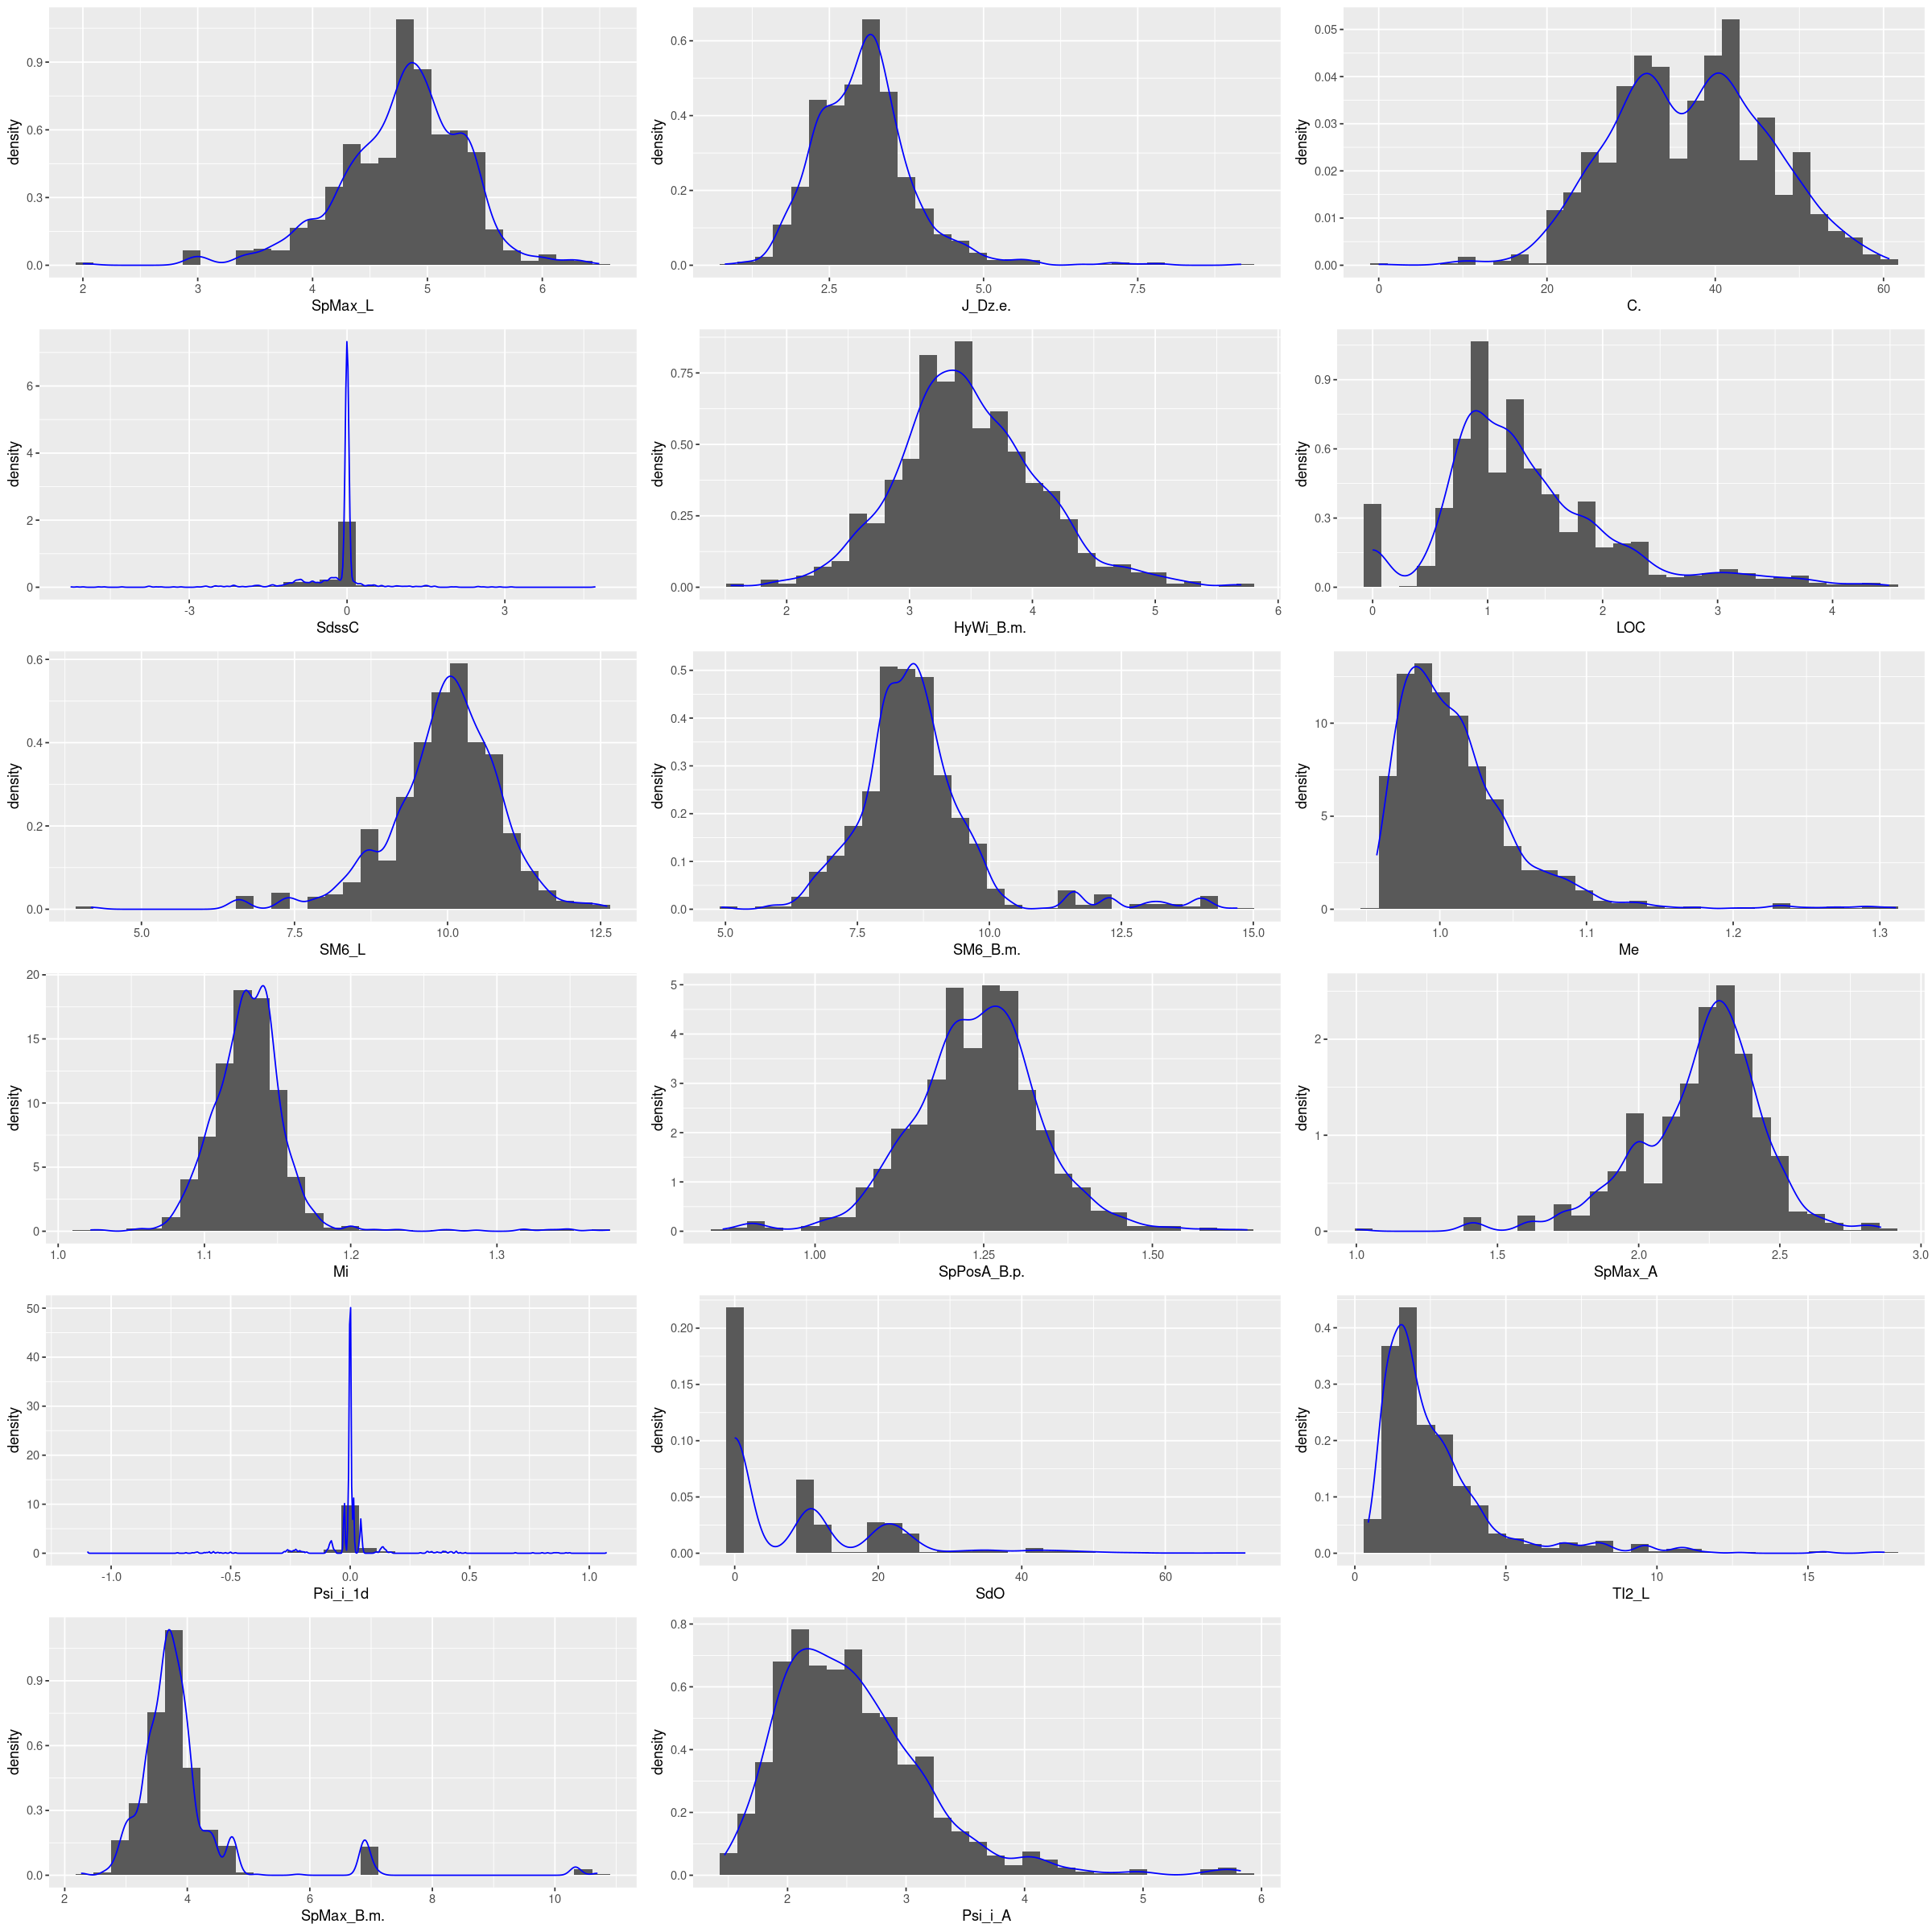

In [7]:
g1<-ggplot(biodeg,aes(x=SpMax_L))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(biodeg,aes(x=J_Dz.e.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(biodeg,aes(x=C.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(biodeg,aes(x=SdssC))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(biodeg,aes(x=HyWi_B.m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(biodeg,aes(x=LOC))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(biodeg,aes(x=SM6_L))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(biodeg,aes(x=Me))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(biodeg,aes(x=Mi))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(biodeg,aes(x=SpPosA_B.p.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g13<-ggplot(biodeg,aes(x=SpMax_A))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(biodeg,aes(x=Psi_i_1d))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(biodeg,aes(x=SdO))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(biodeg,aes(x=TI2_L))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g17<-ggplot(biodeg,aes(x=SpMax_B.m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g18<-ggplot(biodeg,aes(x=Psi_i_A))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(biodeg,aes(x=SM6_B.m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(biodeg,aes(x=SM6_B.m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
options(repr.plot.height=20,repr.plot.width=20)


grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g10,g11,g12,g13,g14,g15,g16,g17,g18,ncol=3,widths=c(5,5,5),heights=c(5,5,5,5,5,5))
rm(g1,g2,g3,g4,g5,g6,g7,g8,g10,g11,g12,g13,g14,g15,g16,g17,g18)

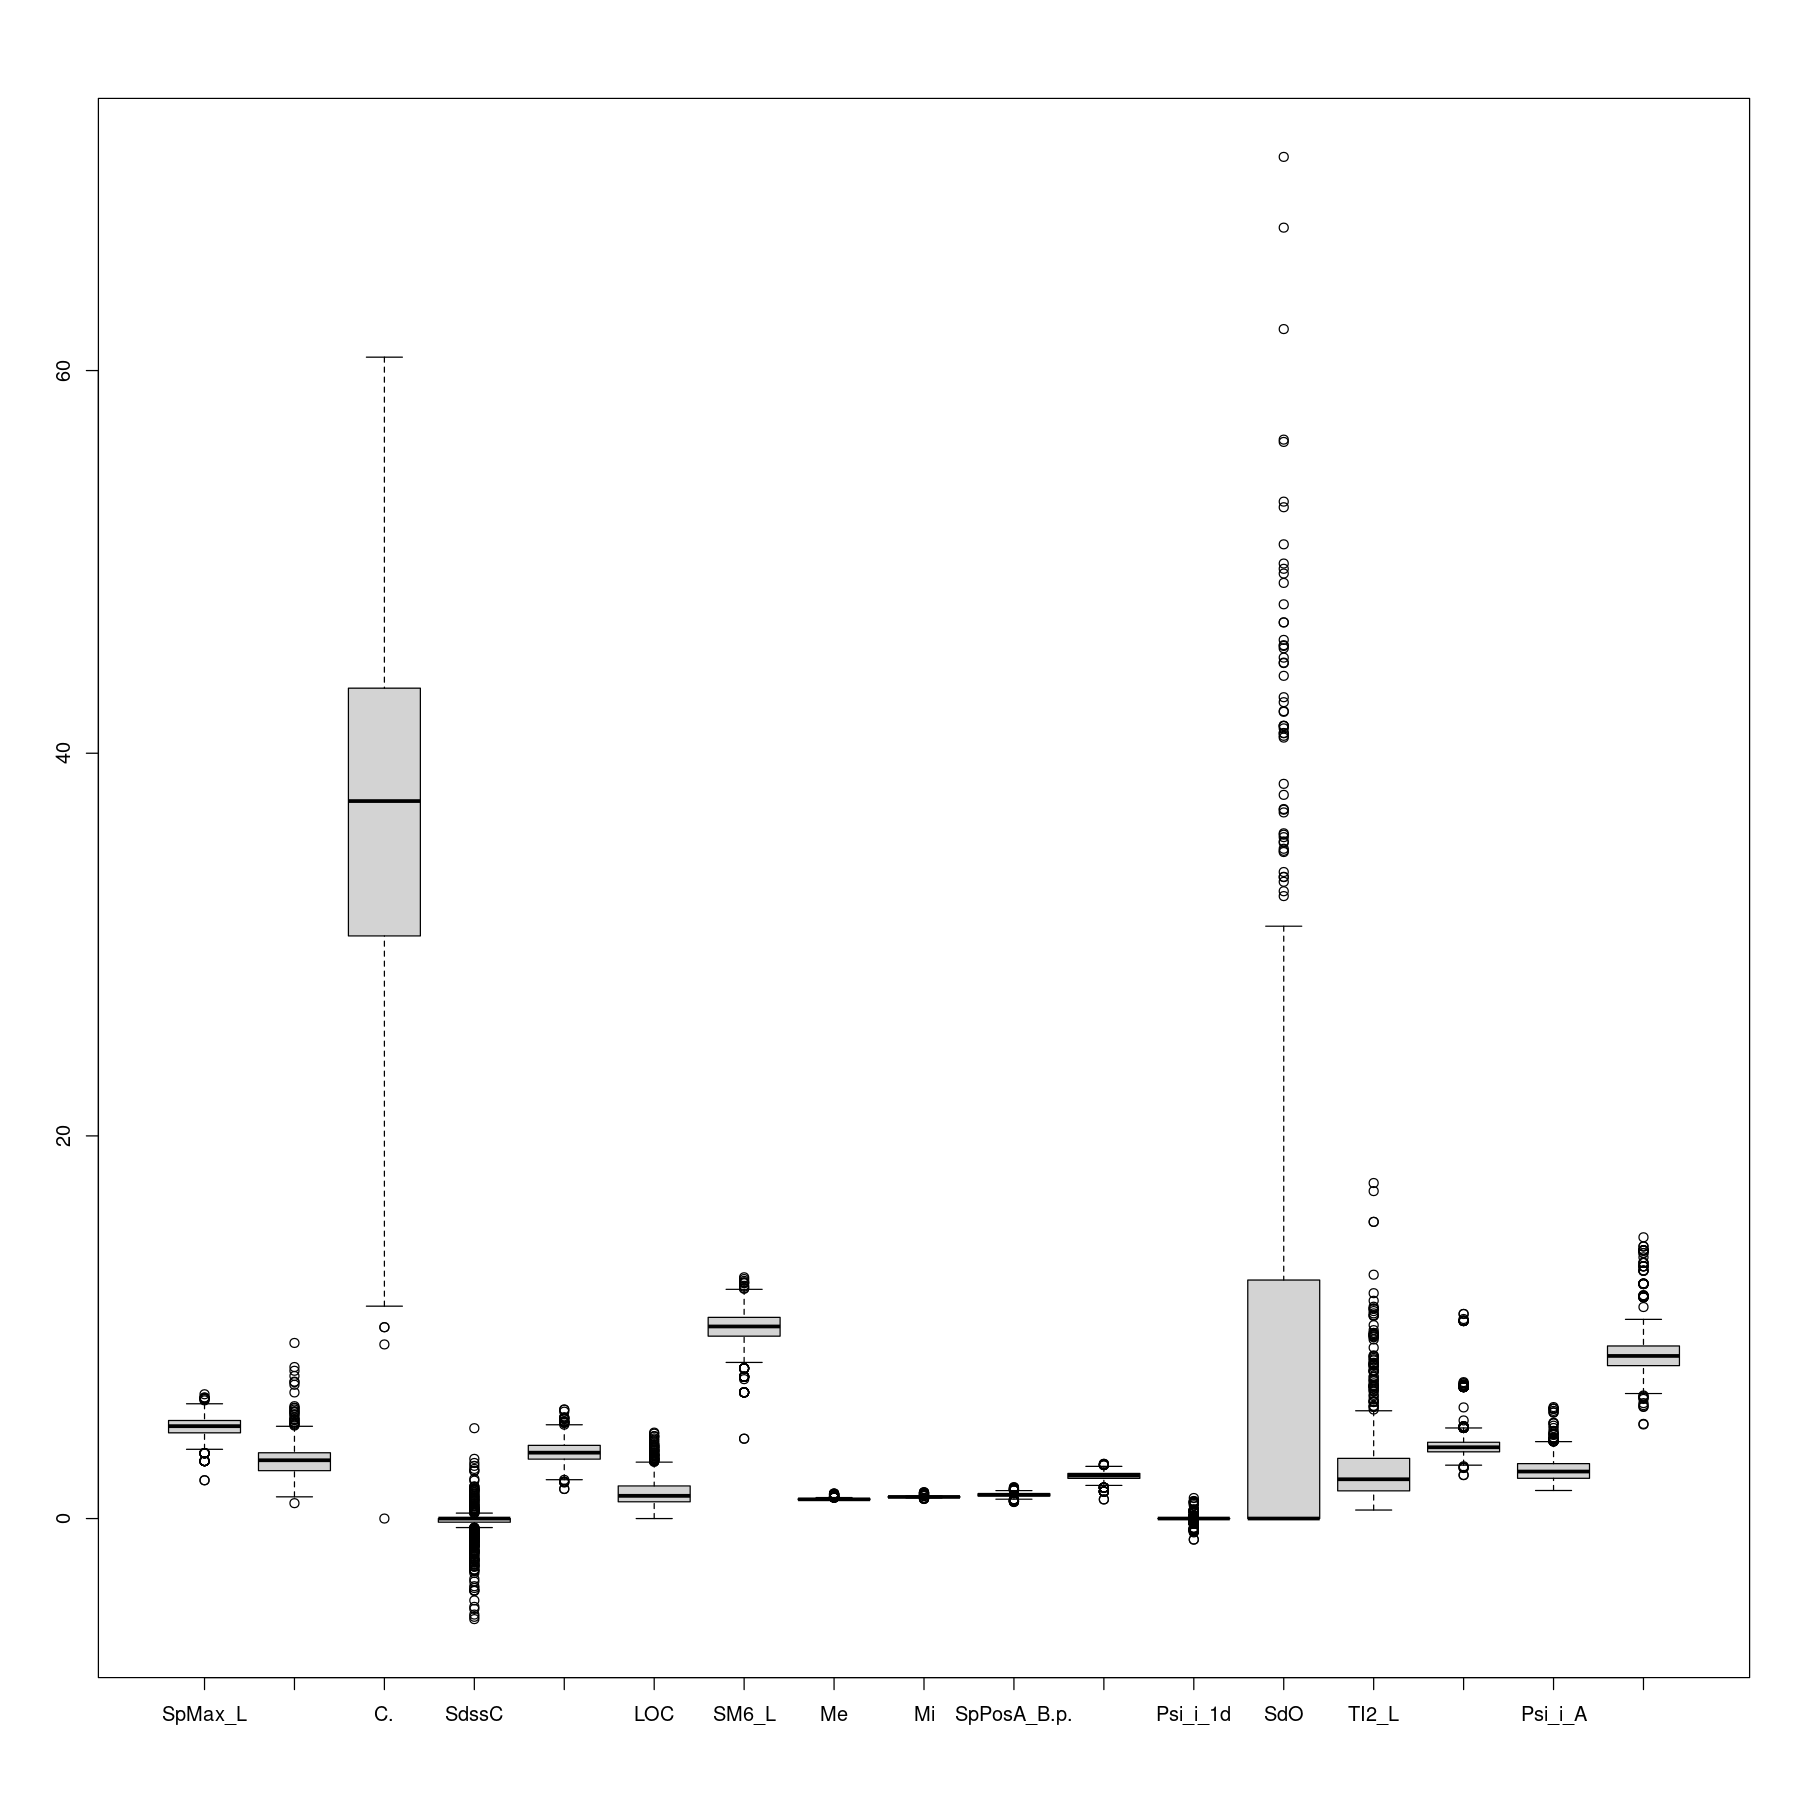

In [8]:
options(repr.plot.height=15,repr.plot.width=15)
boxplot(biodeg[-c(8,12,13,21)])
#test=log(biodeg[,"Me"])
#hist(test)

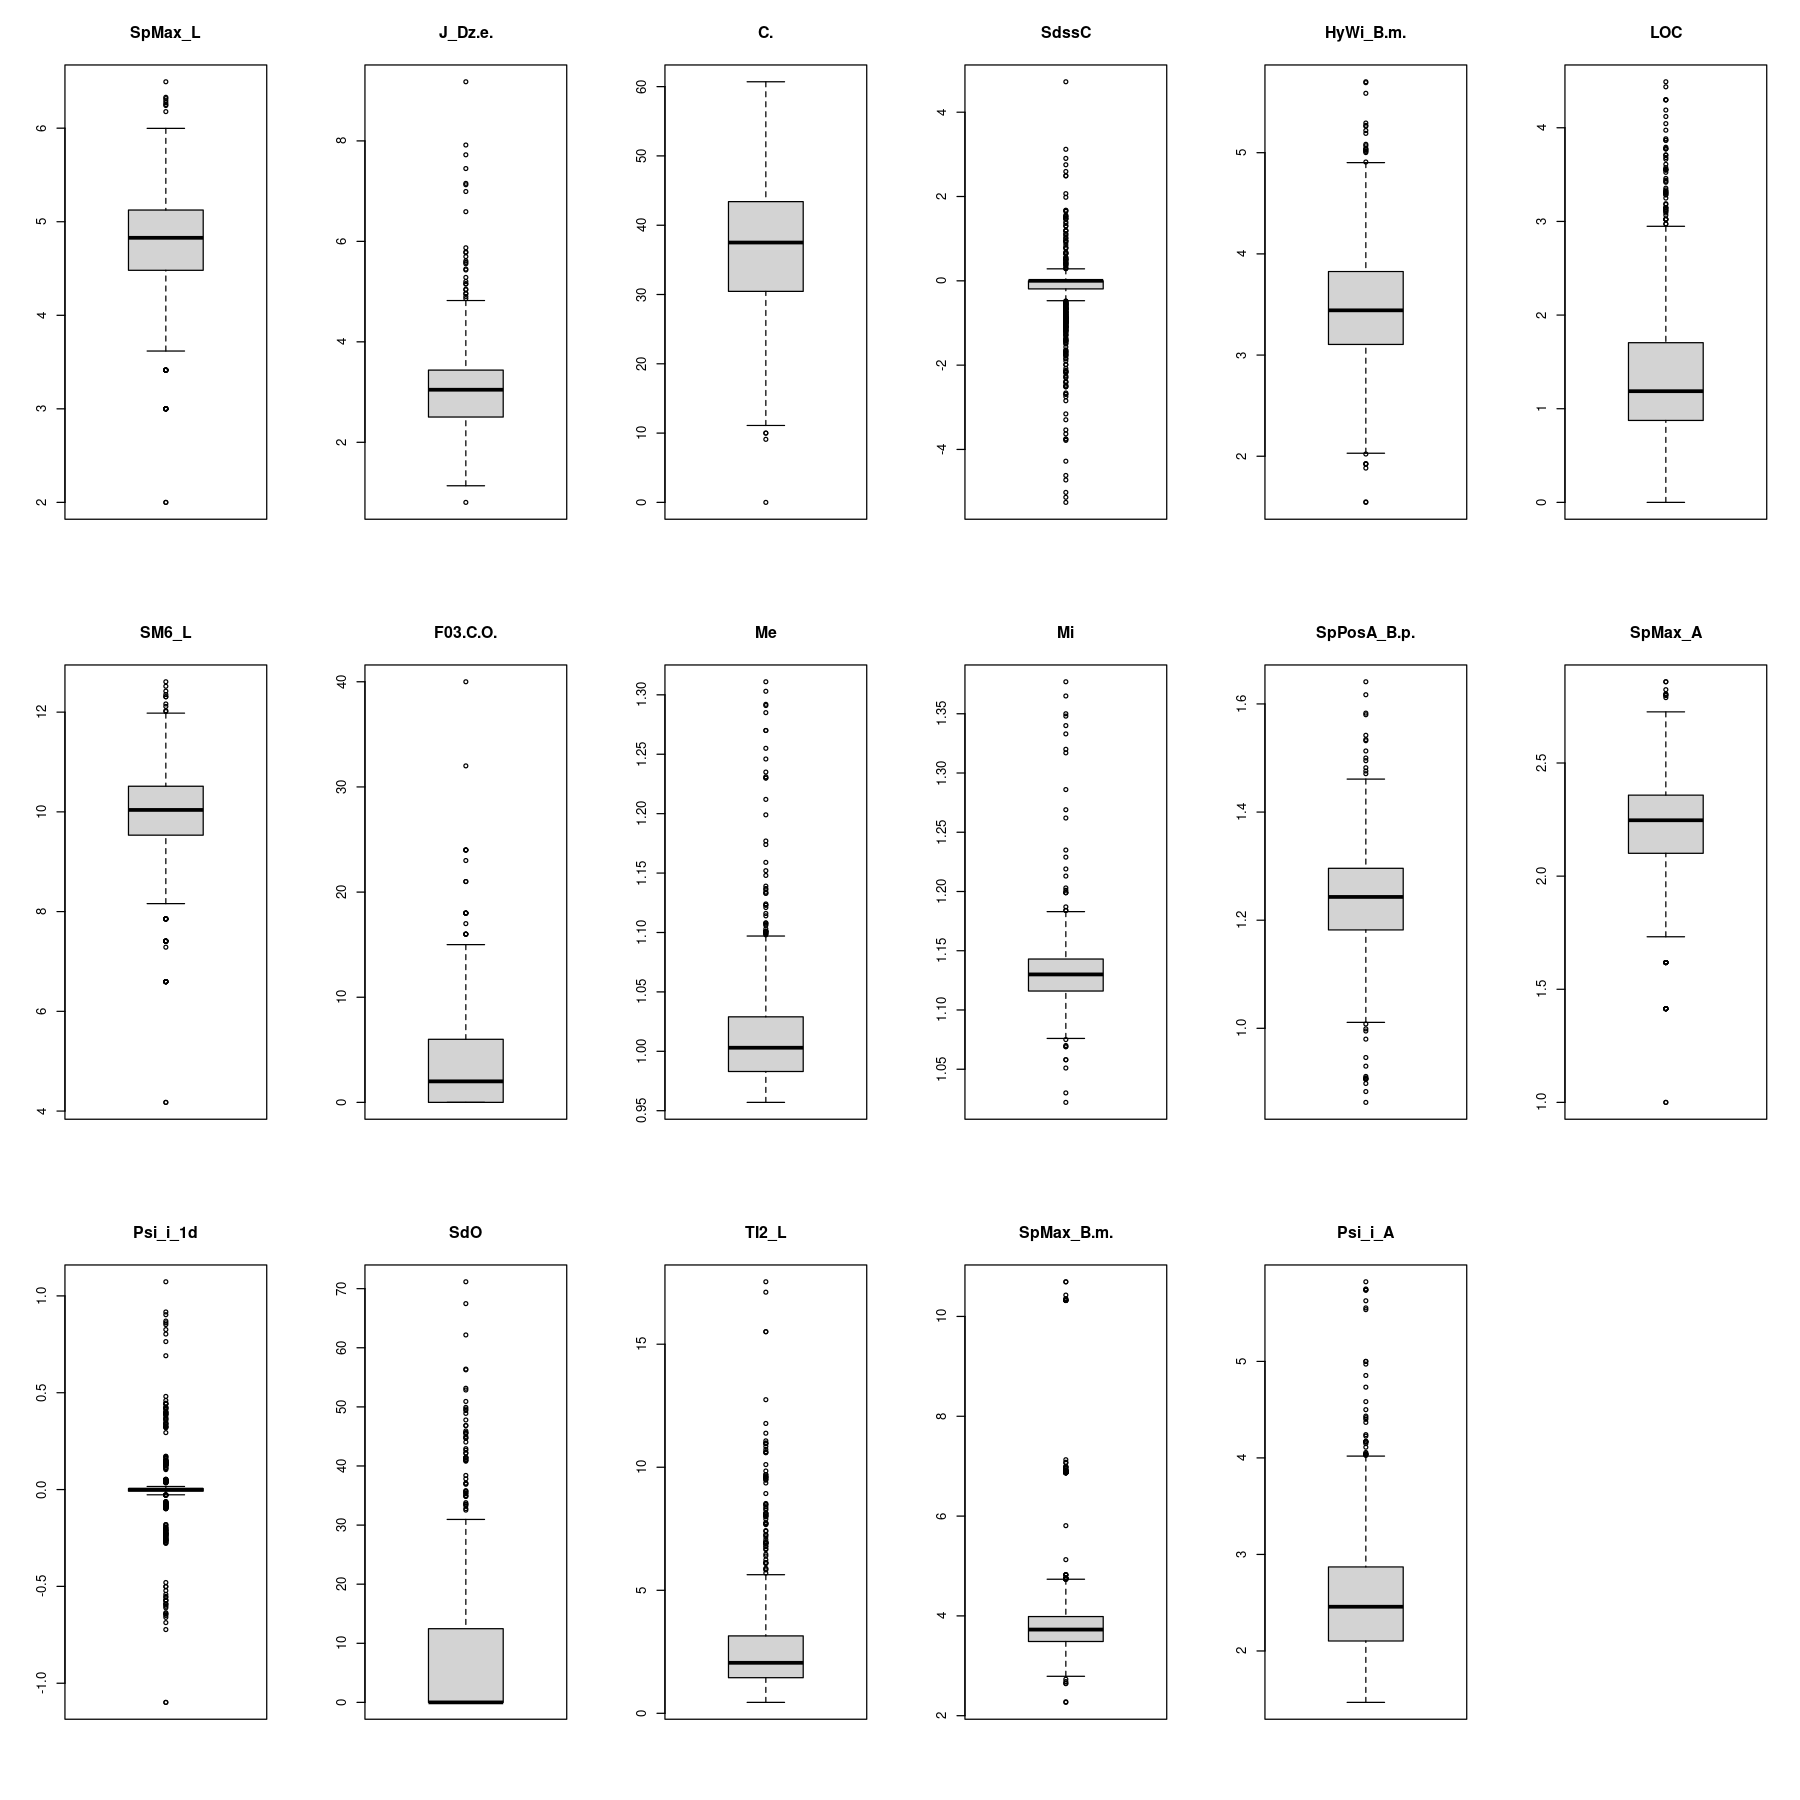

In [9]:
par(mfrow=c(3,6))
for (i in 1:17){
    boxplot(biodegQuanti[,i],main=paste(colnames(biodegQuanti)[i]))
}
#beaucoup d'outliers mais Pas de données aberrantes, pas d'anomalie

 B01.C.Br. B03.C.Cl. Y      
 0:1013    0:899     0:771  
 1:  42    1:156     1:284  

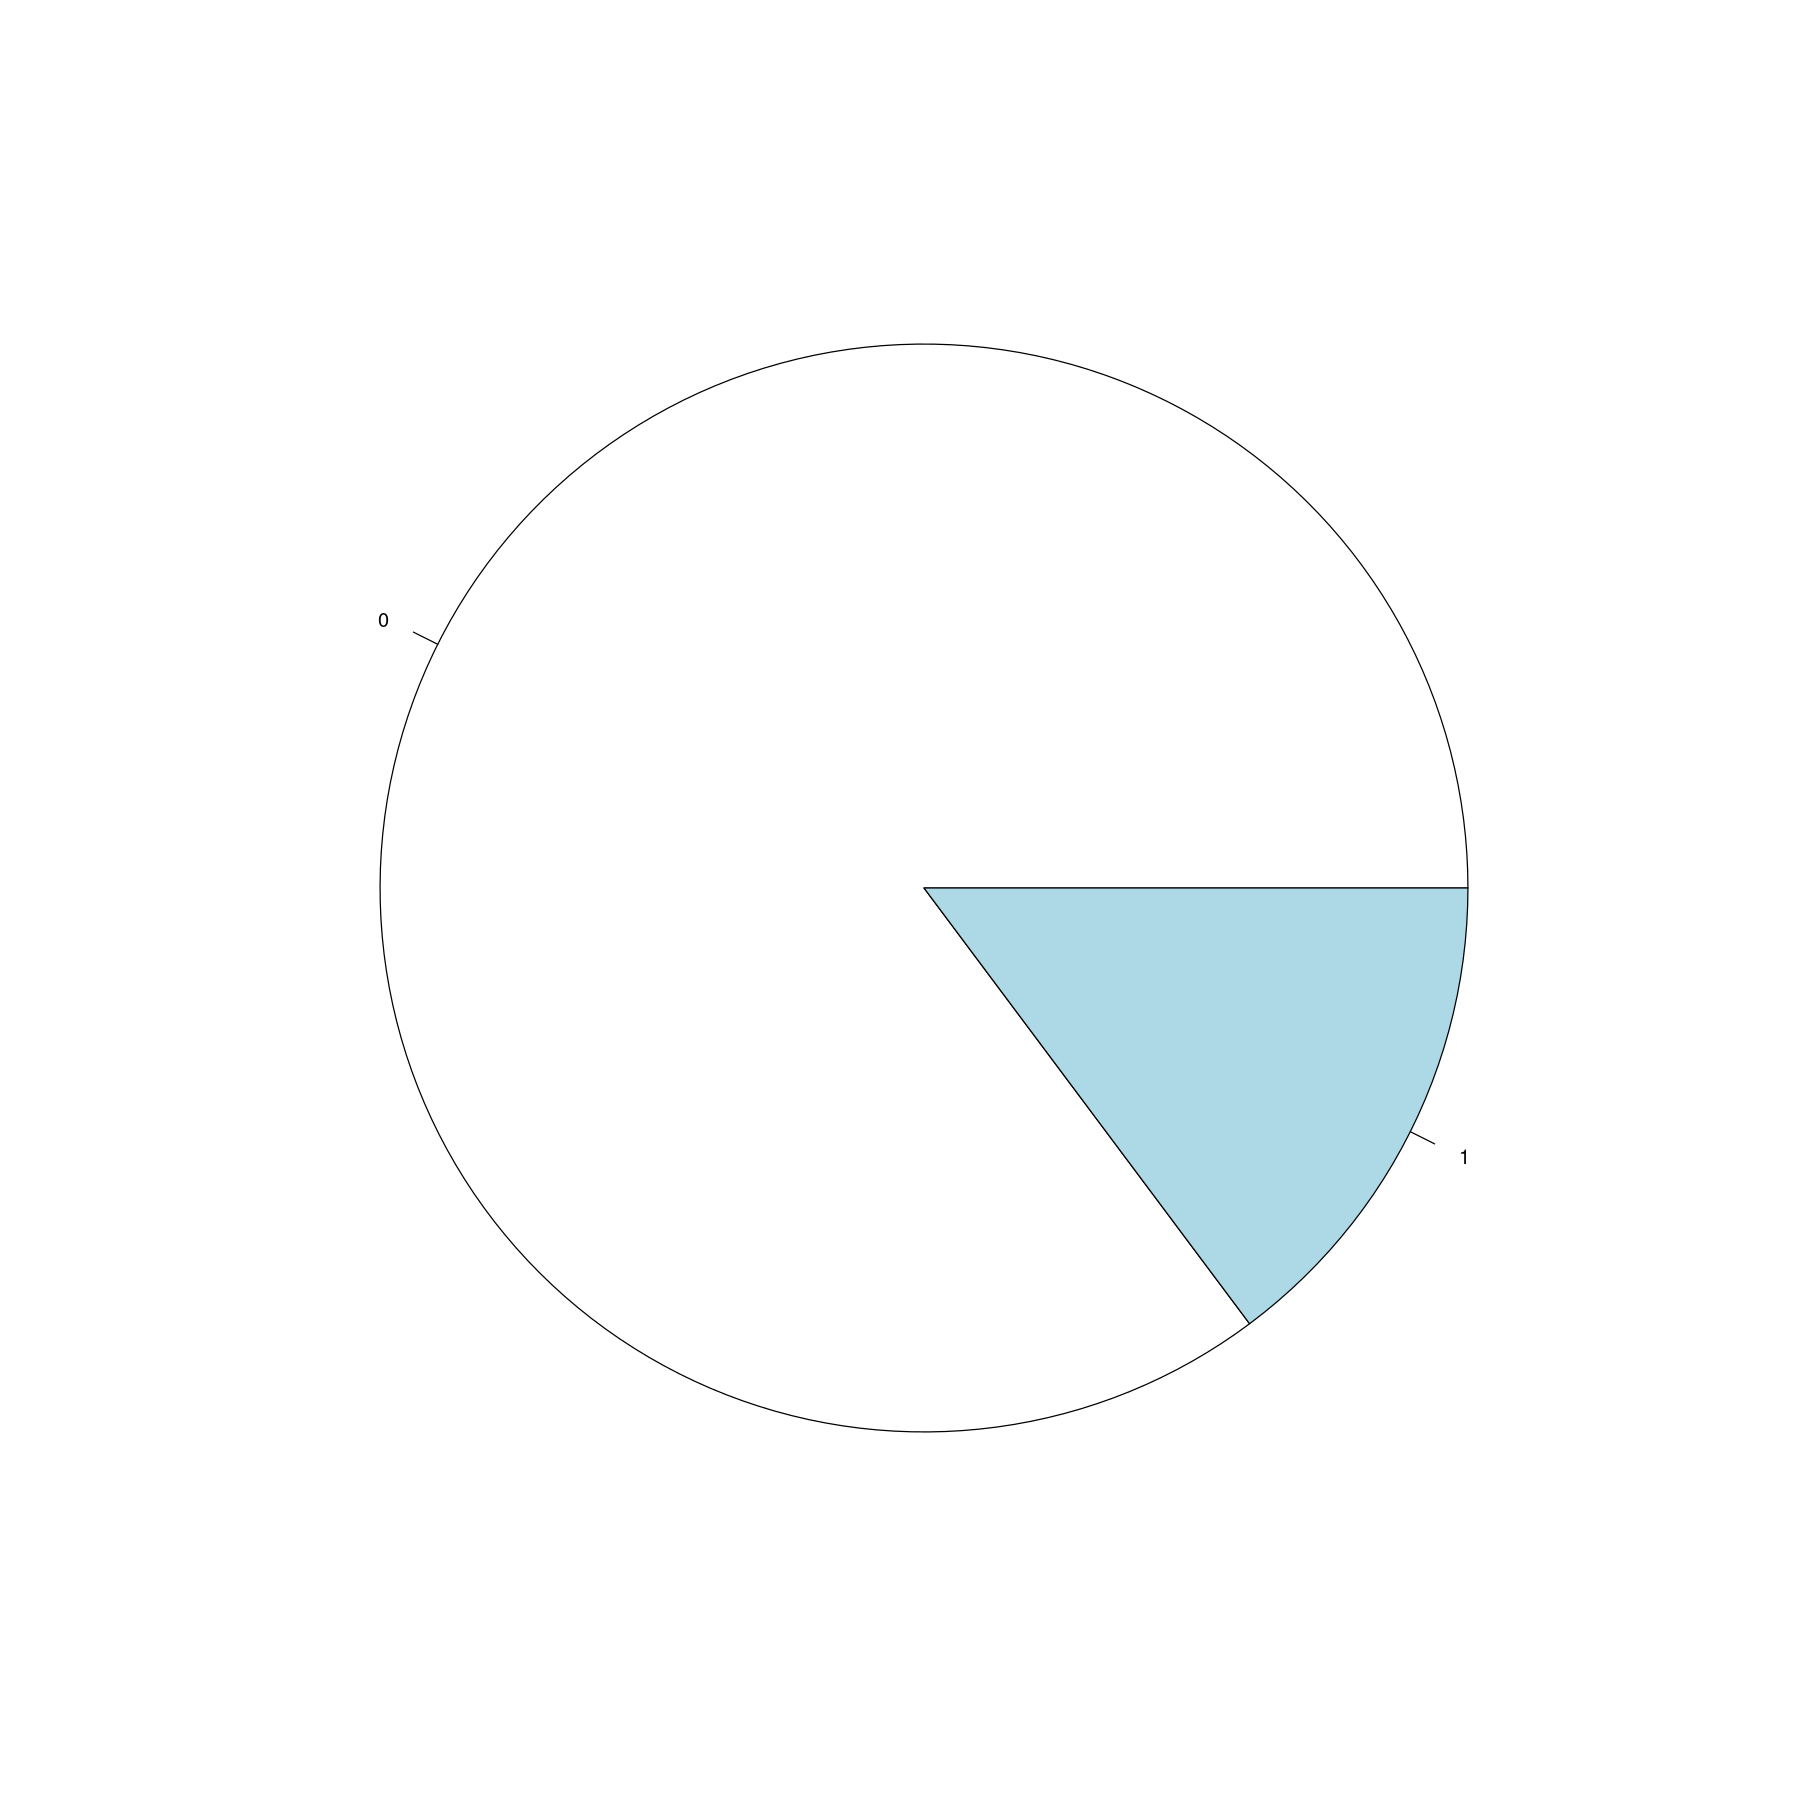

In [10]:
summary(biodegQuali)
pie(table(biodegQuali[,2]))

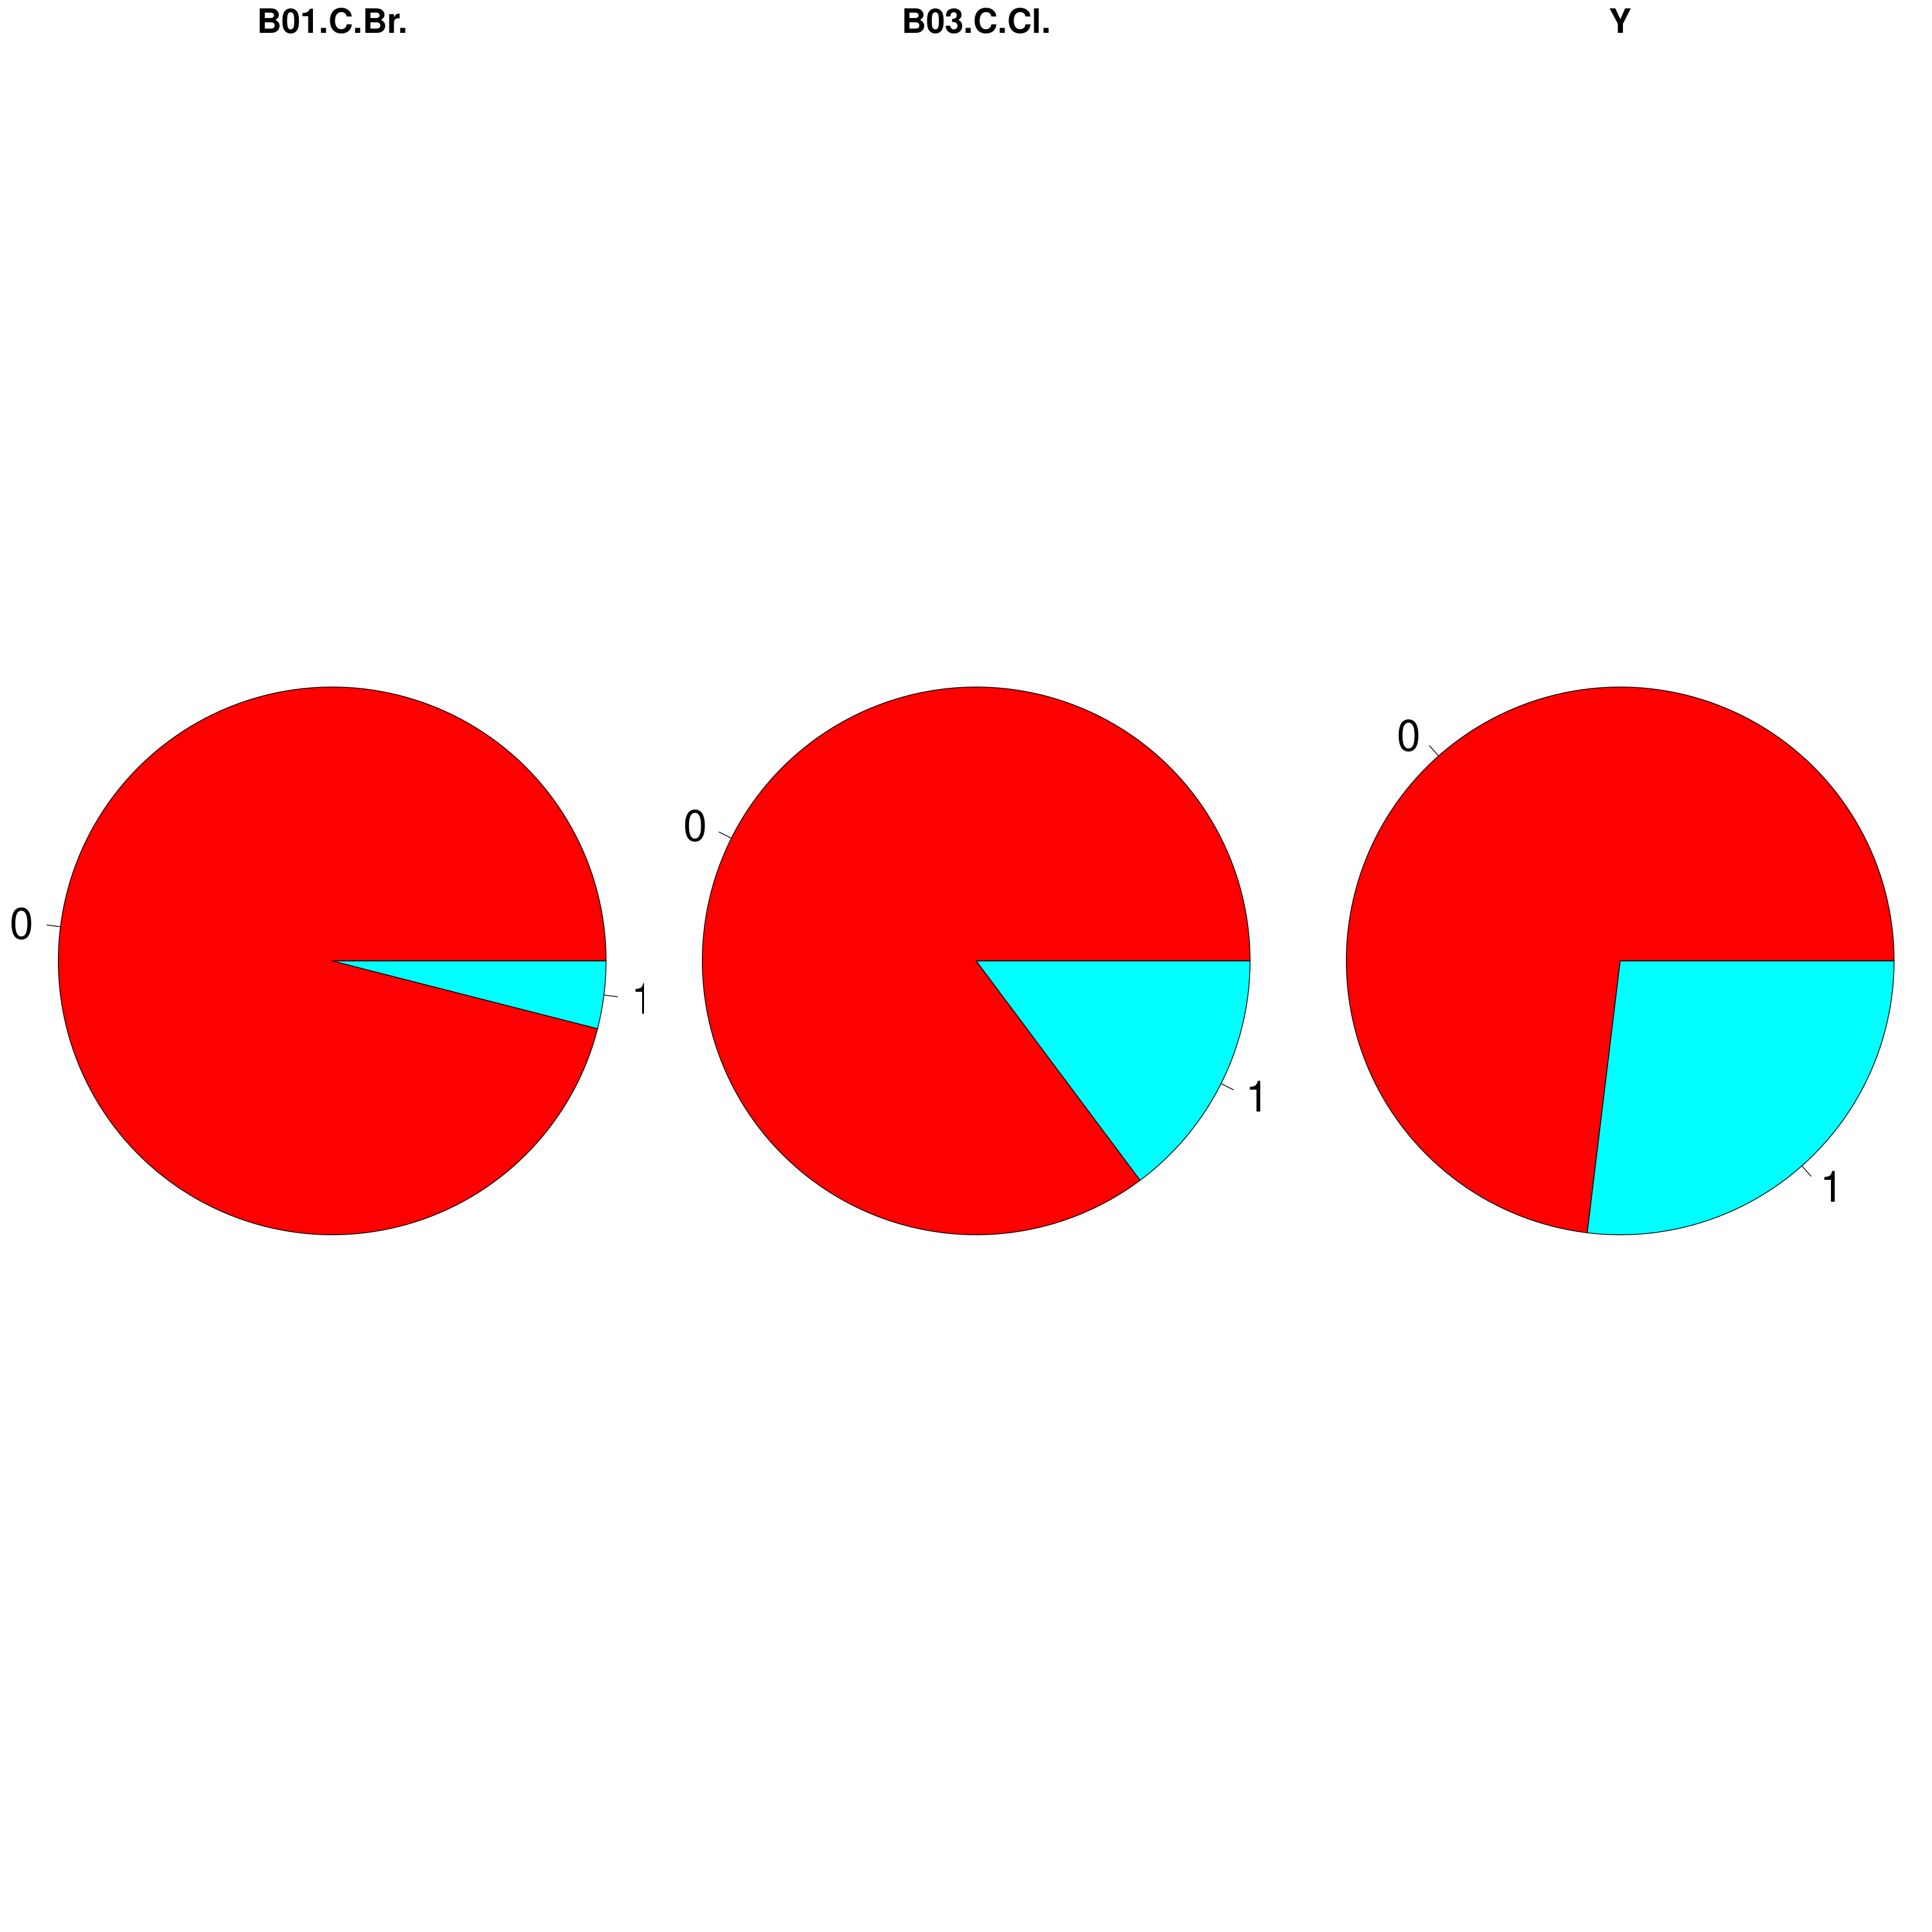

In [11]:
par(mfrow=c(1,3))
options(repr.plot.height=25,repr.plot.width=25)
for (i in 1:3){
    pie(table(biodegQuali[,i]),main=paste(colnames(biodegQuali)[i]),col=rainbow(length(table(biodegQuali[,i]))),cex=5,cex.main=4,radius=1.25)
}

?pie
#On va réunir les données de F03.C.O

## Transformation des données

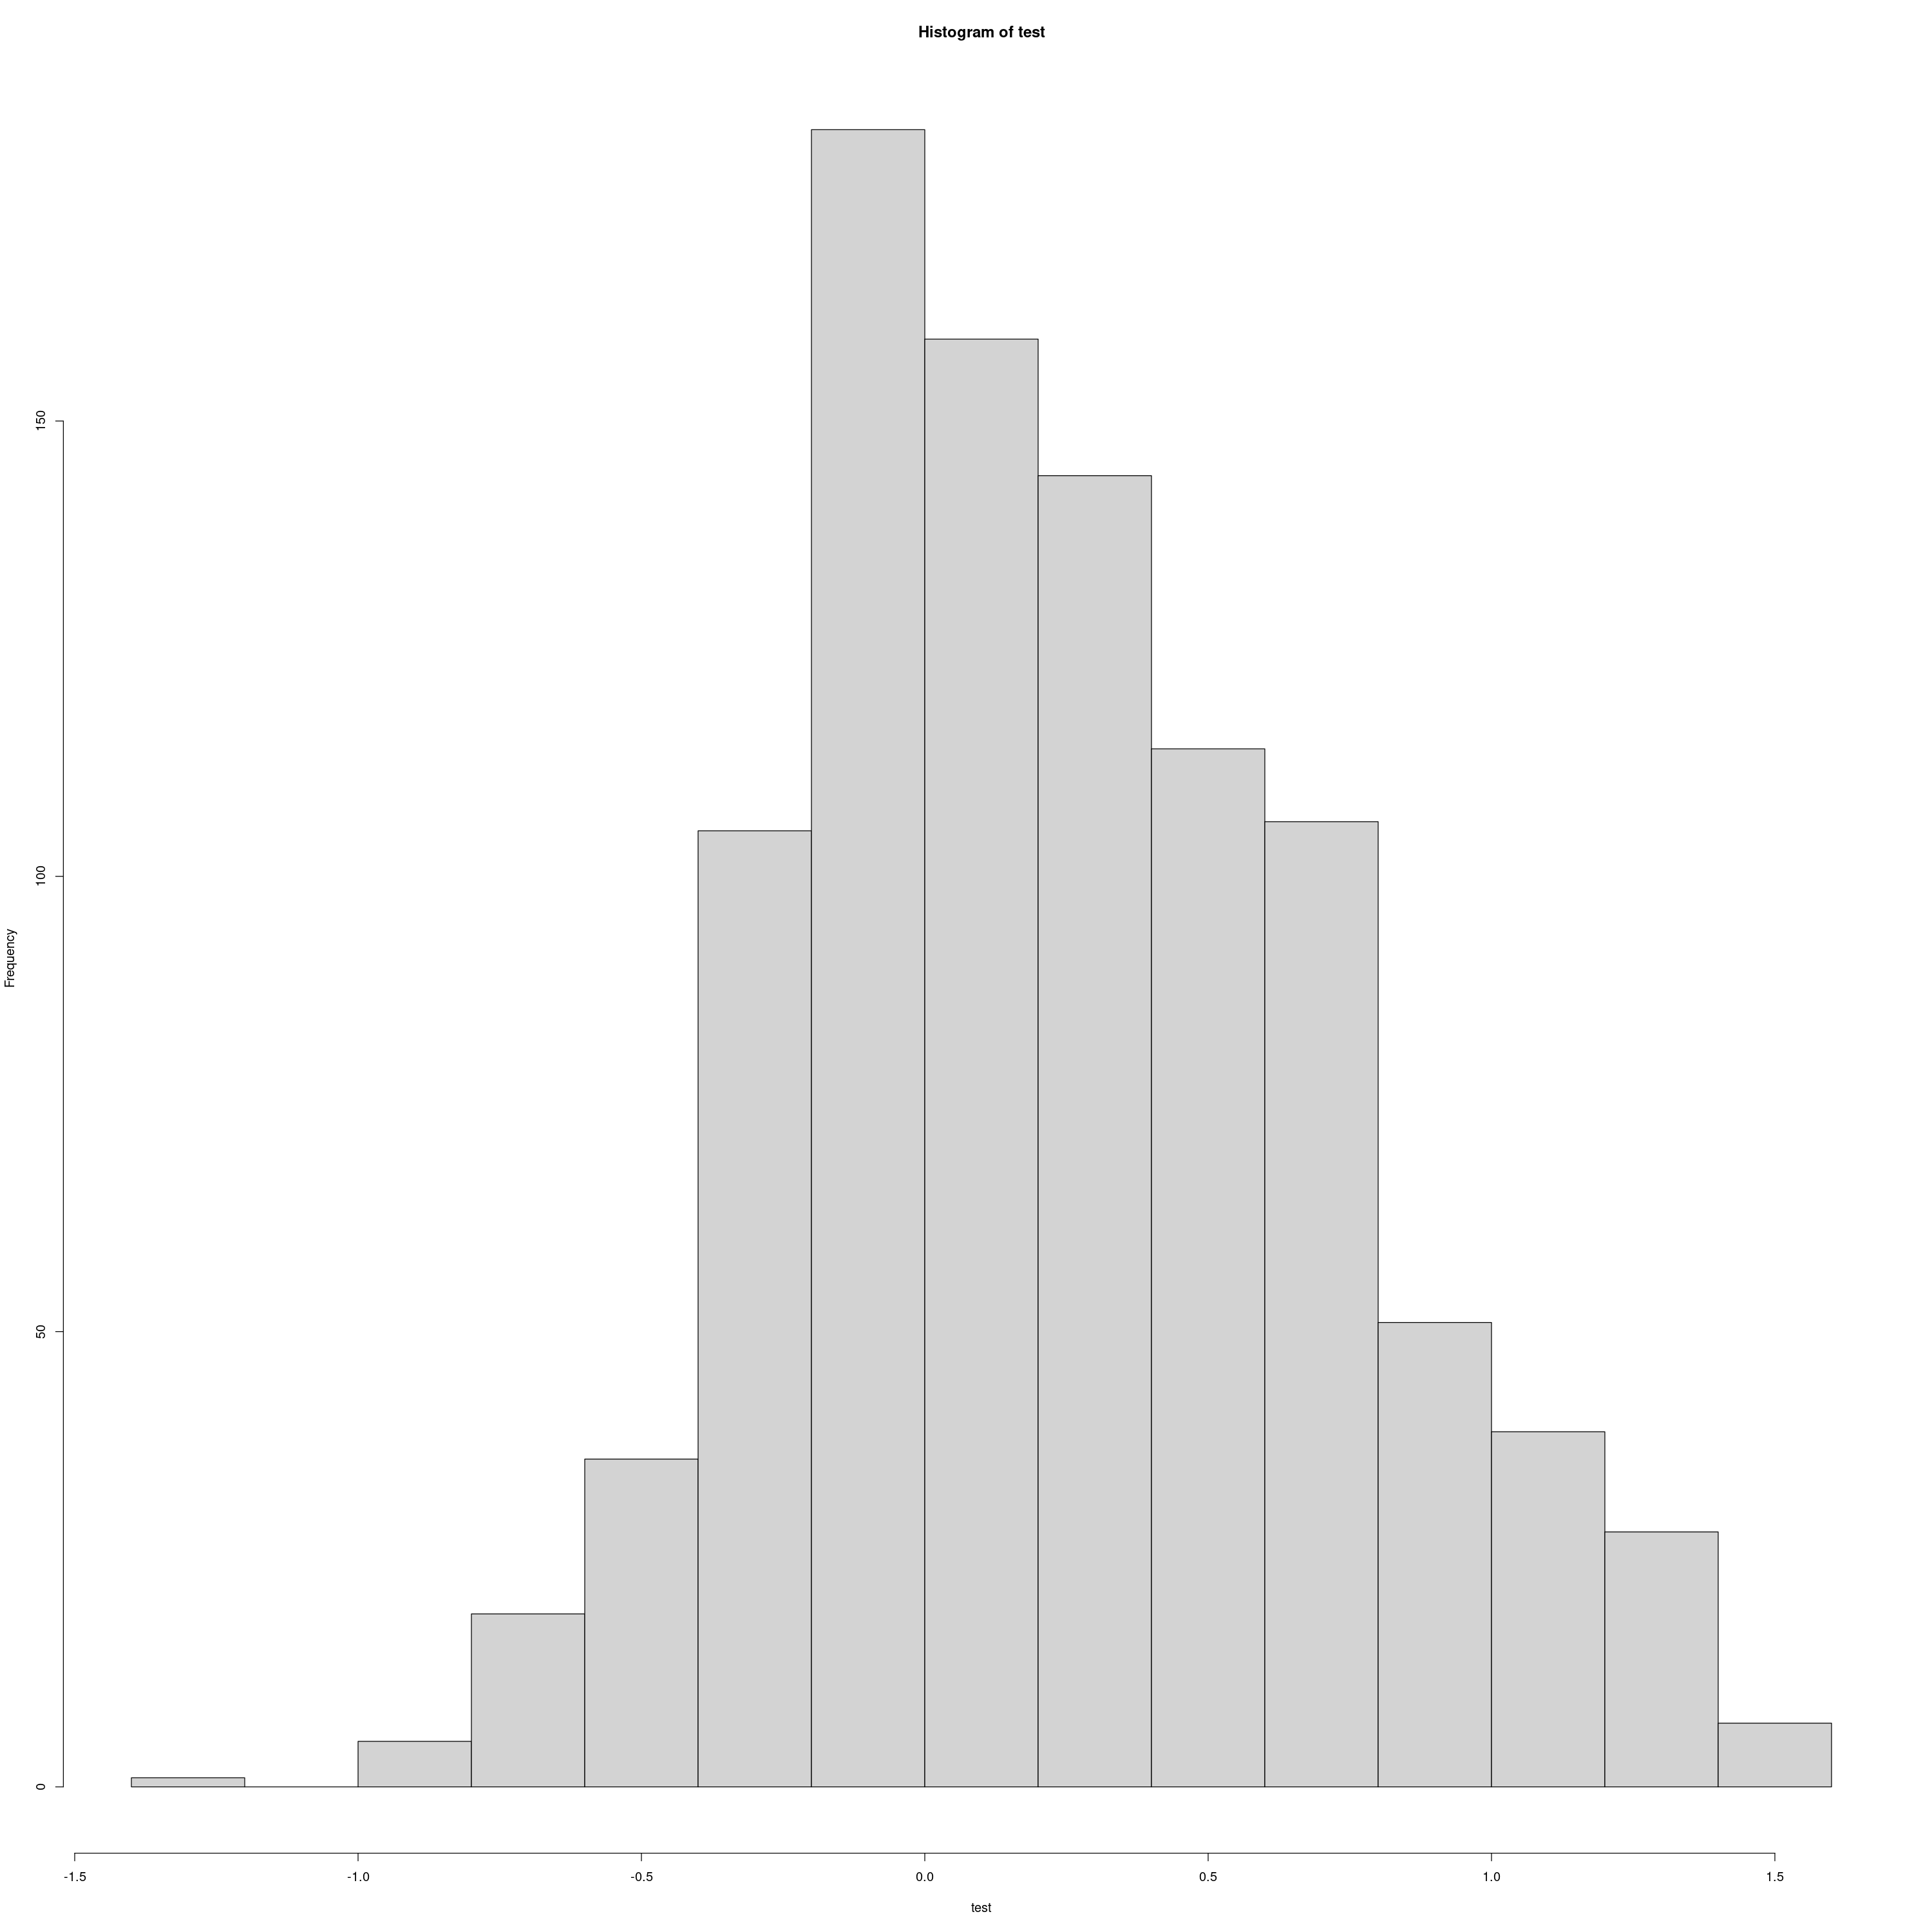

In [12]:
test=(log(biodeg[,"LOC"]))
hist(test)
#Transfo à effectuer en log: Psi_i_A, TI2_L,Me, LOC enlever valeurs>10 de Spmaxbm

In [13]:
#testtt<-biodegQuali[,"F03.C.O."]
#summary(testtt)
options(repr.plot.height=25,repr.plot.width=25)

#biodegQualiMerged <-biodegQuali
#biodegQualiMerged[,"F03.C.O."] <- factor(ifelse(as.numeric(biodegQualiMerged[,"F03.C.O."]) >= 11, "11 ou plus", biodegQualiMerged[,"F03.C.O."]))
#summary(biodegQualiMerged)
#pie(table(biodegQualiMerged[,1]))


## Jeu de test

In [14]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(biodeg) # nombre de lignes dans les données
nvar <- ncol(biodeg) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 


In [15]:
# construction de l'échantillon d'apprentissage
datappr <- biodeg[appri, ] 
# construction de l'échantillon test
datestr <- biodeg[testi, ] 
# vérification
str(datappr)
str(datestr)
#summary(datappr) 
datapprQuanti<-datappr[-c(8,12,13,21)]
datapprQuali<-datappr[,c(8,12,13,21)]

datestrQuanti<-datestr[-c(8,12,13,21)]
datestrQuali<-datestr[,c(8,12,13,21)]

'data.frame':	844 obs. of  21 variables:
 $ SpMax_L    : num  3.92 4.17 3.93 3 4.24 ...
 $ J_Dz.e.    : num  2.69 2.11 3.25 2.71 3.39 ...
 $ C.         : num  31.4 30.8 26.7 20 29.4 11.1 31.6 44.4 41.2 52.9 ...
 $ SdssC      : num  0 0 0 0 -0.271 0 -0.039 0 -1.29 -0.302 ...
 $ HyWi_B.m.  : num  3.11 2.46 3.28 2.1 3.45 ...
 $ LOC        : num  2.55 1.393 2.585 0.918 2.753 ...
 $ SM6_L      : num  9 8.72 9.11 6.59 9.53 ...
 $ F03.C.O.   : int  0 1 0 0 2 0 5 0 8 5 ...
 $ Me         : num  0.96 0.989 1.009 1.108 1.004 ...
 $ Mi         : num  1.14 1.14 1.15 1.17 1.15 ...
 $ SpPosA_B.p.: num  1.2 1.1 1.09 1.02 1.14 ...
 $ B01.C.Br.  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ B03.C.Cl.  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ SpMax_A    : num  1.93 2.21 1.94 1.41 1.99 ...
 $ Psi_i_1d   : num  0.011 -0.204 -0.008 1.073 -0.002 ...
 $ SdO        : num  0 0 0 8.36 10.35 ...
 $ TI2_L      : num  4.49 1.54 4.89 1.33 5.59 ...
 $ SpMax_B.m. : num  2.95 3.31 3.08 3.05 3

In [16]:
colnames(biodegQuanti)

[1] "SpMax_L"     "J_Dz.e."     "C."          "SdssC"       "HyWi_B.m."  
 [6] "LOC"         "SM6_L"       "F03.C.O."    "Me"          "Mi"         
[11] "SpPosA_B.p." "SpMax_A"     "Psi_i_1d"    "SdO"         "TI2_L"      
[16] "SpMax_B.m."  "Psi_i_A"     "SM6_B.m."

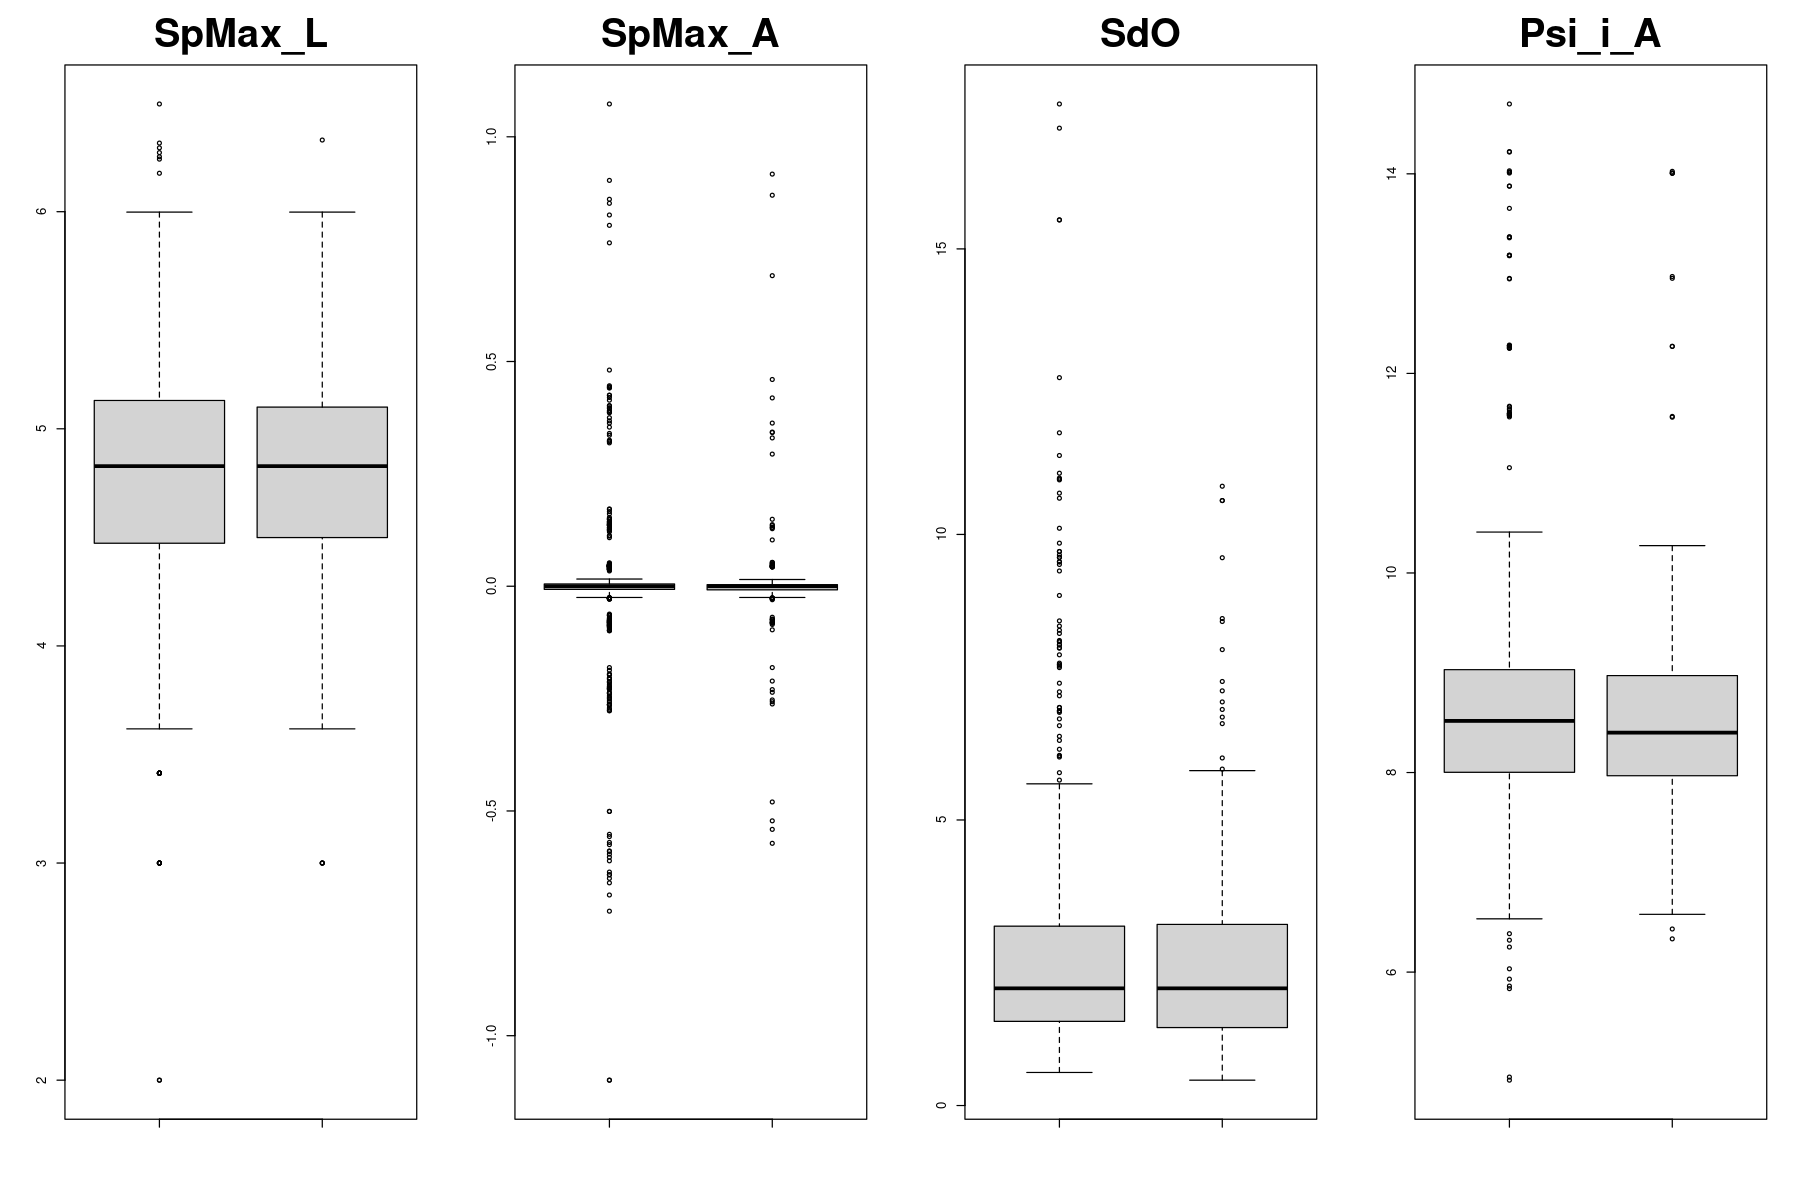

In [17]:
#On compare la distribution des jeux d'entrainement et de test
options(repr.plot.height=10,repr.plot.width=15)

par(mfrow=c(1,4))
boxplot(datappr[,"SpMax_L"],datestr[,"SpMax_L"],main=paste(colnames(biodegQuanti)[1]),cex.main=3)
boxplot(datappr[,"Psi_i_1d"],datestr[,"Psi_i_1d"],main=paste(colnames(biodegQuanti)[12]),cex.main=3)
boxplot(datappr[,"TI2_L"],datestr[,"TI2_L"],main=paste(colnames(biodegQuanti)[14]),cex.main=3)
boxplot(datappr[,"SM6_B.m."],datestr[,"SM6_B.m."],main=paste(colnames(biodegQuanti)[17]),cex.main=3)



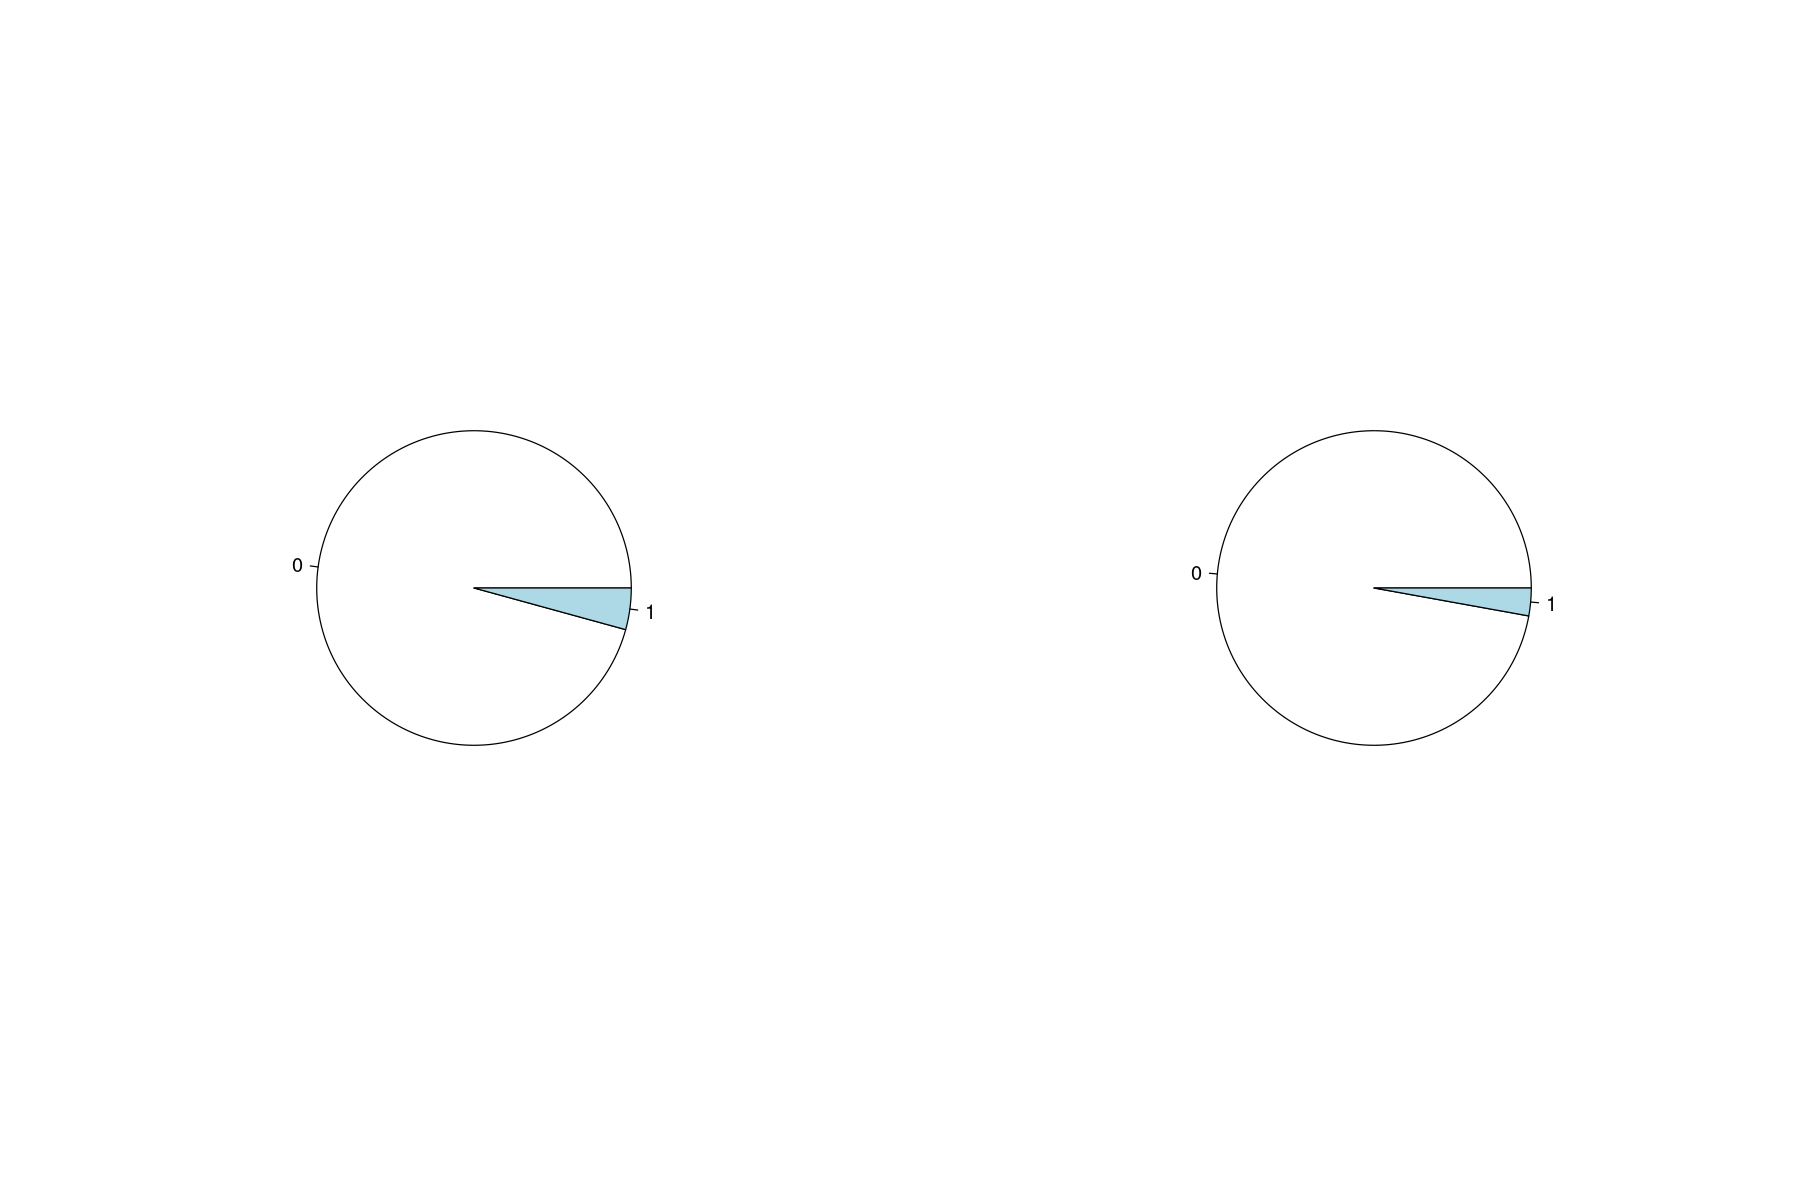

In [18]:
par(mfrow=c(1,2))
pie(table(datapprQuali[,2]))
pie(table(datestrQuali[,2]))


In [19]:
#On centre et réduit notre jeu de données

for(i in 1:ncol(datapprQuanti)){
    m<-mean(datapprQuanti[,i])
    s<-sd(datapprQuanti[,i])
    datapprQuanti[,i]<-(datapprQuanti[,i]-m)/s
    datestrQuanti[,i]<-(datestrQuanti[,i]-m)/s
    
}



## Analyse Bidimensionnelle

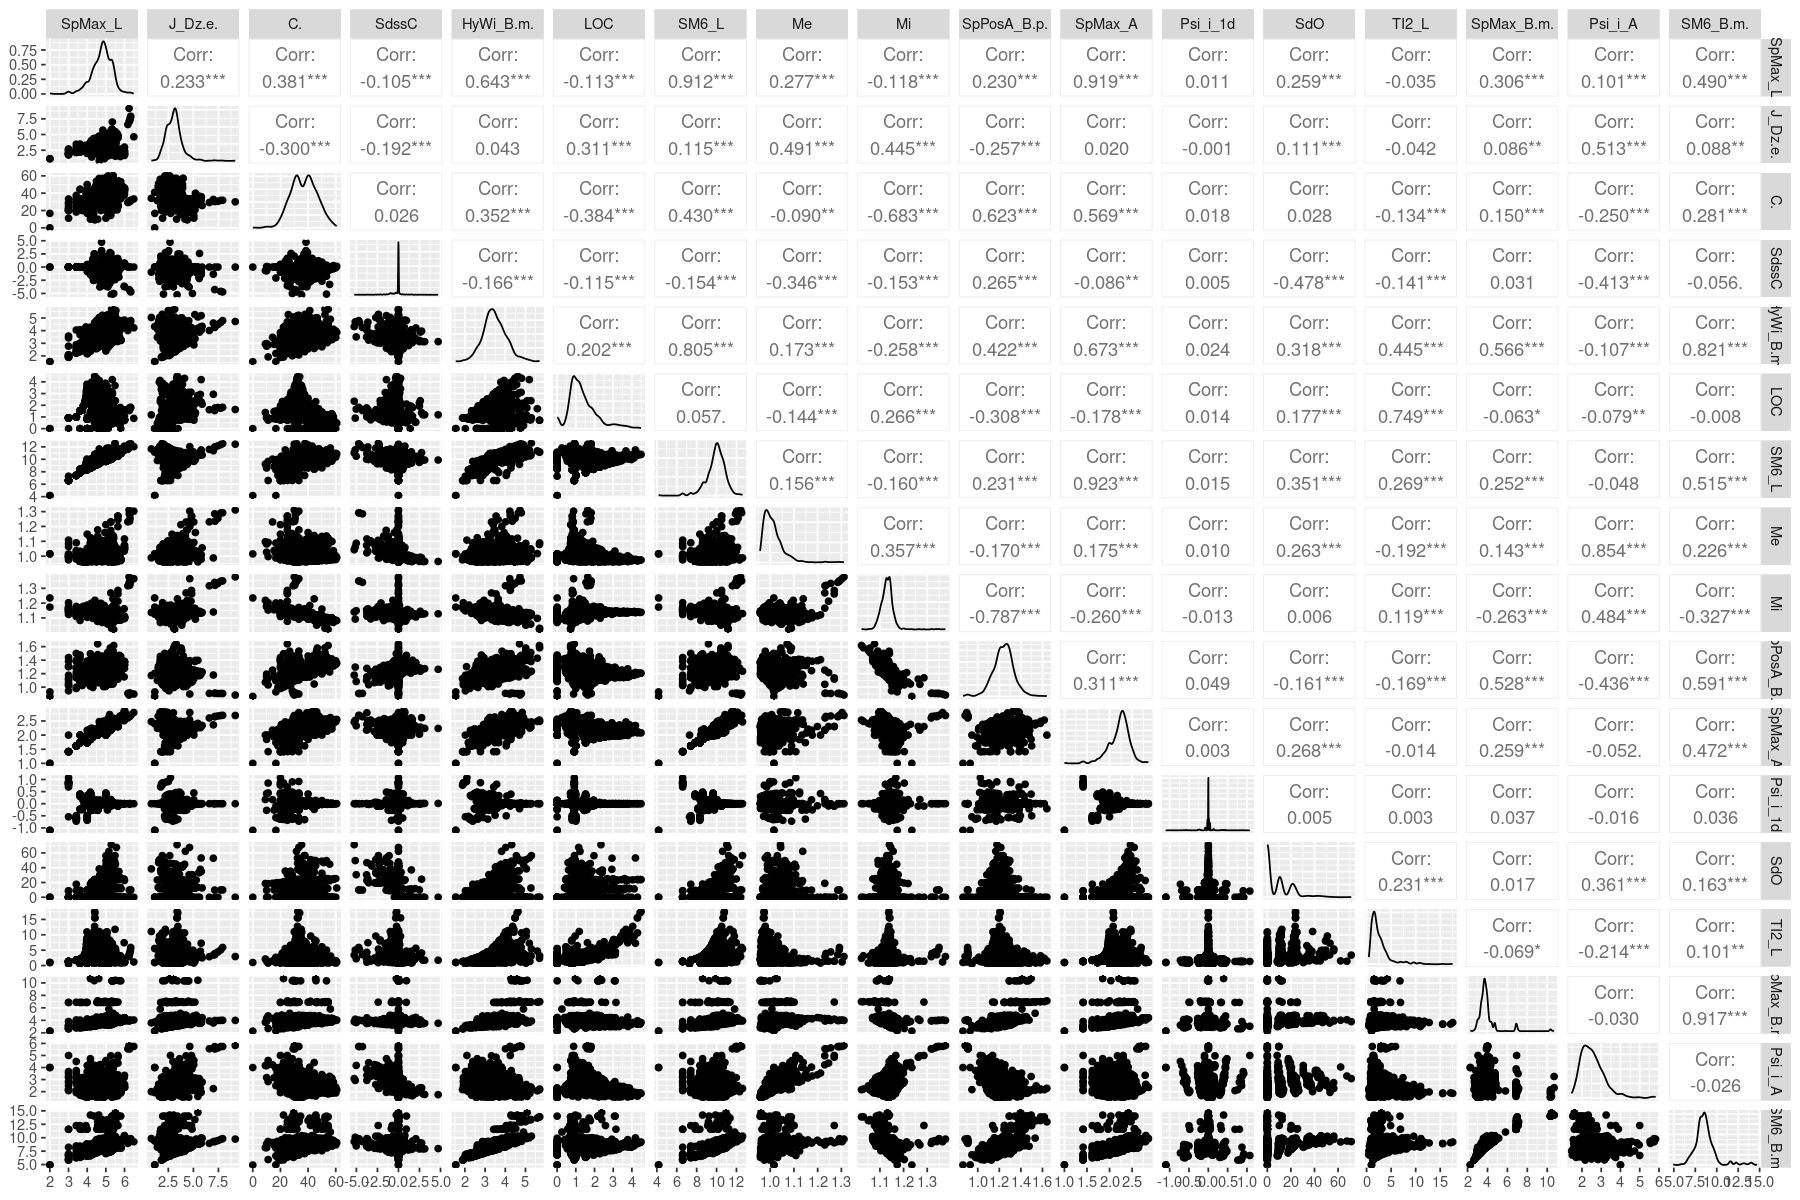

In [20]:
ggpairs(biodeg[, -c(8,12,13,21)])

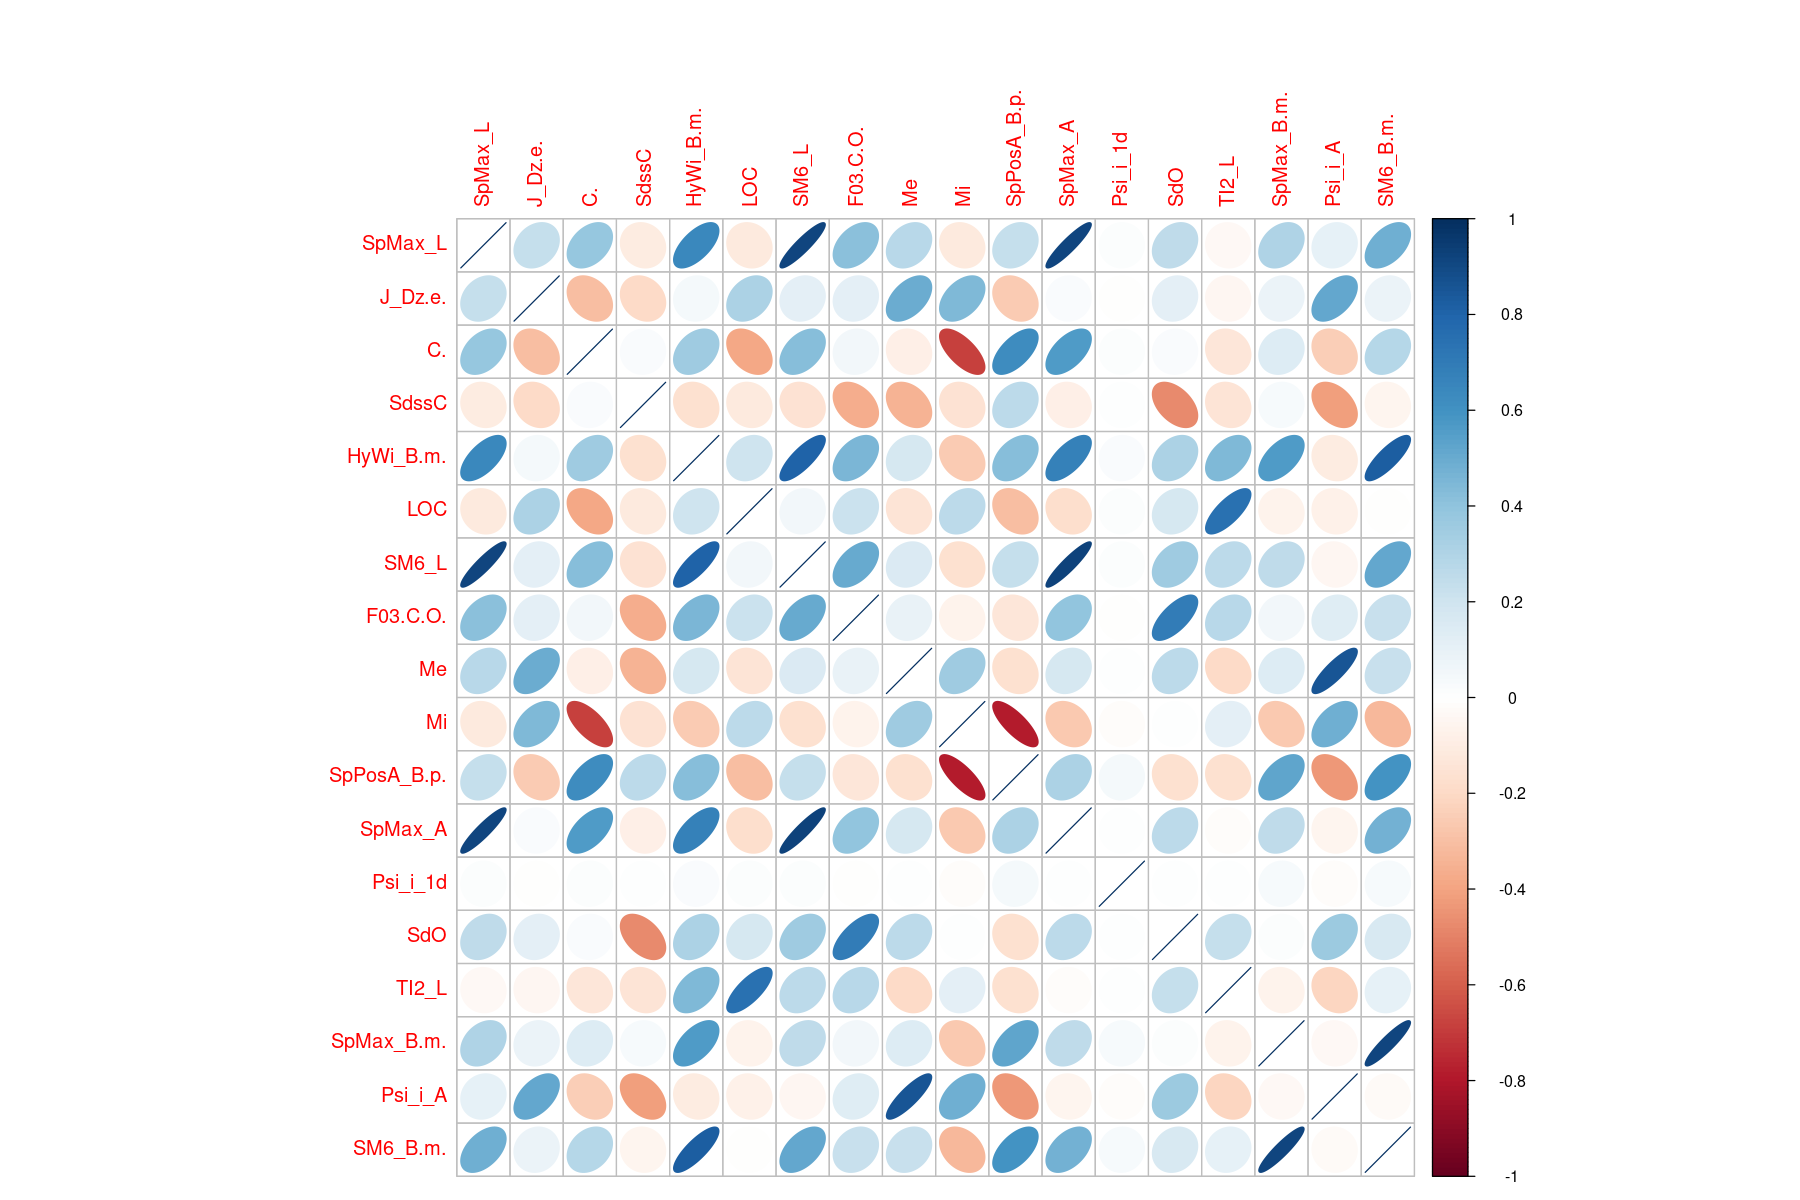

In [21]:
corrplot(cor(biodegQuanti),method='ellipse')

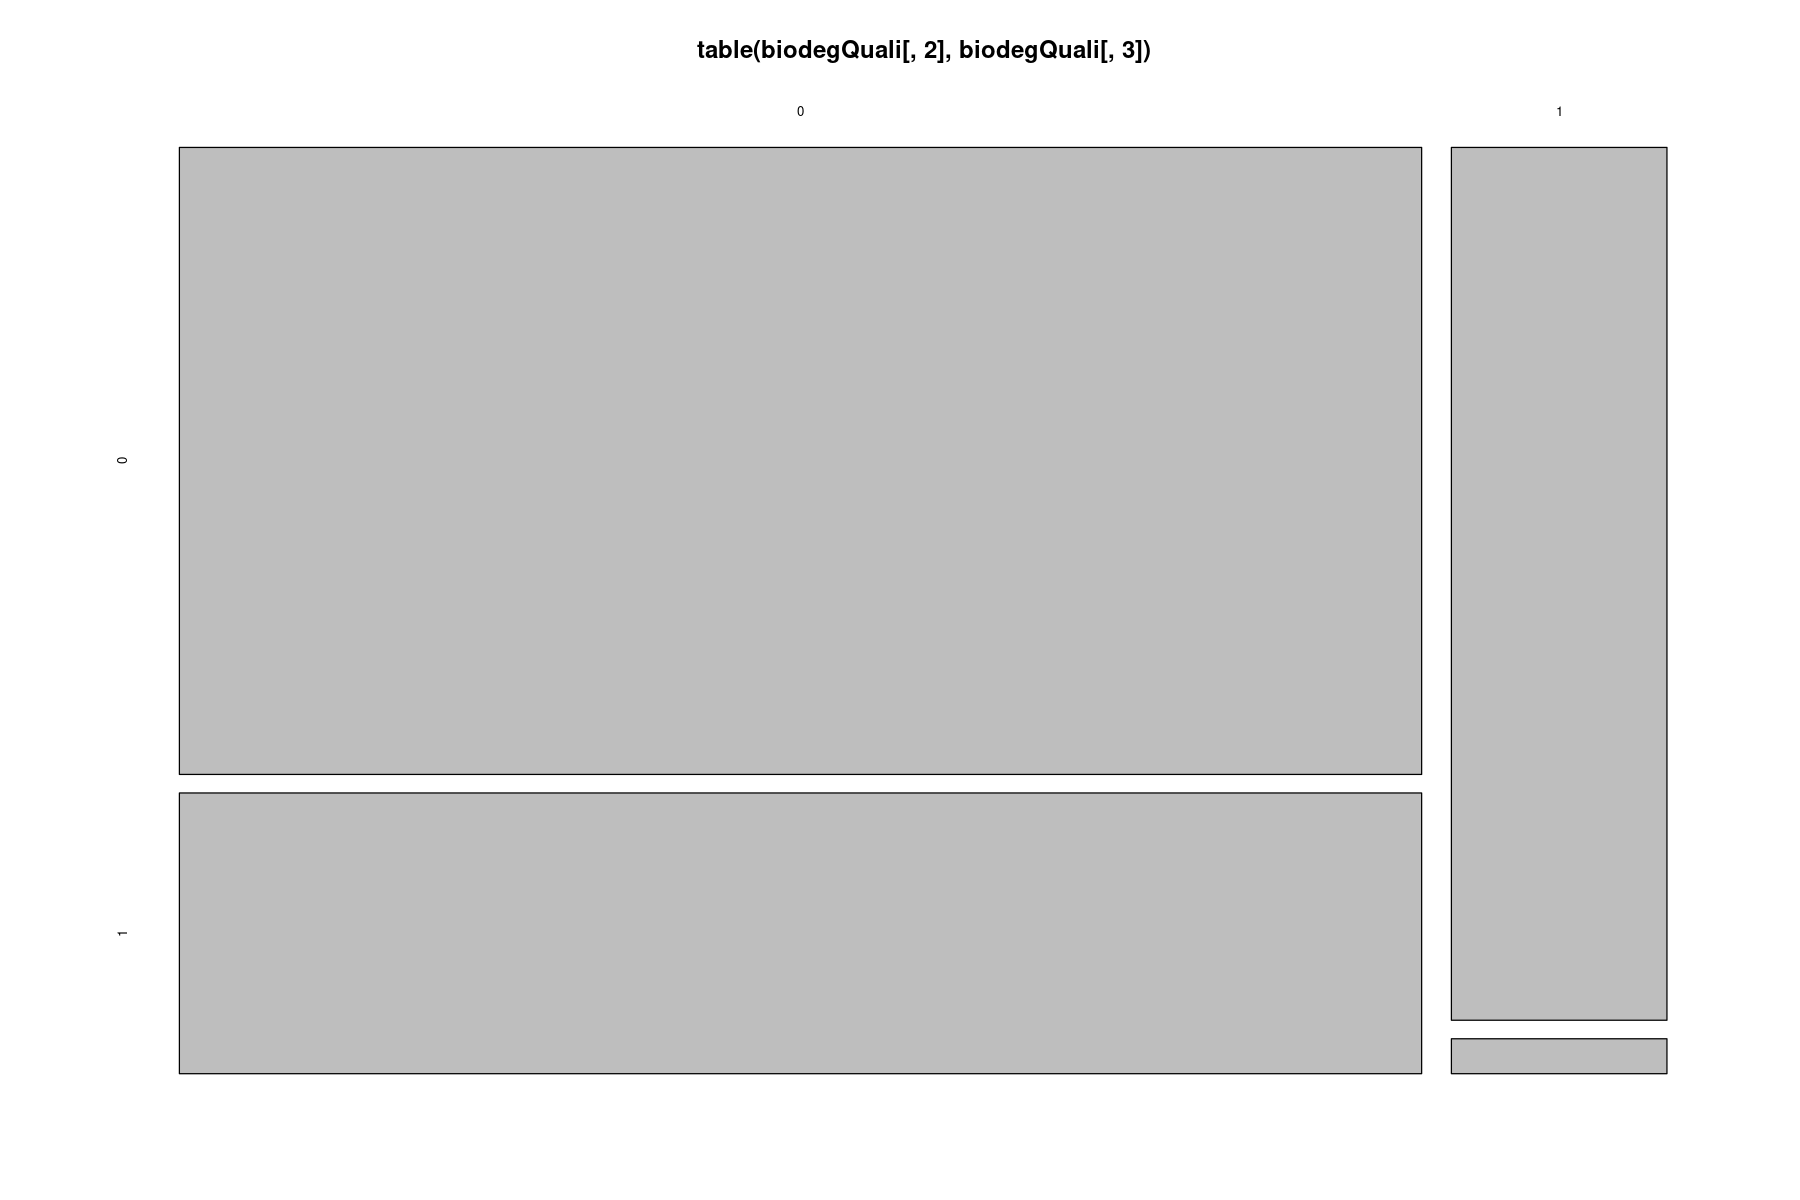

In [22]:
mosaicplot(table(biodegQuali[,2],biodegQuali[,3]))

In [23]:
summary(biodegQuali)

 B01.C.Br. B03.C.Cl. Y      
 0:1013    0:899     0:771  
 1:  42    1:156     1:284  

## Analyse en Composantes Principales

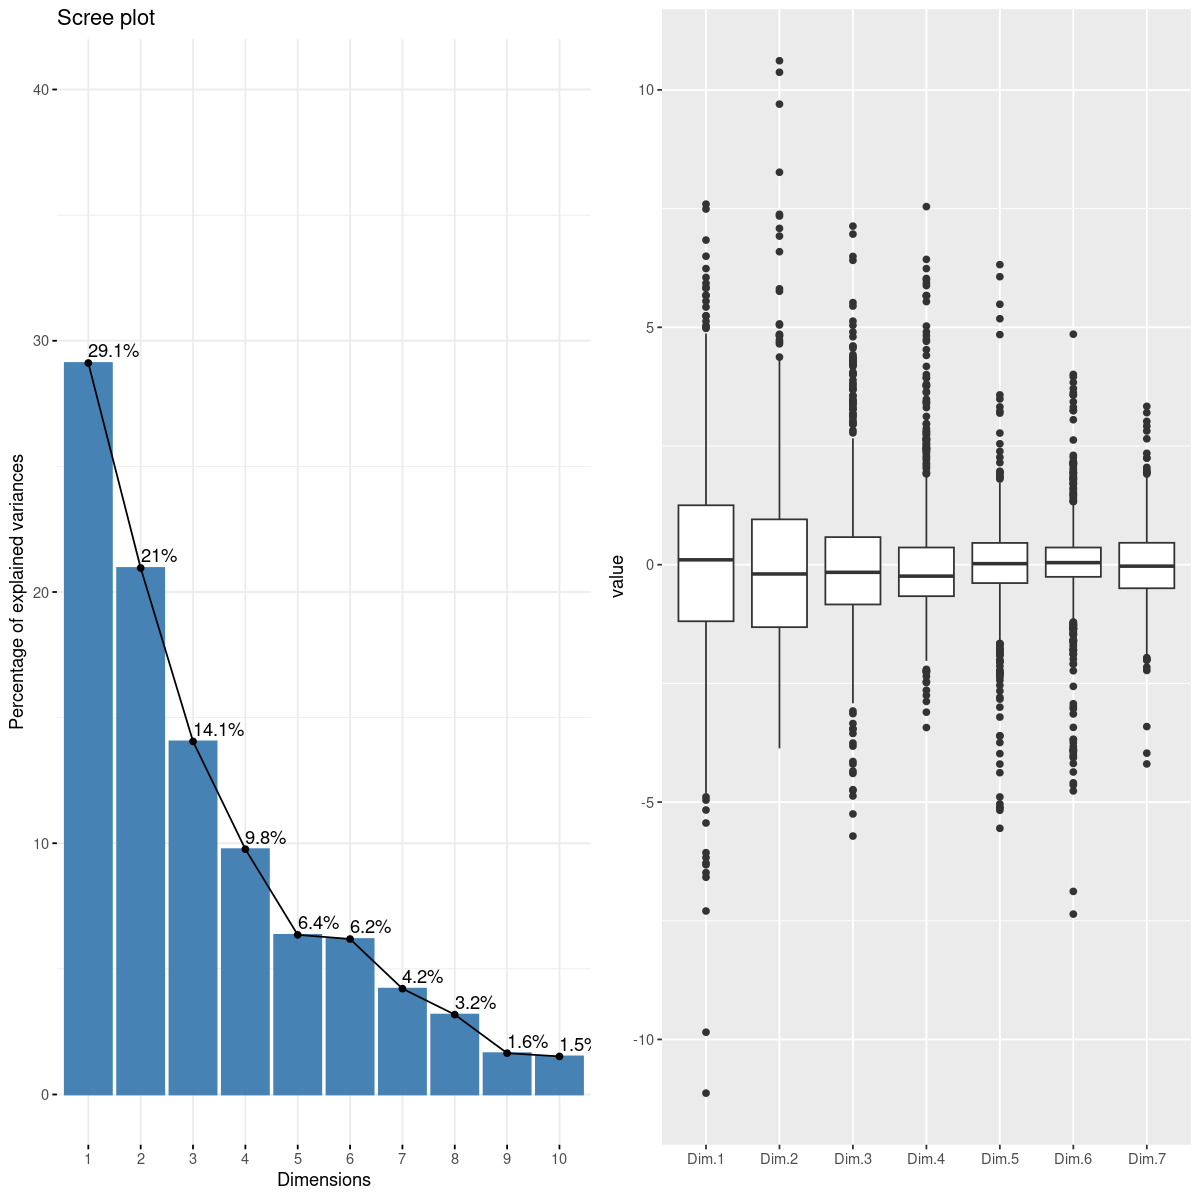

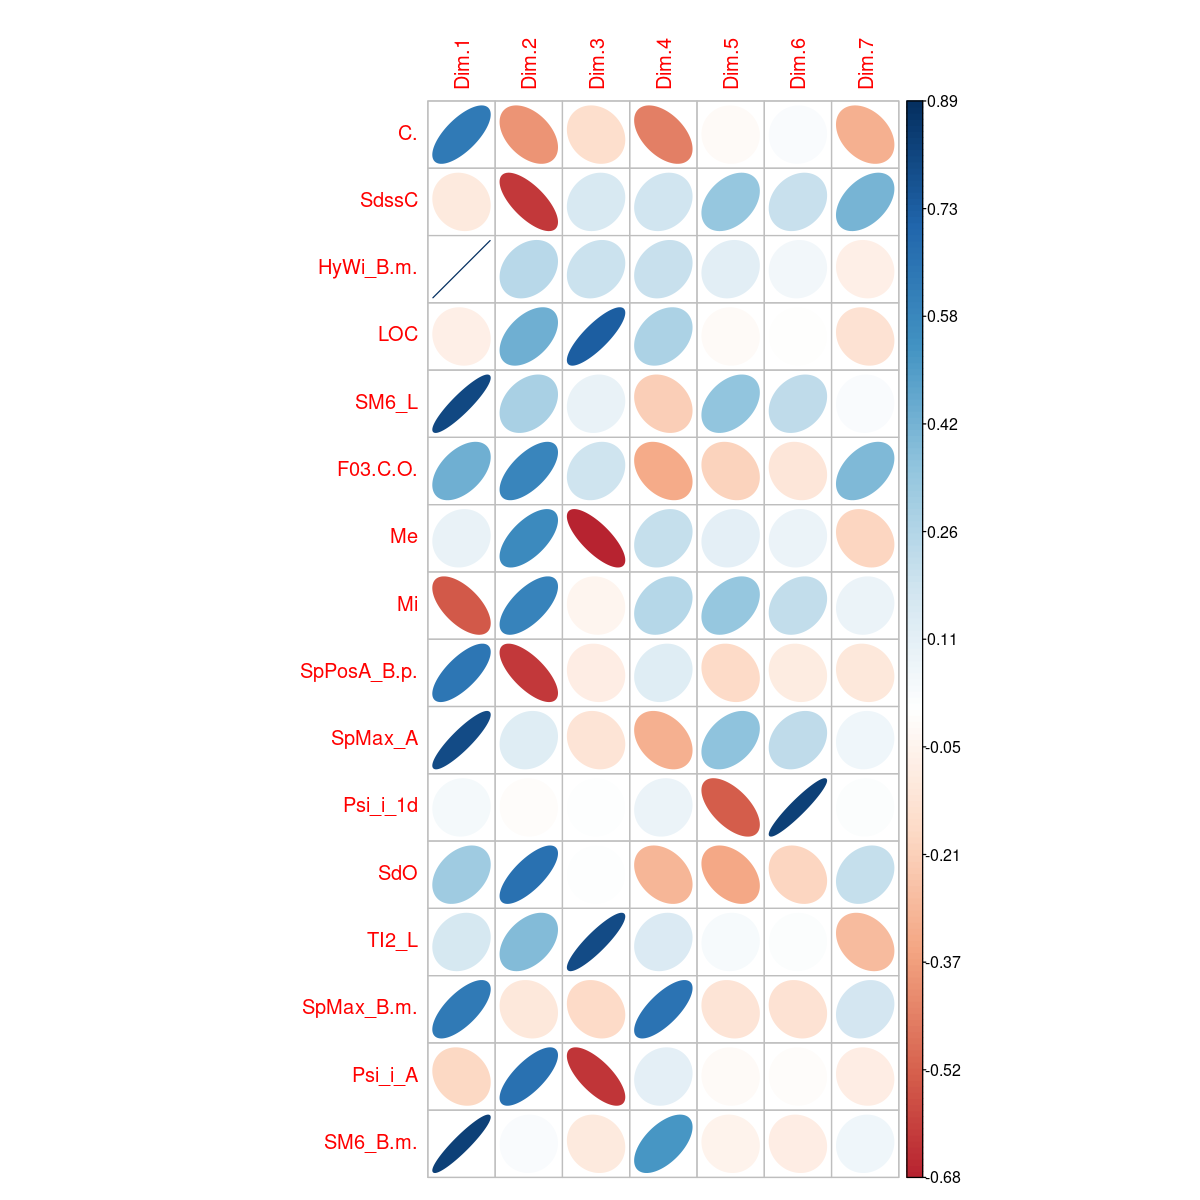

In [24]:
options(repr.plot.height=10,repr.plot.width=10)

# ACP réduite (centrée?) car échelles différentes
acp <- PCA(biodegQuanti, scale.unit = TRUE,
           graph = FALSE, quali.sup = 1, quanti.sup = 2, ncp = 7)
# Décroissance des valeurs propres
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)
# 
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

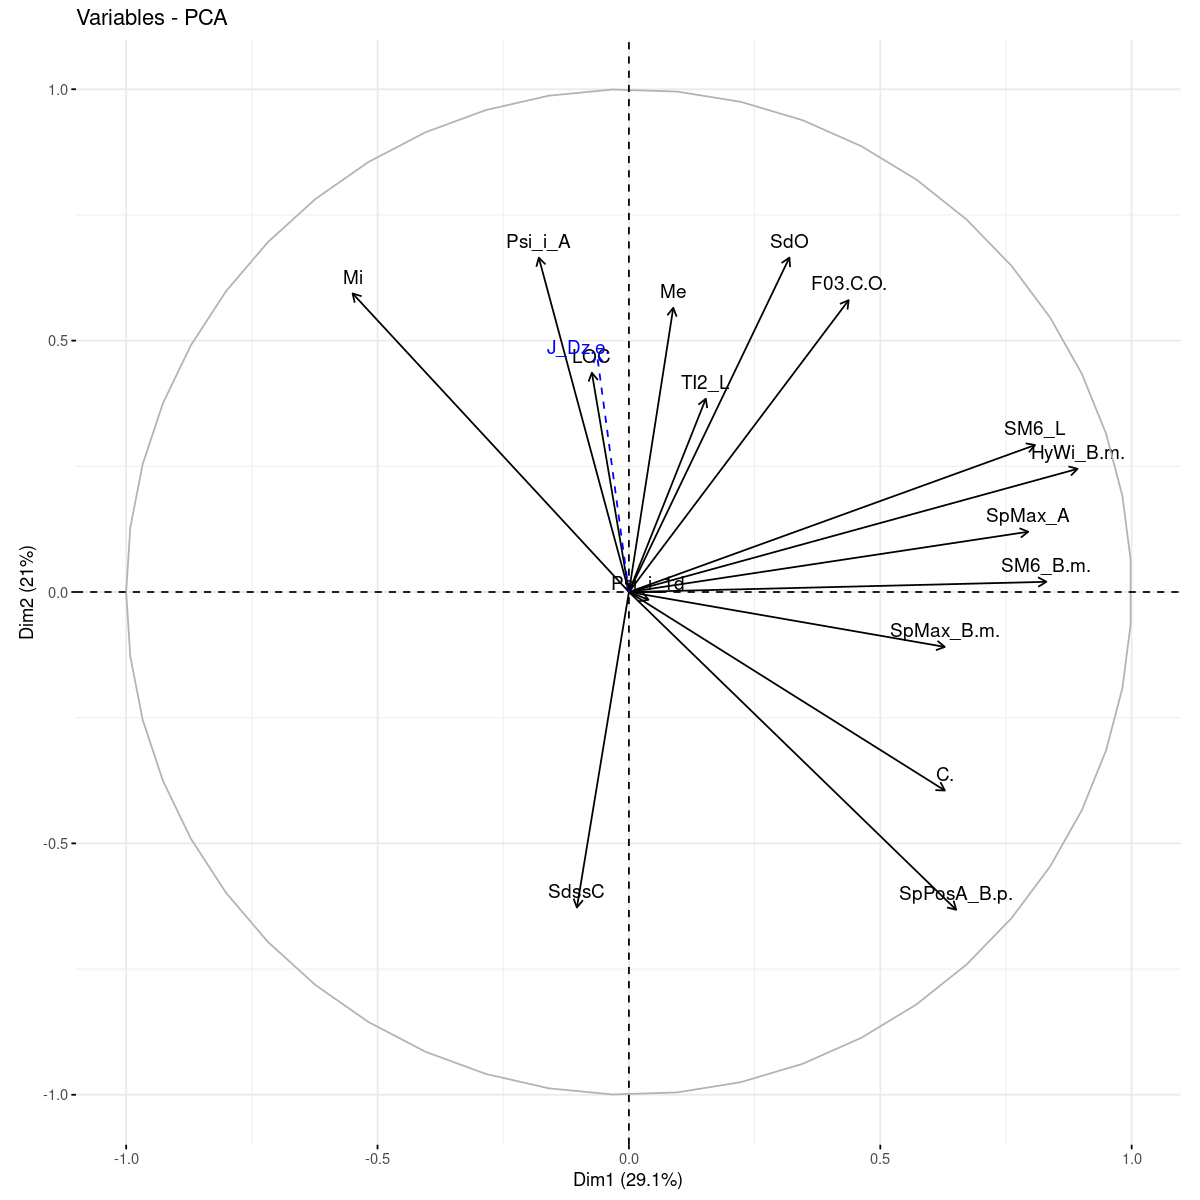

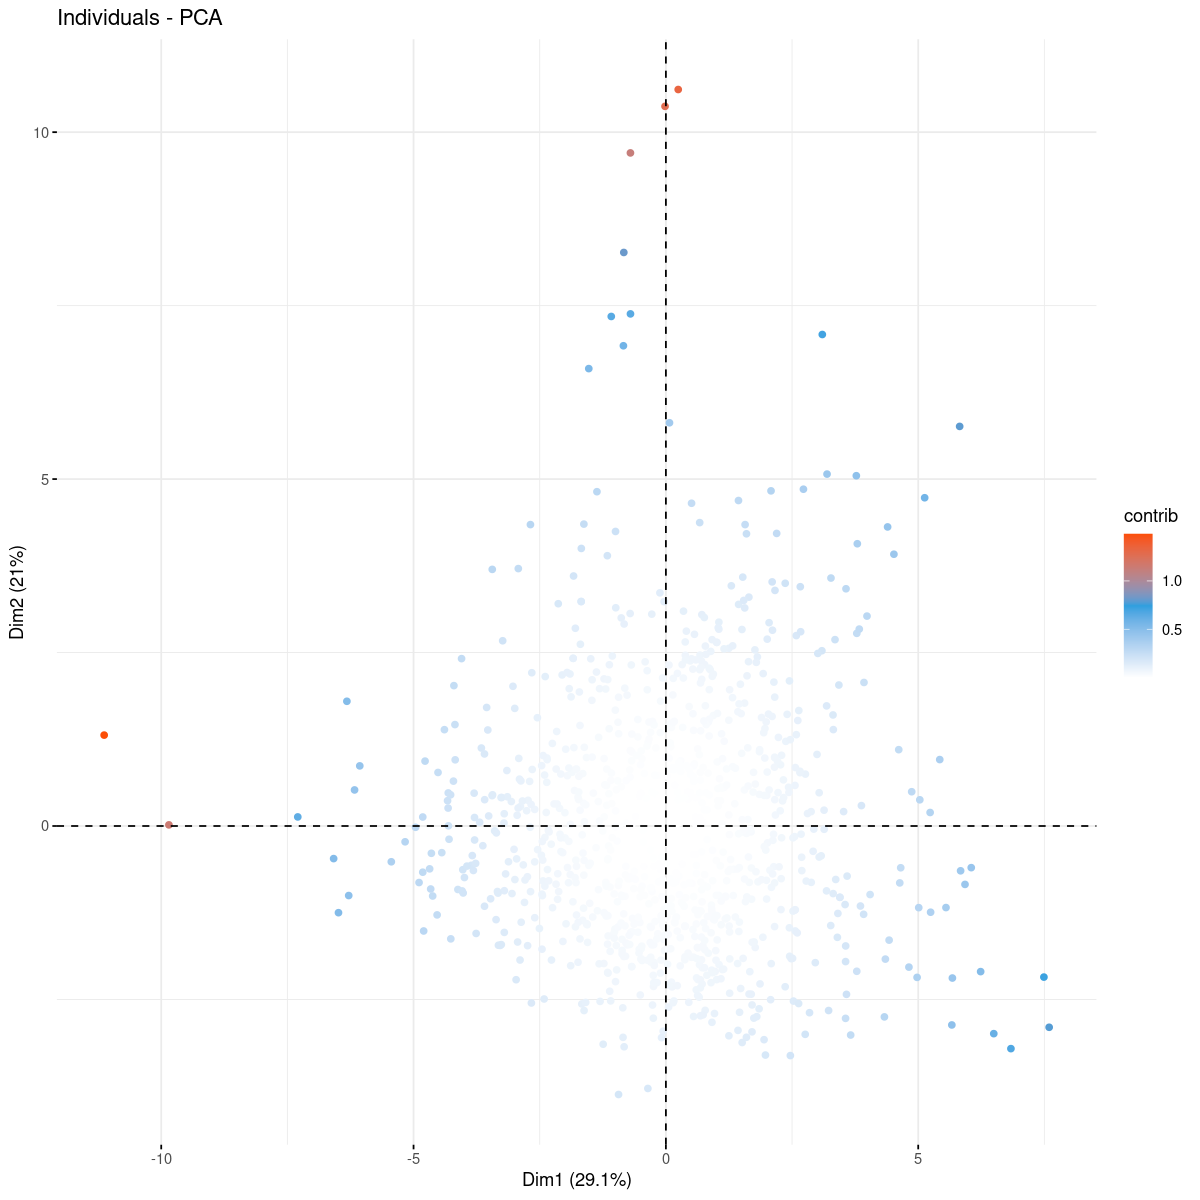

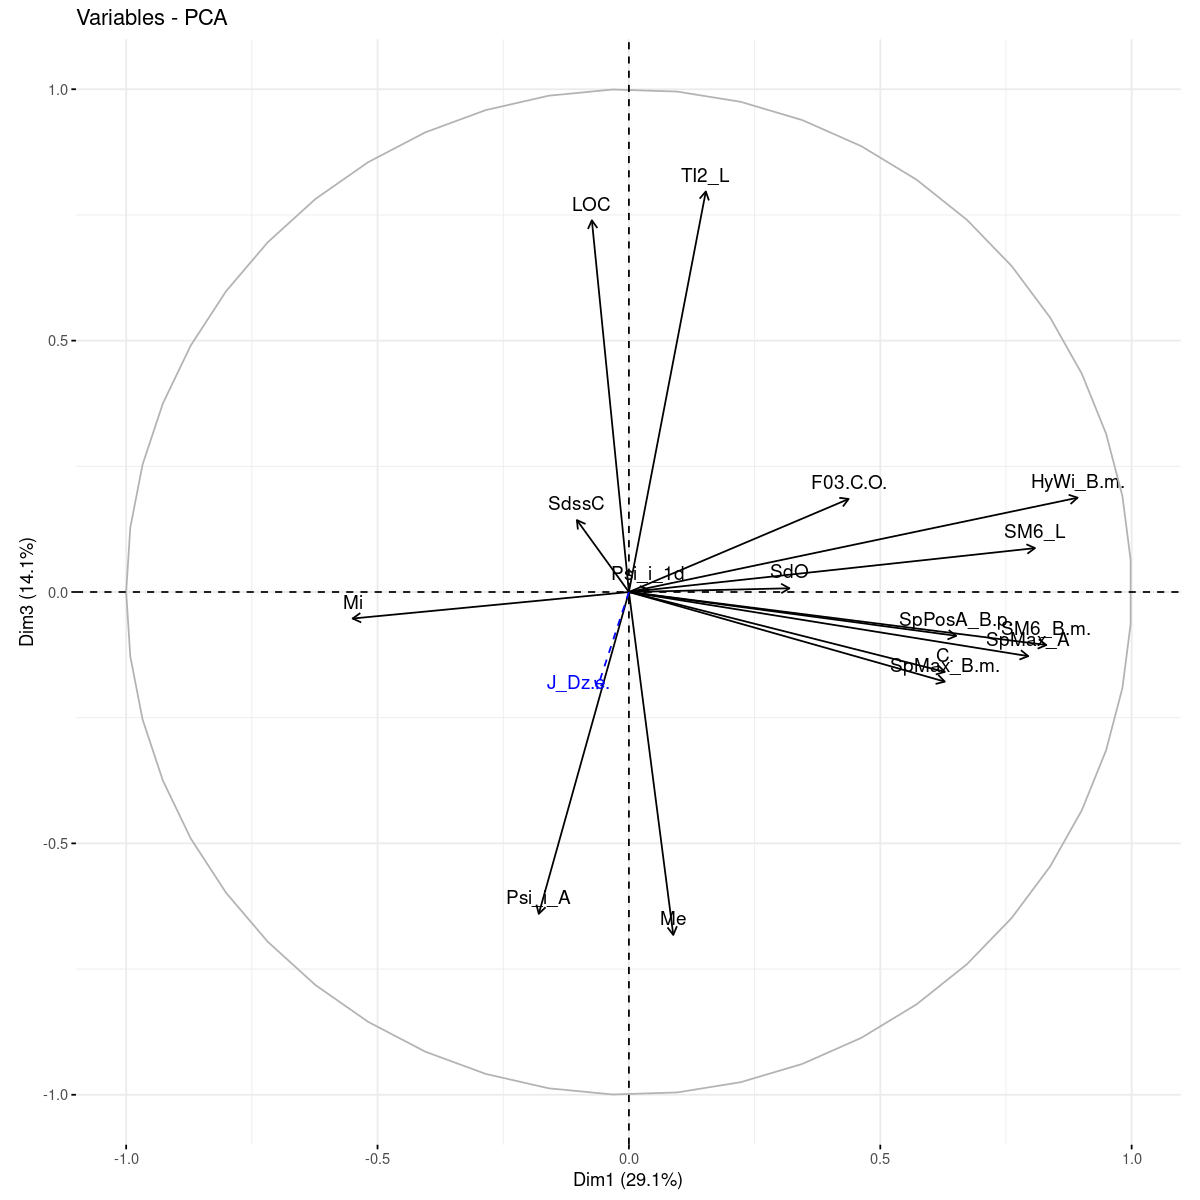

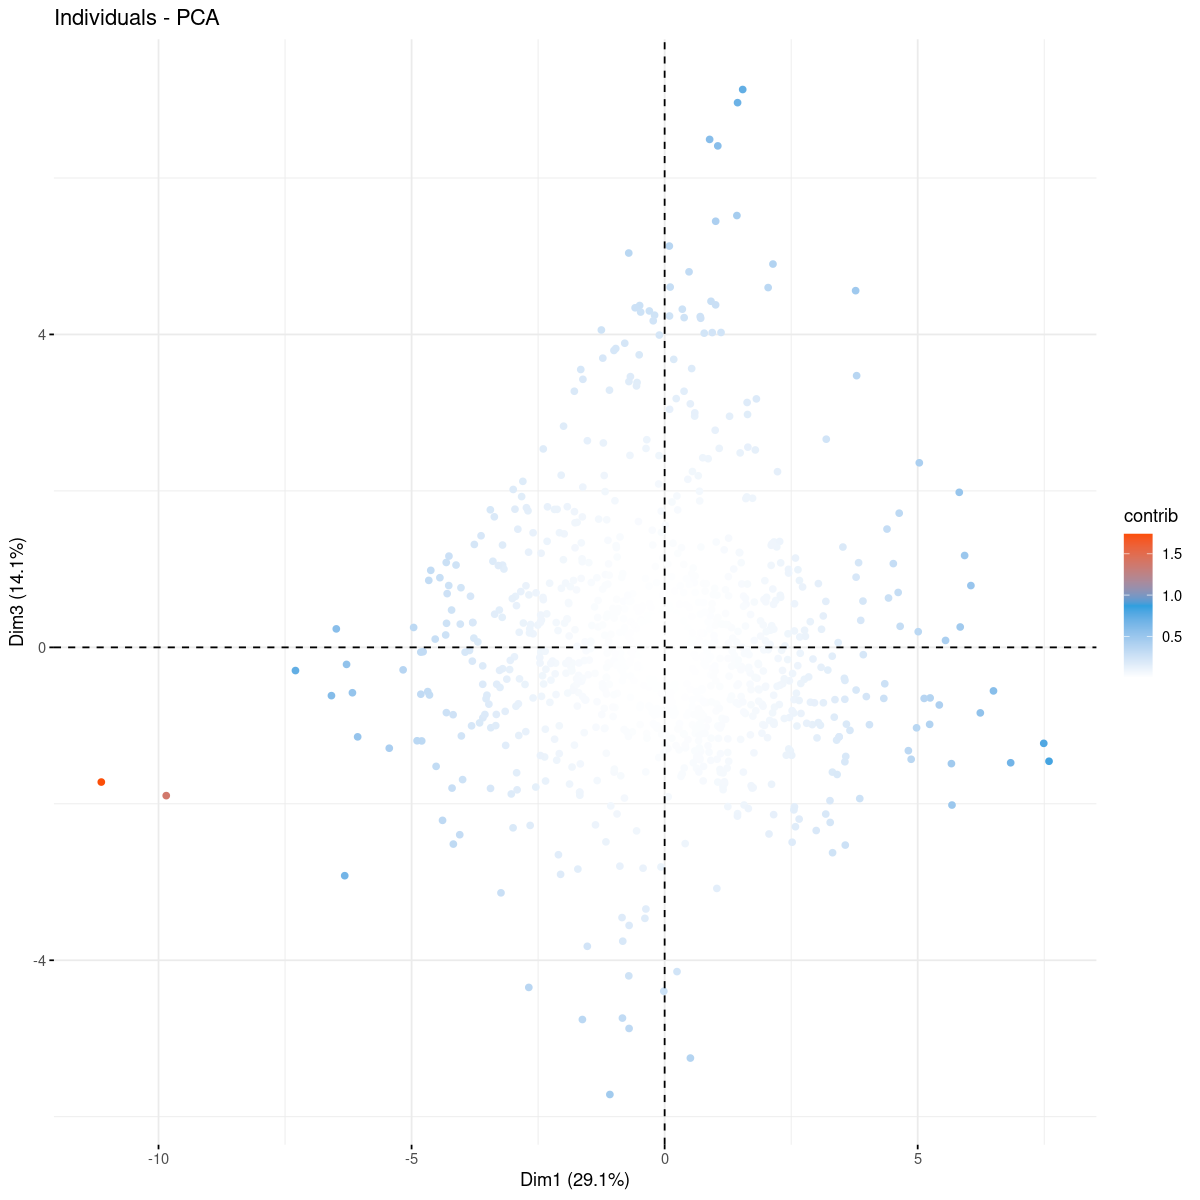

In [25]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '27'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '27'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '215' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '233' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '181' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '27'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '367' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '292' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '292' is i

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '166' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '170' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '246' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '27'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '243' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '245' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '152' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '226' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$si

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '338' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '182' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '145' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '145' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '182' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '246' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '415' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '406' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '216' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '253' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '264' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '192' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '282' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '222' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '416' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '325' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '397' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '402' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '413' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '367' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '345' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '286' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '211' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '403' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '344' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '407' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '270' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '251' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '428' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '327' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '350' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '187' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '148' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '153' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '171' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '219' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '362' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '432' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '386' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '393' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '393' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '429' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '298' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '303' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '31'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$si

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '380' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '423' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '300' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '189' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '216' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '280' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '188' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '400' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '156' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '157' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '158' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '159' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '160' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '161' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '162' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '163' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '226' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '227' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '228' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '229' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '230' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '231' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '232' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '233' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '296' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '297' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '298' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '299' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '300' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '301' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '302' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '303' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '366' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '367' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '368' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '369' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '370' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '371' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '372' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '373' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '436' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '437' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '438' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '439' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '440' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '27'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch va

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '155' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '155' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '156' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '156' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '157' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '157' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '158' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '158' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '190' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '190' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '191' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '191' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '192' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '192' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '193' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '193' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '225' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '225' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '226' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '226' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '227' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '227' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '228' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '228' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '260' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '260' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '261' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '261' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '262' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '262' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '263' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '263' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '295' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '295' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '296' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '296' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '297' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '297' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '298' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '298' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '330' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '330' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '331' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '331' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '332' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '332' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '333' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '333' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '365' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '365' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '366' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '366' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '367' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '367' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '368' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '368' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '400' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '400' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '401' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '401' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '402' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '402' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '403' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '403' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '435' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '435' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '436' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '436' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '437' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '437' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '438' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '438' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

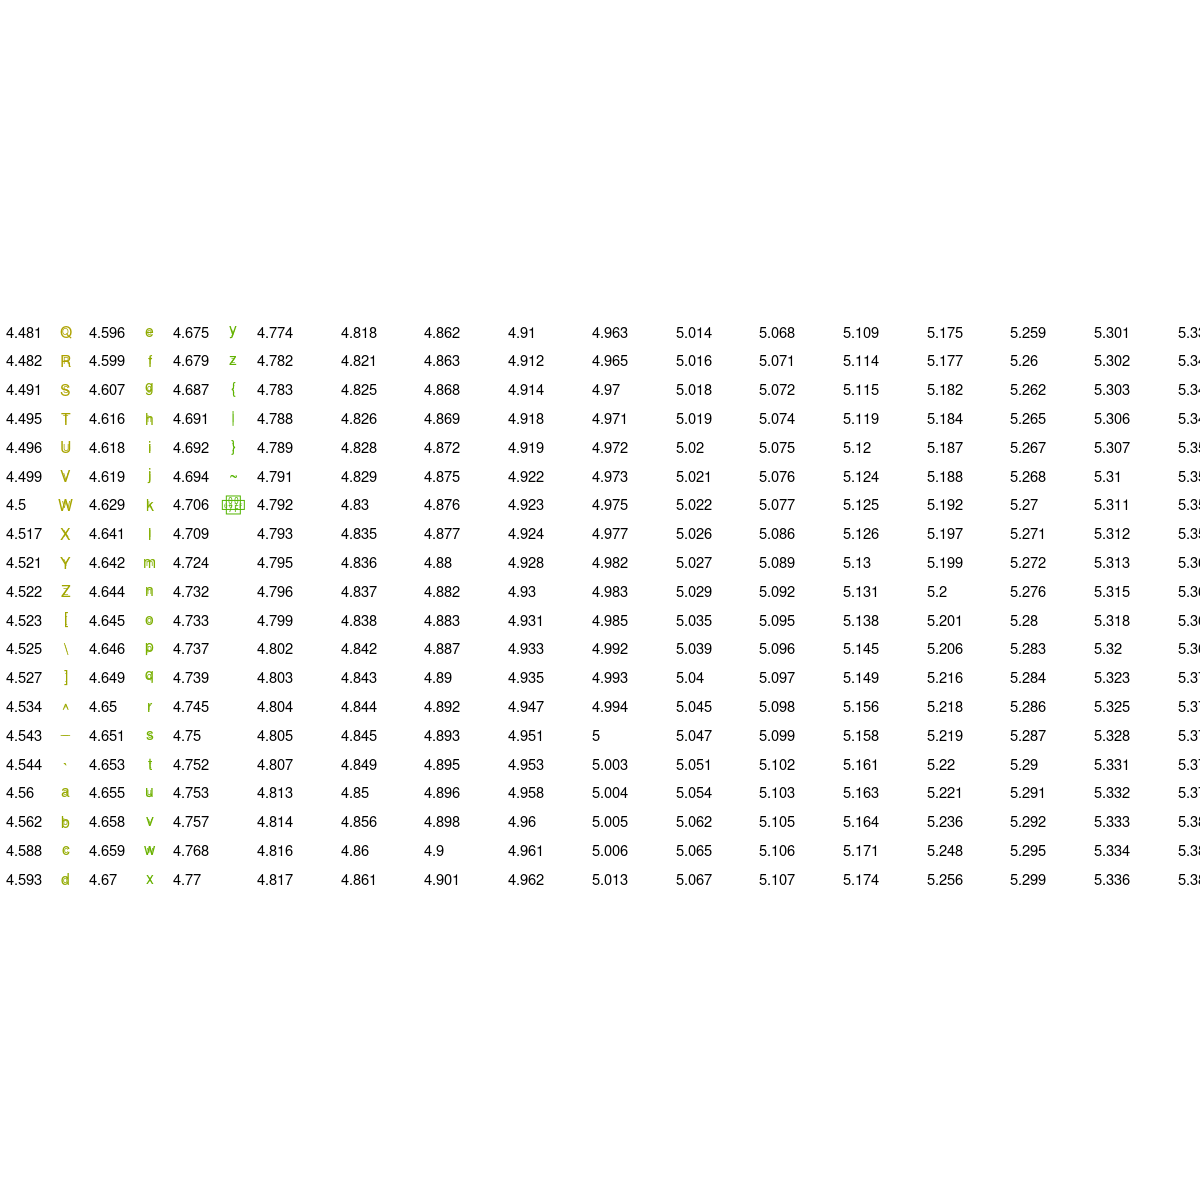

In [26]:
fviz_pca_ind(acp, label="none", habillage=1)

# Modélisation

## Régression logistique

### Régression logistique sans interraction

#### Sans selection de variable

In [27]:
# Estimation du modèle complet sans interraction 
log.lmSISS <- glm(Y ~. , data = datappr, family = binomial)
# significativité des paramètres
anova(log.lmSISS, test = "Chisq")

Df Deviance     Resid. Df Resid. Dev Pr(>Chi)    
NULL        NA           NA 843       988.7312             NA
SpMax_L      1 103.46234368 842       885.2688   2.653907e-24
J_Dz.e.      1   8.21474157 841       877.0541   4.155143e-03
C.           1   0.07860567 840       876.9755   7.791959e-01
SdssC        1  10.43264750 839       866.5428   1.238071e-03
HyWi_B.m.    1   7.67168333 838       858.8711   5.609410e-03
LOC          1  88.08312140 837       770.7880   6.276089e-21
SM6_L        1   9.52870133 836       761.2593   2.022832e-03
F03.C.O.     1  35.44542364 835       725.8139   2.622979e-09
Me           1  14.20068098 834       711.6132   1.643110e-04
Mi           1   9.92584832 833       701.6874   1.629737e-03
SpPosA_B.p.  1  27.42825156 832       674.2591   1.630320e-07
B01.C.Br.    1   4.06808210 831       670.1910   4.370087e-02
B03.C.Cl.    1   6.43436351 830       663.7567   1.119333e-02
SpMax_A      1  10.13605742 829       653.6206   1.453968e-03
Psi_i_1d     1   2.78871616 828       650.8319   9.493025e-02
SdO          1  10.18533639 827       640.6466   1.415619e-03
TI2_L        1   6.82108032 826       633.8255   9.008806e-03
SpMax_B.m.   1   2.53456929 825       631.2909   1.113773e-01
Psi_i_A      1   3.16071396 824       628.1302   7.543019e-02
SM6_B.m.     1   0.12237037 823       628.0078   7.264777e-01

In [28]:
summary(log.lmSISS)


Call:
glm(formula = Y ~ ., family = binomial, data = datappr)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 143.75434   30.88994   4.654 3.26e-06 ***
SpMax_L      -3.17675    0.99888  -3.180 0.001471 ** 
J_Dz.e.      -0.03302    0.25411  -0.130 0.896606    
C.            0.01012    0.04582   0.221 0.825182    
SdssC         0.23824    0.16806   1.418 0.156304    
HyWi_B.m.    -5.84516    1.51934  -3.847 0.000119 ***
LOC           0.81665    0.32449   2.517 0.011844 *  
SM6_L         2.96063    0.90930   3.256 0.001130 ** 
F03.C.O.      0.06488    0.04431   1.464 0.143080    
Me          -11.73266   11.38731  -1.030 0.302856    
Mi          -97.10798   21.26222  -4.567 4.94e-06 ***
SpPosA_B.p. -16.88181    4.49255  -3.758 0.000171 ***
B01.C.Br.1    0.83424    1.52588   0.547 0.584564    
B03.C.Cl.1   -0.36934    0.52690  -0.701 0.483328    
SpMax_A      -1.50542    2.72510  -0.552 0.580657    
Psi_i_1d     -0.98715    0.67333  -1.466 0.142628    
SdO 

D'après le z-test, certaines variables pourraient être enlevées comme J_Dz.e. ou B01.C.Br.1

In [29]:
# Calcul de la matrice de confusion pour les données d'apprentissage
tab_SISS =table(log.lmSISS$fitted.values > 0.5, datappr[, "Y"])
colnames(tab_SISS)=c("Non biodégradable","Biodégradable")
rownames(tab_SISS)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
tab_SISS

                               
                                Non biodégradable Biodégradable
   Prédiction non biodégradable               557            95
   Prédiction biodégradable                    57           135

In [30]:
#Mesure de la performance de cette méthode : 
Erreur=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}
training_errorlogSISS = Erreur(tab_SISS)
paste("Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable : ", training_errorlogSISS, "%")
#Accuracy= (TN+TP)/(N+P)
#accuracy <- sum(diag(tab_SISS)) / sum(tab_SISS)

#Precision = TP/(TP+FP)
#precision <- tab_SISS[2,2] / sum(tab_SISS[,2])

#Recall = TP/P
#recall <- tab_SISS[2,2] / sum(tab_SISS[2,])

#F1 = 2*TP/(2*TP+FP+FN) = 2*PPV*TPR/(PPV+TPR)
#f1_score <- 2 * precision * recall / (precision + recall)


#print(paste("Accuracy:", round(accuracy, 4)))
#print(paste("Precision:", round(precision, 4)))
#print(paste("Recall:", round(recall, 4)))
#print(paste("F1 Score:", round(f1_score, 4)))

[1] "Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable :  18.01 %"

In [31]:
#Prédiction avec ce modèle
pred.log.SISS<- predict(log.lmSISS, newdata = datestr,type = "response")
# Matrice de confusion pour la prévision 
matconf.log.SISSTest<-table(pred.log.SISS > 0.5, datestr[,"Y"])
matconf.log.SISSTest 

       
          0   1
  FALSE 144  24
  TRUE   13  30

In [32]:
test_errorlogSISS = Erreur(matconf.log.SISSTest)
paste("Erreur de généralisation pour le modèle sans interraction et avec sélection de variable : ", test_errorlogSISS, "%")

[1] "Erreur de généralisation pour le modèle sans interraction et avec sélection de variable :  17.54 %"

#### Avec sélection de variable avec critère AIC

In [33]:
log.lm.SISV <- step(log.lmSISS, direction = "backward")

Start:  AIC=670.01
Y ~ SpMax_L + J_Dz.e. + C. + SdssC + HyWi_B.m. + LOC + SM6_L + 
    F03.C.O. + Me + Mi + SpPosA_B.p. + B01.C.Br. + B03.C.Cl. + 
    SpMax_A + Psi_i_1d + SdO + TI2_L + SpMax_B.m. + Psi_i_A + 
    SM6_B.m.

              Df Deviance    AIC
- J_Dz.e.      1   628.02 668.02
- C.           1   628.06 668.06
- SM6_B.m.     1   628.13 668.13
- SpMax_A      1   628.31 668.31
- B01.C.Br.    1   628.33 668.33
- B03.C.Cl.    1   628.52 668.52
- SpMax_B.m.   1   628.84 668.84
- Me           1   629.12 669.12
<none>             628.01 670.01
- SdssC        1   630.02 670.02
- Psi_i_1d     1   630.13 670.13
- F03.C.O.     1   630.13 670.13
- Psi_i_A      1   631.26 671.26
- LOC          1   634.63 674.63
- SdO          1   634.77 674.77
- TI2_L        1   635.26 675.26
- SpMax_L      1   638.33 678.33
- SM6_L        1   638.87 678.87
- SpPosA_B.p.  1   643.53 683.53
- HyWi_B.m.    1   644.41 684.41
- Mi           1   650.72 690.72

Step:  AIC=668.02
Y ~ SpMax_L + C. + SdssC + HyWi

In [34]:
# Modèle obtenu
anova(log.lm.SISV, test = "Chisq")

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)    
NULL        NA         NA 843       988.7312             NA
SpMax_L      1 103.462344 842       885.2688   2.653907e-24
HyWi_B.m.    1   6.840881 841       878.4279   8.909488e-03
LOC          1  73.608452 840       804.8195   9.525593e-18
SM6_L        1  16.526466 839       788.2930   4.797573e-05
F03.C.O.     1  35.041246 838       753.2518   3.227948e-09
Me           1   6.925725 837       746.3260   8.496455e-03
Mi           1  38.552987 836       707.7731   5.328714e-10
SpPosA_B.p.  1  32.490933 835       675.2821   1.197499e-08
SdO          1  10.895675 834       664.3864   9.638907e-04
TI2_L        1  15.036638 833       649.3498   1.054441e-04
SpMax_B.m.   1  10.092528 832       639.2573   1.488717e-03
Psi_i_A      1   6.321030 831       632.9363   1.193143e-02

In [35]:
# Calcul de la matrice de confusion 
tab_SISV =table(log.lm.SISV$fitted.values > 0.5, datappr[, "Y"])
colnames(tab_SISV)=c("Non biodégradable","Biodégradable")
rownames(tab_SISV)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
tab_SISV

                               
                                Non biodégradable Biodégradable
   Prédiction non biodégradable               556            93
   Prédiction biodégradable                    58           137

In [36]:
#Mesure de la performance de cette méthode : 
Erreur=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}
training_errorlogSISV = Erreur(tab_SISV)
paste("Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable : ", training_errorlogSISV, "%")


[1] "Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable :  17.89 %"

In [37]:
#Prédiction avec ce modèle
pred.log.SISV<- predict(log.lm.SISV, newdata = datestr,type = "response")
# Matrice de confusion pour la prévision 
matconf.log.SISVTest<-table(pred.log.SISV > 0.5, datestr[,"Y"])
matconf.log.SISVTest 

       
          0   1
  FALSE 144  25
  TRUE   13  29

In [38]:
test_errorlogSISV = Erreur(matconf.log.SISVTest)
paste("Erreur de généralisation pour le modèle sans interraction et avec sélection de variable : ", test_errorlogSISV, "%")

[1] "Erreur de généralisation pour le modèle sans interraction et avec sélection de variable :  18.01 %"

On observe de meilleurs résultats avec sélection de variable que sans sélection de variable sur tous les critères

### Régression logistique avec interraction

#### Sans sélection de variable

In [39]:
# régression avec le modèle minimum
log.AISS <- glm(Y~.^2,, data = datappr,family = binomial)
# algorithme stepwise en précisant le plus grand 
# modèle possible
summary(log.AISS)

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Call:
glm(formula = Y ~ .^2, family = binomial, data = datappr)

Coefficients:
                         Estimate Std. Error    z value Pr(>|z|)    
(Intercept)             1.418e+17  2.576e+10    5502484   <2e-16 ***
SpMax_L                -3.349e+16  5.446e+09   -6149298   <2e-16 ***
J_Dz.e.                -1.841e+16  8.687e+08  -21197827   <2e-16 ***
C.                     -4.605e+13  9.656e+07    -476891   <2e-16 ***
SdssC                  -3.257e+16  7.361e+08  -44245528   <2e-16 ***
HyWi_B.m.              -2.248e+16  8.575e+09   -2621393   <2e-16 ***
LOC                    -2.116e+16  2.068e+09  -10235812   <2e-16 ***
SM6_L                  -5.308e+16  5.758e+09   -9217813   <2e-16 ***
F03.C.O.                6.201e+15  3.600e+08   17227595   <2e-16 ***
Me                     -6.299e+17  2.598e+10  -24251650   <2e-16 ***
Mi                      1.508e+17  1.823e+10    8271147   <2e-16 ***
SpPosA_B.p.            -1.598e+17  1.304e+10  -12248592   <2e-16 ***
B01.C.Br.1             

In [40]:
# Calcul de la matrice de confusion 
tab_AISS =table(log.AISS$fitted.values > 0.5, datappr[, "Y"])
colnames(tab_AISS)=c("Non biodégradable","Biodégradable")
rownames(tab_AISS)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
tab_AISS

                               
                                Non biodégradable Biodégradable
   Prédiction non biodégradable               542            38
   Prédiction biodégradable                    72           192

In [41]:
#Mesure de la performance de cette méthode : 
Erreur=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}
training_errorlogAISS = Erreur(tab_AISS)
paste("Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable : ", training_errorlogAISS, "%")


[1] "Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable :  13.03 %"

Meilleurs résultats avec interraction, on en déduit qu'il y a des effets d'interractions pour nos données

In [42]:
#Prédiction avec ce modèle
pred.log.AISS<- predict(log.AISS, newdata = datestr,type = "response")
# Matrice de confusion pour la prévision 
matconf.log.AISSTest<-table(pred.log.AISS > 0.5, datestr[,"Y"])
matconf.log.AISSTest 

       
          0   1
  FALSE 126  17
  TRUE   31  37

In [43]:
test_errorlogAISS = Erreur(matconf.log.AISSTest)
paste("Erreur de généralisation pour le modèle sans interraction et avec sélection de variable : ", test_errorlogAISS, "%")

[1] "Erreur de généralisation pour le modèle sans interraction et avec sélection de variable :  22.75 %"

#### Avec sélection de variable avec critère AIC

In [44]:
#Modèle minimum
log_min=glm(Y~1, data = datappr,family = binomial)
#Algo stepwise en précisant modèle minimum et modèle maximum car sinon l'algorithme met beaucoup trop de temps à converger
#dû au grand nombre de variables
log.AISV <- step(log_min, direction = "both",
    scope = list(lower = ~1, upper = ~(SpMax_L + J_Dz.e. + C. + SdssC + HyWi_B.m. + LOC+SM6_L + F03.C.O.+ Mi + Me+B01.C.Br. 
                                       +B03.C.Cl. + SpMax_A + Psi_i_1d + SM6_B.m. + TI2_L + SdO+ SpMax_B.m. +Psi_i_A+SpPosA_B.p.)^2), family=binomial)

Start:  AIC=990.73
Y ~ 1

              Df Deviance    AIC
+ SpMax_B.m.   1   872.47 876.47
+ SM6_B.m.     1   872.63 876.63
+ SpMax_L      1   885.27 889.27
+ SpMax_A      1   885.85 889.85
+ SpPosA_B.p.  1   891.02 895.02
+ HyWi_B.m.    1   914.99 918.99
+ SM6_L        1   917.21 921.21
+ LOC          1   935.24 939.24
+ B03.C.Cl.    1   938.88 942.88
+ TI2_L        1   959.63 963.63
+ C.           1   960.73 964.73
+ B01.C.Br.    1   976.97 980.97
+ Mi           1   978.05 982.05
+ Psi_i_A      1   980.15 984.15
+ Me           1   982.54 986.54
+ SdssC        1   984.04 988.04
+ SdO          1   984.21 988.21
<none>             988.73 990.73
+ Psi_i_1d     1   986.86 990.86
+ J_Dz.e.      1   988.67 992.67
+ F03.C.O.     1   988.72 992.72

Step:  AIC=876.47
Y ~ SpMax_B.m.

              Df Deviance    AIC
+ SpMax_A      1   843.75 849.75
+ LOC          1   846.30 852.30
+ SpMax_L      1   846.47 852.47
+ SdO          1   850.70 856.70
+ SpPosA_B.p.  1   853.02 859.02
+ B03.C.Cl.    

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
+ Mi:SpPosA_B.p.          1   672.55 688.55
+ SpMax_B.m.:SpPosA_B.p.  1   674.79 690.79
+ Me                      1   680.02 696.02
+ SpMax_A:SpPosA_B.p.     1   680.34 696.34
+ B03.C.Cl.               1   681.07 697.07
+ Mi:SpMax_A              1   681.39 697.39
+ LOC                     1   683.73 699.73
+ Mi:SpMax_B.m.           1   683.79 699.79
+ Psi_i_A                 1   687.79 703.79
+ SdssC                   1   688.26 704.26
+ SpMax_A:SpMax_B.m.      1   688.85 704.85
+ TI2_L                   1   688.85 704.85
+ B01.C.Br.               1   689.95 705.95
+ SM6_B.m.                1   691.51 707.51
+ SpMax_L                 1   692.40 708.40
<none>                        694.87 708.87
+ Psi_i_1d                1   694.03 710.03
+ SdO:SpMax_B.m.          1   694.07 710.07
+ J_Dz.e.                 1   694.24 710.24
+ C.                      1   694.27 710.27
+ SM6_L                   1   694.43 710.43
+ HyWi_B.m.               1   69

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=688.55
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + SpMax_A:SdO + 
    Mi:SpPosA_B.p.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
+ Me                      1   662.88 680.88
+ B03.C.Cl.               1   662.92 680.92
+ SdssC                   1   666.46 684.46
+ B01.C.Br.               1   667.74 685.74
+ LOC                     1   667.83 685.83
+ SM6_B.m.                1   668.85 686.85
+ TI2_L                   1   669.26 687.26
+ SpMax_B.m.:SpPosA_B.p.  1   669.75 687.75
+ Psi_i_A                 1   670.01 688.01
+ SpMax_L                 1   670.50 688.50
<none>                        672.55 688.55
+ C.                      1   670.67 688.67
+ Psi_i_1d                1   670.73 688.73
- SpMax_B.m.              1   674.75 688.75
+ SdO:SpMax_B.m.          1   671.08 689.08
+ J_Dz.e.                 1   671.51 689.51
+ SpMax_A:SpPosA_B.p.     1   671.59 689.59
+ HyWi_B.m.               1   672.10 690.10
+ Mi:SpMax_A              1   672.12 690.12
+ SdO:SpPosA_B.p.         1   672.17 690.17
+ SpMax_A:SpMax_B.m.      1   672.26 690.26
+ Mi:SdO                  1   67

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=680.88
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + Me + SpMax_A:SdO + 
    Mi:SpPosA_B.p.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
+ SM6_B.m.                1   656.69 676.69
+ B03.C.Cl.               1   657.94 677.94
+ SpMax_B.m.:SpPosA_B.p.  1   658.11 678.11
+ Psi_i_A                 1   658.61 678.61
+ HyWi_B.m.               1   658.81 678.81
- SpMax_B.m.              1   662.94 678.94
+ SdssC                   1   659.24 679.24
+ Psi_i_1d                1   660.64 680.64
+ Me:SpPosA_B.p.          1   660.72 680.72
+ SM6_L                   1   660.73 680.73
<none>                        662.88 680.88
+ SpMax_A:SpPosA_B.p.     1   661.21 681.21
+ C.                      1   661.30 681.30
+ SpMax_L                 1   661.47 681.47
+ LOC                     1   661.85 681.85
+ B01.C.Br.               1   661.86 681.86
+ SdO:SpPosA_B.p.         1   662.07 682.07
+ Mi:SpMax_A              1   662.27 682.27
+ SdO:SpMax_B.m.          1   662.28 682.28
+ Mi:Me                   1   662.31 682.31
+ Me:SdO                  1   662.39 682.39
+ Mi:SpMax_B.m.           1   66

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=676.69
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + Me + SM6_B.m. + 
    SpMax_A:SdO + Mi:SpPosA_B.p.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
+ TI2_L                   1   640.37 662.37
+ SM6_B.m.:SpPosA_B.p.    1   646.19 668.19
+ LOC                     1   646.95 668.95
+ SpMax_B.m.:SpPosA_B.p.  1   651.79 673.79
+ Mi:SM6_B.m.             1   652.33 674.33
+ B03.C.Cl.               1   653.91 675.91
+ Psi_i_1d                1   653.96 675.96
+ SpMax_A:SpPosA_B.p.     1   654.04 676.04
+ SpMax_A:SM6_B.m.        1   654.14 676.14
+ SdssC                   1   654.18 676.18
+ SpMax_L                 1   654.32 676.32
<none>                        656.69 676.69
+ SM6_B.m.:SdO            1   654.76 676.76
+ Me:SpPosA_B.p.          1   654.78 676.78
+ Psi_i_A                 1   655.21 677.21
+ SdO:SpPosA_B.p.         1   655.38 677.38
+ SdO:SpMax_B.m.          1   655.40 677.40
+ Me:SM6_B.m.             1   655.41 677.41
+ Me:SdO                  1   655.41 677.41
+ Mi:SpMax_A              1   655.58 677.58
+ HyWi_B.m.               1   655.63 677.63
+ B01.C.Br.               1   65

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=662.37
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + Me + SM6_B.m. + 
    TI2_L + SpMax_A:SdO + Mi:SpPosA_B.p.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
+ SM6_B.m.:SpPosA_B.p.    1   626.10 650.10
+ SpMax_B.m.:SpPosA_B.p.  1   631.61 655.61
+ Mi:SM6_B.m.             1   633.44 657.44
+ SpMax_A:SM6_B.m.        1   635.67 659.67
+ Psi_i_A                 1   635.68 659.68
+ Me:SpPosA_B.p.          1   636.12 660.12
+ SpMax_A:SpPosA_B.p.     1   636.32 660.32
- Me                      1   640.39 660.39
+ Psi_i_1d                1   636.99 660.99
+ SpMax_A:SpMax_B.m.      1   637.21 661.21
+ Mi:Me                   1   637.23 661.23
+ HyWi_B.m.               1   637.24 661.24
+ Mi:SpMax_B.m.           1   637.27 661.27
+ SdssC                   1   637.73 661.73
+ SdO:SpPosA_B.p.         1   637.87 661.87
+ SM6_B.m.:SpMax_B.m.     1   638.05 662.05
+ B03.C.Cl.               1   638.29 662.29
<none>                        640.37 662.37
+ Mi:SdO                  1   638.37 662.37
+ B01.C.Br.               1   638.46 662.46
+ SM6_B.m.:TI2_L          1   638.47 662.47
+ Me:SdO                  1   63

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
+ SdO:SpMax_B.m.          1   621.48 647.48
- Mi:SpPosA_B.p.          1   626.10 648.10
+ SdssC                   1   622.14 648.14
+ Me:SdO                  1   622.22 648.22
- Me                      1   626.24 648.24
+ SM6_B.m.:SdO            1   622.93 648.93
+ Psi_i_1d                1   623.23 649.23
+ Psi_i_A                 1   623.32 649.32
+ Me:SM6_B.m.             1   623.48 649.48
+ SM6_B.m.:TI2_L          1   623.96 649.96
<none>                        626.10 650.10
+ B01.C.Br.               1   624.45 650.45
+ SpMax_L                 1   624.68 650.68
+ TI2_L:SpPosA_B.p.       1   624.98 650.98
+ SpMax_A:SpMax_B.m.      1   625.06 651.06
+ Mi:SpMax_B.m.           1   625.18 651.18
+ SpMax_A:SM6_B.m.        1   625.19 651.19
+ Me:SpMax_B.m.           1   625.20 651.20
+ Me:TI2_L                1   625.26 651.26
+ C.                      1   625.28 651.28
+ B03.C.Cl.               1   625.29 651.29
+ Me:SpMax_A              1   62

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
+ SdssC                   1   614.07 642.07
- Mi:SpPosA_B.p.          1   621.52 645.52
- Me                      1   621.54 645.54
+ Psi_i_A                 1   618.59 646.59
+ Me:SdO                  1   618.72 646.72
+ Psi_i_1d                1   618.95 646.95
- SpMax_A:SdO             1   623.11 647.11
<none>                        621.48 647.48
+ TI2_L:SpPosA_B.p.       1   619.96 647.96
+ B01.C.Br.               1   620.08 648.08
+ B03.C.Cl.               1   620.43 648.43
+ Mi:SpMax_B.m.           1   620.61 648.61
+ SpMax_L                 1   620.69 648.69
+ Me:TI2_L                1   620.74 648.74
+ SM6_B.m.:TI2_L          1   620.86 648.86
+ J_Dz.e.                 1   620.92 648.92
+ SdO:SpPosA_B.p.         1   620.94 648.94
+ Mi:SM6_B.m.             1   620.99 648.99
+ C.                      1   621.05 649.05
+ Me:SpMax_A              1   621.06 649.06
+ Mi:Me                   1   621.17 649.17
+ Me:SM6_B.m.             1   62

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
+ SdssC:SpMax_B.m.        1   603.60 633.60
+ SdssC:SM6_B.m.          1   608.96 638.96
- Me                      1   614.15 640.15
- Mi:SpPosA_B.p.          1   614.32 640.32
- SpMax_A:SdO             1   614.41 640.41
+ Psi_i_A                 1   610.91 640.91
+ Psi_i_1d                1   611.43 641.43
<none>                        614.07 642.07
+ TI2_L:SpPosA_B.p.       1   612.25 642.25
+ Mi:SpMax_B.m.           1   612.27 642.27
+ B01.C.Br.               1   612.46 642.46
+ SdssC:Me                1   612.79 642.79
+ Mi:SM6_B.m.             1   612.84 642.84
+ Me:SdO                  1   612.94 642.94
+ B03.C.Cl.               1   612.96 642.96
+ SdssC:TI2_L             1   613.30 643.30
+ SpMax_L                 1   613.44 643.44
+ C.                      1   613.47 643.47
+ Me:SpPosA_B.p.          1   613.54 643.54
+ SM6_B.m.:TI2_L          1   613.56 643.56
+ SpMax_A:SpMax_B.m.      1   613.57 643.57
+ J_Dz.e.                 1   61

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
- Me                      1   603.62 631.62
+ Psi_i_A                 1   599.69 631.69
- Mi:SpPosA_B.p.          1   604.56 632.56
+ Psi_i_1d                1   600.96 632.96
+ SdssC:SpMax_A           1   601.48 633.48
- SpMax_A:SdO             1   605.54 633.54
<none>                        603.60 633.60
+ Me:SdO                  1   601.66 633.66
+ SdssC:Mi                1   601.83 633.83
+ SdssC:SdO               1   602.27 634.27
+ Mi:SpMax_B.m.           1   602.43 634.43
+ B03.C.Cl.               1   602.44 634.44
+ TI2_L:SpPosA_B.p.       1   602.45 634.45
+ B01.C.Br.               1   602.46 634.46
+ C.                      1   602.67 634.67
+ SdssC:TI2_L             1   602.78 634.78
+ SpMax_L                 1   602.82 634.82
+ Mi:Me                   1   602.84 634.84
+ Me:TI2_L                1   602.87 634.87
+ SpMax_A:SpMax_B.m.      1   602.92 634.92
+ Mi:SdO                  1   603.03 635.03
+ J_Dz.e.                 1   60

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
- Mi:SpPosA_B.p.          1   604.57 630.57
+ Psi_i_1d                1   600.97 630.97
- SpMax_A:SdO             1   605.57 631.57
<none>                        603.62 631.62
+ SdssC:SpMax_A           1   601.69 631.69
+ SdssC:Mi                1   601.86 631.86
+ Psi_i_A                 1   602.13 632.13
+ SdssC:SdO               1   602.42 632.42
+ Mi:SpMax_B.m.           1   602.43 632.43
+ B03.C.Cl.               1   602.44 632.44
+ TI2_L:SpPosA_B.p.       1   602.45 632.45
+ B01.C.Br.               1   602.49 632.49
+ C.                      1   602.71 632.71
+ SdssC:TI2_L             1   602.79 632.79
+ SpMax_L                 1   602.86 632.86
+ SpMax_A:SpMax_B.m.      1   602.94 632.94
+ J_Dz.e.                 1   603.05 633.05
+ Mi:SdO                  1   603.06 633.06
+ Mi:SM6_B.m.             1   603.19 633.19
+ SM6_B.m.:TI2_L          1   603.32 633.32
+ SM6_B.m.:SpMax_B.m.     1   603.38 633.38
+ TI2_L:SpMax_B.m.        1   60

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
+ Psi_i_1d:SpPosA_B.p.    1   598.55 628.55
+ SdssC:Mi                1   599.40 629.40
+ Psi_i_1d:TI2_L          1   599.69 629.69
<none>                        601.77 629.77
+ Mi:Psi_i_1d             1   599.88 629.88
+ Mi:SpMax_B.m.           1   599.97 629.97
+ Psi_i_A                 1   600.12 630.12
+ SdssC:SpMax_A           1   600.15 630.15
+ Psi_i_1d:SpMax_B.m.     1   600.16 630.16
- SpMax_A:SdO             1   604.18 630.18
+ Mi:SM6_B.m.             1   600.24 630.24
+ C.                      1   600.54 630.54
- Psi_i_1d                1   604.57 630.57
+ B03.C.Cl.               1   600.59 630.59
+ B01.C.Br.               1   600.60 630.60
+ SpMax_A:SpMax_B.m.      1   600.71 630.71
+ Psi_i_1d:SM6_B.m.       1   600.71 630.71
+ SdssC:TI2_L             1   600.81 630.81
+ Mi:SdO                  1   600.85 630.85
+ SdssC:SdO               1   600.88 630.88
+ Mi:SpPosA_B.p.          1   600.97 630.97
+ SdssC:Psi_i_1d          1   60

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
+ Psi_i_1d:TI2_L          1   595.88 627.88
+ SdssC:Mi                1   596.09 628.09
- SpMax_A:SdO             1   600.31 628.31
+ Mi:SpMax_B.m.           1   596.44 628.44
<none>                        598.55 628.55
+ SdssC:SpMax_A           1   596.61 628.61
+ Psi_i_A                 1   597.01 629.01
+ B03.C.Cl.               1   597.18 629.18
+ Mi:SM6_B.m.             1   597.33 629.33
+ SdssC:SdO               1   597.53 629.53
+ SdssC:TI2_L             1   597.53 629.53
+ B01.C.Br.               1   597.58 629.58
+ Mi:SdO                  1   597.64 629.64
- SpPosA_B.p.:Psi_i_1d    1   601.77 629.77
+ SpMax_L                 1   597.82 629.82
+ SpMax_A:SpMax_B.m.      1   597.85 629.85
+ Mi:SpPosA_B.p.          1   597.92 629.92
+ J_Dz.e.                 1   597.97 629.97
+ TI2_L:SpPosA_B.p.       1   597.99 629.99
+ SM6_B.m.:TI2_L          1   598.09 630.09
+ C.                      1   598.11 630.11
+ SdO:SpPosA_B.p.         1   59

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
+ SdssC:Mi                1   593.35 627.35
+ Mi:SpMax_B.m.           1   593.74 627.74
- SpMax_A:SdO             1   597.74 627.74
<none>                        595.88 627.88
+ SdssC:SpMax_A           1   594.06 628.06
+ Psi_i_A                 1   594.38 628.38
+ B03.C.Cl.               1   594.40 628.40
- TI2_L:Psi_i_1d          1   598.55 628.55
+ Mi:SM6_B.m.             1   594.73 628.73
+ SdssC:SdO               1   594.82 628.82
+ Mi:SdO                  1   594.92 628.92
+ SdssC:TI2_L             1   594.96 628.96
+ B01.C.Br.               1   594.96 628.96
+ SpMax_L                 1   595.11 629.11
+ SpMax_A:SpMax_B.m.      1   595.12 629.12
+ Mi:SpPosA_B.p.          1   595.15 629.15
+ J_Dz.e.                 1   595.41 629.41
+ TI2_L:SpPosA_B.p.       1   595.43 629.43
+ SM6_B.m.:TI2_L          1   595.45 629.45
+ C.                      1   595.45 629.45
+ SdO:SpPosA_B.p.         1   595.47 629.47
+ SdssC:SpPosA_B.p.       1   59

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                         Df Deviance    AIC
- SpMax_A:SdO             1   594.74 626.74
<none>                        593.35 627.35
+ SdssC:SdO               1   591.35 627.35
+ Mi:SM6_B.m.             1   591.61 627.61
+ Mi:SpMax_B.m.           1   591.61 627.61
- Mi:SdssC                1   595.88 627.88
+ B03.C.Cl.               1   592.02 628.02
- TI2_L:Psi_i_1d          1   596.09 628.09
+ Psi_i_A                 1   592.17 628.17
+ SdssC:SpMax_A           1   592.28 628.28
+ SdssC:TI2_L             1   592.32 628.32
+ SdssC:SpPosA_B.p.       1   592.49 628.49
+ B01.C.Br.               1   592.67 628.67
+ SpMax_L                 1   592.73 628.73
+ TI2_L:SpPosA_B.p.       1   592.75 628.75
+ SpMax_A:SpMax_B.m.      1   592.86 628.86
+ J_Dz.e.                 1   592.89 628.89
+ SM6_B.m.:TI2_L          1   592.92 628.92
+ F03.C.O.                1   592.96 628.96
+ C.                      1   593.00 629.00
+ Mi:SpMax_A              1   593.04 629.04
+ TI2_L:SpMax_B.m.        1   59

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=626.74
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + SM6_B.m. + 
    TI2_L + SdssC + Psi_i_1d + SpPosA_B.p.:SM6_B.m. + SpMax_B.m.:SdO + 
    SpMax_B.m.:SdssC + SpPosA_B.p.:Psi_i_1d + TI2_L:Psi_i_1d + 
    Mi:SdssC



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
+ SdssC:SdO               1   591.65 625.65
+ SdssC:SpMax_A           1   592.40 626.40
+ Psi_i_A                 1   592.70 626.70
<none>                        594.74 626.74
+ Mi:SM6_B.m.             1   592.74 626.74
+ Mi:SpMax_B.m.           1   592.91 626.91
+ B03.C.Cl.               1   593.24 627.24
+ SpMax_A:SdO             1   593.35 627.35
- TI2_L:Psi_i_1d          1   597.40 627.40
- Mi:SdssC                1   597.74 627.74
+ SdssC:SpPosA_B.p.       1   593.76 627.76
+ SdssC:TI2_L             1   593.76 627.76
+ SdssC:SM6_B.m.          1   594.00 628.00
+ TI2_L:SpPosA_B.p.       1   594.02 628.02
+ SpMax_A:SpMax_B.m.      1   594.13 628.13
+ B01.C.Br.               1   594.24 628.24
+ SM6_B.m.:SdO            1   594.26 628.26
+ Mi:SpMax_A              1   594.29 628.29
+ HyWi_B.m.               1   594.33 628.33
+ SM6_L                   1   594.33 628.33
+ TI2_L:SpMax_B.m.        1   594.38 628.38
+ C.                      1   59

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=625.65
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + SM6_B.m. + 
    TI2_L + SdssC + Psi_i_1d + SpPosA_B.p.:SM6_B.m. + SpMax_B.m.:SdO + 
    SpMax_B.m.:SdssC + SpPosA_B.p.:Psi_i_1d + TI2_L:Psi_i_1d + 
    Mi:SdssC + SdO:SdssC



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
+ Mi:SM6_B.m.             1   589.43 625.43
+ Mi:SpMax_B.m.           1   589.53 625.53
+ SdssC:TI2_L             1   589.59 625.59
<none>                        591.65 625.65
+ B03.C.Cl.               1   590.16 626.16
- TI2_L:Psi_i_1d          1   594.41 626.41
+ Psi_i_A                 1   590.70 626.70
- SdO:SdssC               1   594.74 626.74
+ TI2_L:SpPosA_B.p.       1   590.93 626.93
+ SdssC:SpMax_A           1   590.96 626.96
+ B01.C.Br.               1   591.03 627.03
+ SM6_L                   1   591.17 627.17
+ SdO:SpPosA_B.p.         1   591.21 627.21
+ SpMax_A:SpMax_B.m.      1   591.25 627.25
+ Mi:SpMax_A              1   591.26 627.26
+ SdssC:SM6_B.m.          1   591.33 627.33
+ Mi:SdO                  1   591.35 627.35
+ SpMax_A:SdO             1   591.35 627.35
+ TI2_L:SpMax_B.m.        1   591.37 627.37
+ SM6_B.m.:TI2_L          1   591.37 627.37
+ SpMax_L                 1   591.38 627.38
+ Mi:TI2_L                1   59

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=625.43
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + SM6_B.m. + 
    TI2_L + SdssC + Psi_i_1d + SpPosA_B.p.:SM6_B.m. + SpMax_B.m.:SdO + 
    SpMax_B.m.:SdssC + SpPosA_B.p.:Psi_i_1d + TI2_L:Psi_i_1d + 
    Mi:SdssC + SdO:SdssC + Mi:SM6_B.m.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
+ SdssC:TI2_L             1   587.35 625.35
<none>                        589.43 625.43
- Mi:SM6_B.m.             1   591.65 625.65
+ B03.C.Cl.               1   587.93 625.93
- TI2_L:Psi_i_1d          1   592.14 626.14
+ Psi_i_A                 1   588.41 626.41
+ TI2_L:SpPosA_B.p.       1   588.44 626.44
- SdO:SdssC               1   592.74 626.74
+ Mi:SdO                  1   588.93 626.93
+ SdssC:SM6_B.m.          1   588.94 626.94
+ SpMax_L                 1   589.01 627.01
+ SdssC:SpMax_A           1   589.01 627.01
+ Mi:SpMax_B.m.           1   589.03 627.03
+ SM6_B.m.:TI2_L          1   589.11 627.11
+ B01.C.Br.               1   589.11 627.11
+ SM6_L                   1   589.15 627.15
+ SdO:SpPosA_B.p.         1   589.17 627.17
+ HyWi_B.m.               1   589.20 627.20
+ SpMax_A:SM6_B.m.        1   589.21 627.21
+ LOC                     1   589.26 627.26
+ TI2_L:SpMax_B.m.        1   589.27 627.27
+ Mi:TI2_L                1   58

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=625.35
Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + SM6_B.m. + 
    TI2_L + SdssC + Psi_i_1d + SpPosA_B.p.:SM6_B.m. + SpMax_B.m.:SdO + 
    SpMax_B.m.:SdssC + SpPosA_B.p.:Psi_i_1d + TI2_L:Psi_i_1d + 
    Mi:SdssC + SdO:SdssC + Mi:SM6_B.m. + TI2_L:SdssC



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                         Df Deviance    AIC
<none>                        587.35 625.35
- TI2_L:SdssC             1   589.43 625.43
+ TI2_L:SpPosA_B.p.       1   585.44 625.44
- Mi:SM6_B.m.             1   589.59 625.59
+ B03.C.Cl.               1   585.64 625.64
- TI2_L:Psi_i_1d          1   589.96 625.96
+ Psi_i_A                 1   586.04 626.04
+ SpMax_A:TI2_L           1   586.69 626.69
+ TI2_L:SdO               1   586.80 626.80
+ Mi:SdO                  1   586.88 626.88
+ LOC                     1   586.93 626.93
+ SpMax_L                 1   586.94 626.94
+ SpMax_A:SM6_B.m.        1   586.96 626.96
+ SdO:SpPosA_B.p.         1   587.00 627.00
+ Mi:SpMax_B.m.           1   587.00 627.00
+ SM6_L                   1   587.04 627.04
+ TI2_L:SpMax_B.m.        1   587.09 627.09
+ B01.C.Br.               1   587.14 627.14
+ HyWi_B.m.               1   587.16 627.16
+ SdssC:SpMax_A           1   587.17 627.17
+ Mi:TI2_L                1   587.21 627.21
+ SM6_B.m.:SdO            1   58

In [45]:
summary(log.AISV)


Call:
glm(formula = Y ~ SpMax_B.m. + SpMax_A + SdO + Mi + SpPosA_B.p. + 
    SM6_B.m. + TI2_L + SdssC + Psi_i_1d + SpPosA_B.p.:SM6_B.m. + 
    SpMax_B.m.:SdO + SpMax_B.m.:SdssC + SpPosA_B.p.:Psi_i_1d + 
    TI2_L:Psi_i_1d + Mi:SdssC + SdO:SdssC + Mi:SM6_B.m. + TI2_L:SdssC, 
    family = binomial, data = datappr)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -157.41276  163.16853  -0.965 0.334683    
SpMax_B.m.              5.37508    0.84652   6.350 2.16e-10 ***
SpMax_A                -4.84126    1.01725  -4.759 1.94e-06 ***
SdO                     0.59130    0.11482   5.150 2.60e-07 ***
Mi                     44.26124  113.77818   0.389 0.697266    
SpPosA_B.p.           105.19131   30.58251   3.440 0.000583 ***
SM6_B.m.               40.64815   20.41867   1.991 0.046510 *  
TI2_L                   0.41702    0.08705   4.791 1.66e-06 ***
SdssC                  30.65746    6.98404   4.390 1.14e-05 ***
Psi_i_1d              -11.6880

In [46]:
# Calcul de la matrice de confusion 
tab_AISV =table(log.AISV$fitted.values > 0.5, datappr[, "Y"])
colnames(tab_AISV)=c("Non biodégradable","Biodégradable")
rownames(tab_AISV)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
tab_AISV

                               
                                Non biodégradable Biodégradable
   Prédiction non biodégradable               557            88
   Prédiction biodégradable                    57           142

In [47]:
#Mesure de la performance de cette méthode : 
Erreur=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}
training_errorlogAISV = Erreur(tab_AISV)
paste("Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable : ", training_errorlogAISV, "%")


[1] "Erreur d'apprentissage pour le modèle sans interraction et sans sélection de variable :  17.18 %"

In [48]:
#Prédiction avec ce modèle
pred.log.AISV<- predict(log.AISV, newdata = datestr,type = "response")
# Matrice de confusion pour la prévision 
matconf.log.AISVTest<-table(pred.log.AISV > 0.5, datestr[,"Y"])
matconf.log.AISVTest 

       
          0   1
  FALSE 138  21
  TRUE   19  33

Résultats moins satisfaisants avec sélection de variable, on a probablement enlevé des variables trop importantes

In [49]:
test_errorlogAISV = Erreur(matconf.log.AISVTest)
paste("Erreur de généralisation pour le modèle sans interraction et avec sélection de variable : ", test_errorlogAISV, "%")

[1] "Erreur de généralisation pour le modèle sans interraction et avec sélection de variable :  18.96 %"

### Régression logistique avec pénalisation LASSO

Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning messag

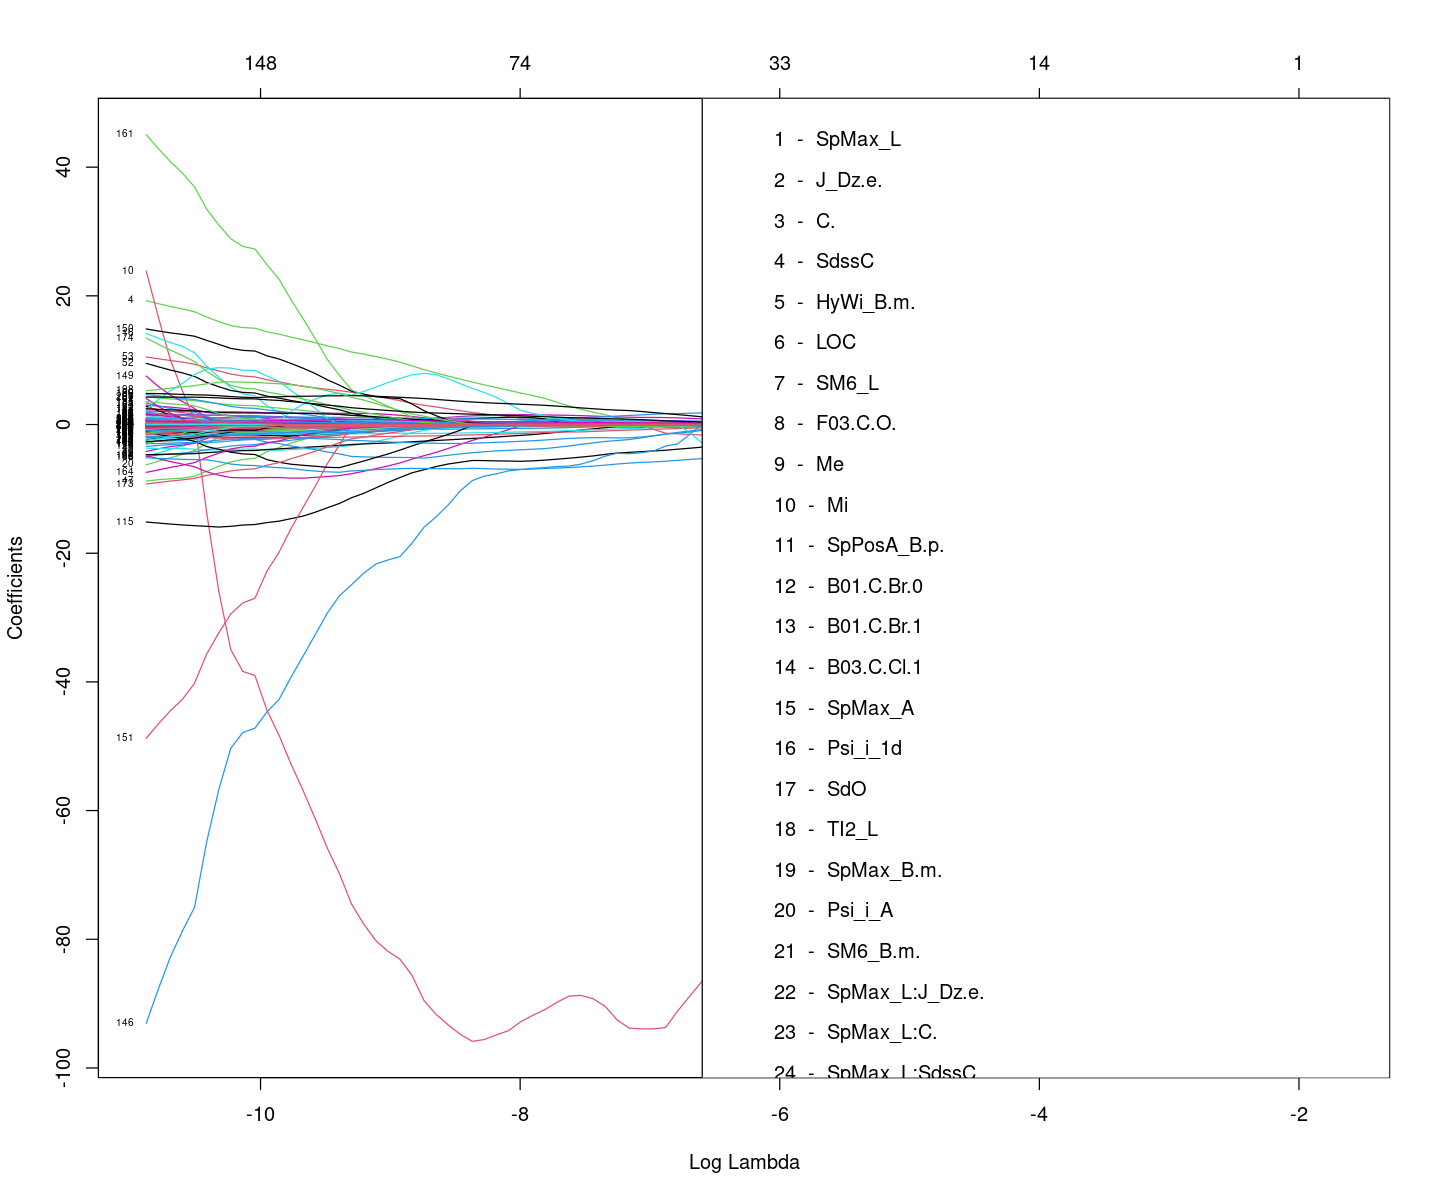

In [50]:
#On garde les interractions
#LASSO est fait ici avec lambdamin, soit la pénalisation minimum
mat.inter <- model.matrix(Y ~ .^2 - 1, data = datappr)
log.lasso <- glmnet(y = datappr$Y, x = mat.inter, family=binomial)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(log.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(mat.inter), " - ", colnames(mat.inter)))

In [52]:
#class_pred <- predict(log.lasso, newx = mat.inter, type = "class",s="lambda.1se")


# Calcul de l'erreur d'apprentissage
#erreur_apprentissage <- mean(class_pred != datappr$Y)

Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning messag

Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning messag

Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning message:
“glmnet.fit: algorithm did not converge”
Warning messag

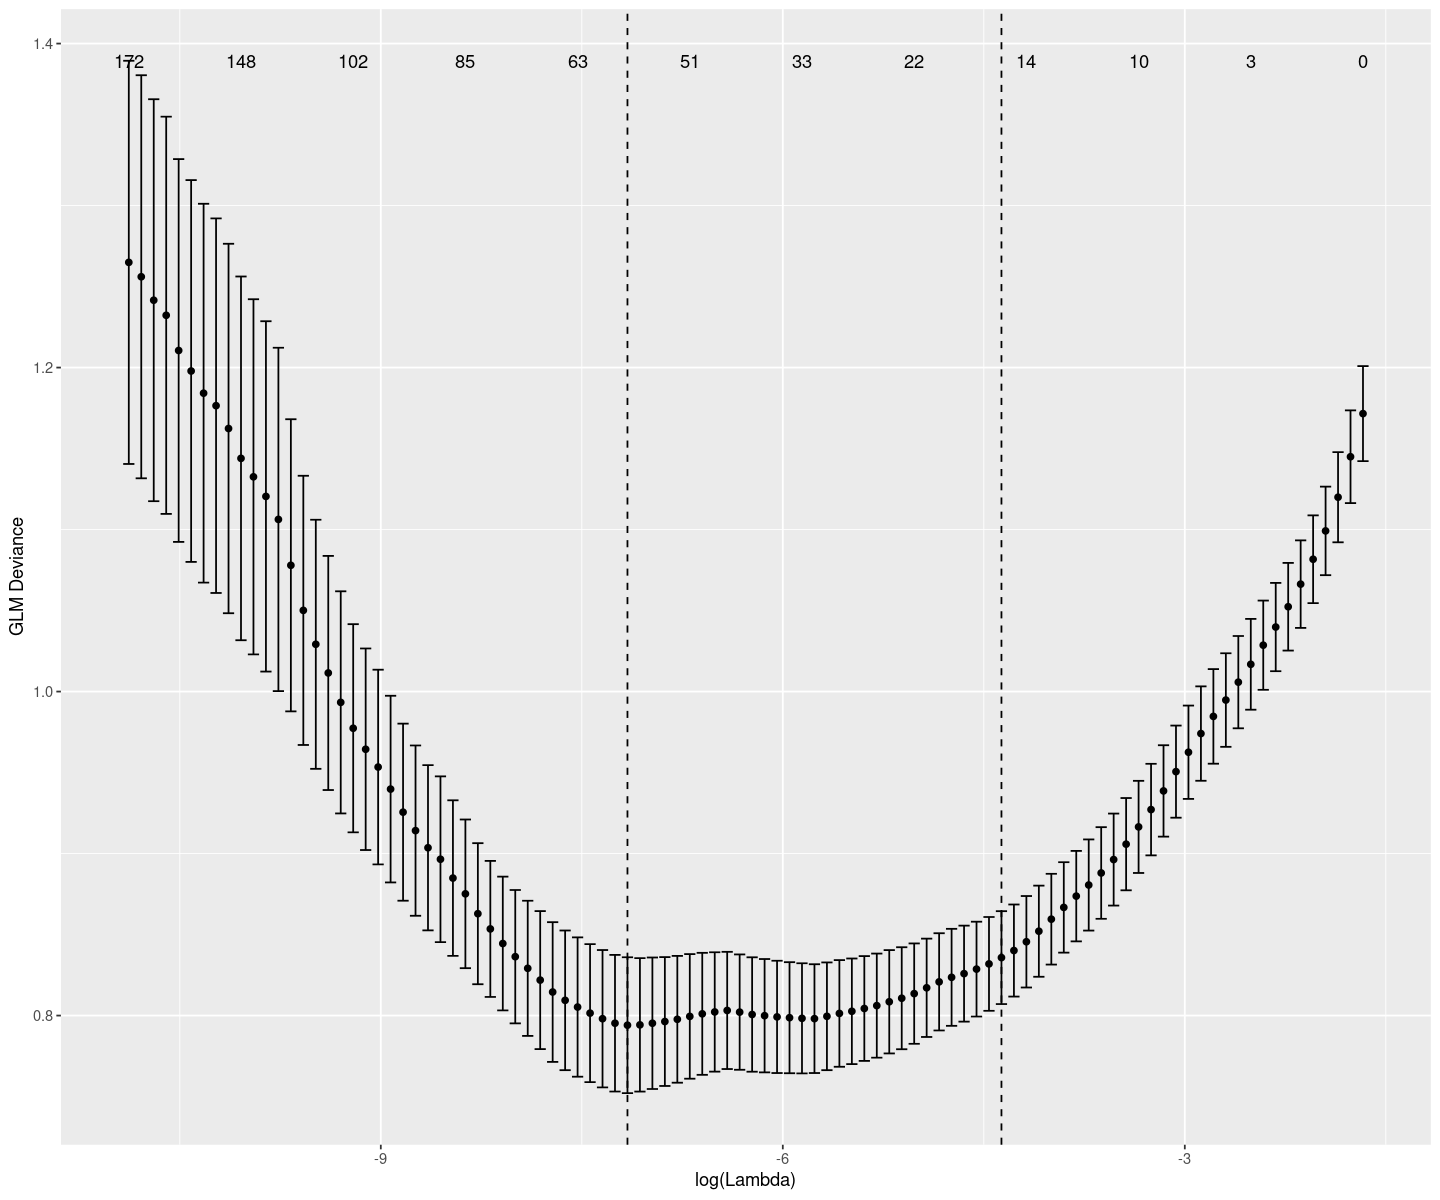

In [53]:
#Lasso avec cross validation
log.lasso.cv <- cv.glmnet(y = datappr$Y, x = mat.inter, family=binomial)
autoplot(log.lasso.cv)

L'algotithme met du temps à converger à cause du grand nombre de variables dû aux interractions

In [54]:
# Valeur de lambda estimée pour une pénalisation plus grande, le lambda d'elastic net
paste("CV estimate of lambda :", round(log.lasso.cv$lambda.1se, 3))
# Modèle choisi, 
coef(log.lasso.cv, s = "lambda.1se")


[1] "CV estimate of lambda : 0.013"

212 x 1 sparse Matrix of class "dgCMatrix"
                                  s1
(Intercept)             2.628300e+01
SpMax_L                 .           
J_Dz.e.                 .           
C.                      .           
SdssC                   .           
HyWi_B.m.               .           
LOC                     .           
SM6_L                   .           
F03.C.O.                .           
Me                      .           
Mi                     -1.189806e+01
SpPosA_B.p.             .           
B01.C.Br.0              .           
B01.C.Br.1              .           
B03.C.Cl.1              .           
SpMax_A                 .           
Psi_i_1d                .           
SdO                     .           
TI2_L                   .           
SpMax_B.m.              .           
Psi_i_A                 .           
SM6_B.m.                .           
SpMax_L:J_Dz.e.         .           
SpMax_L:C.              .           
SpMax_L:SdssC           .       

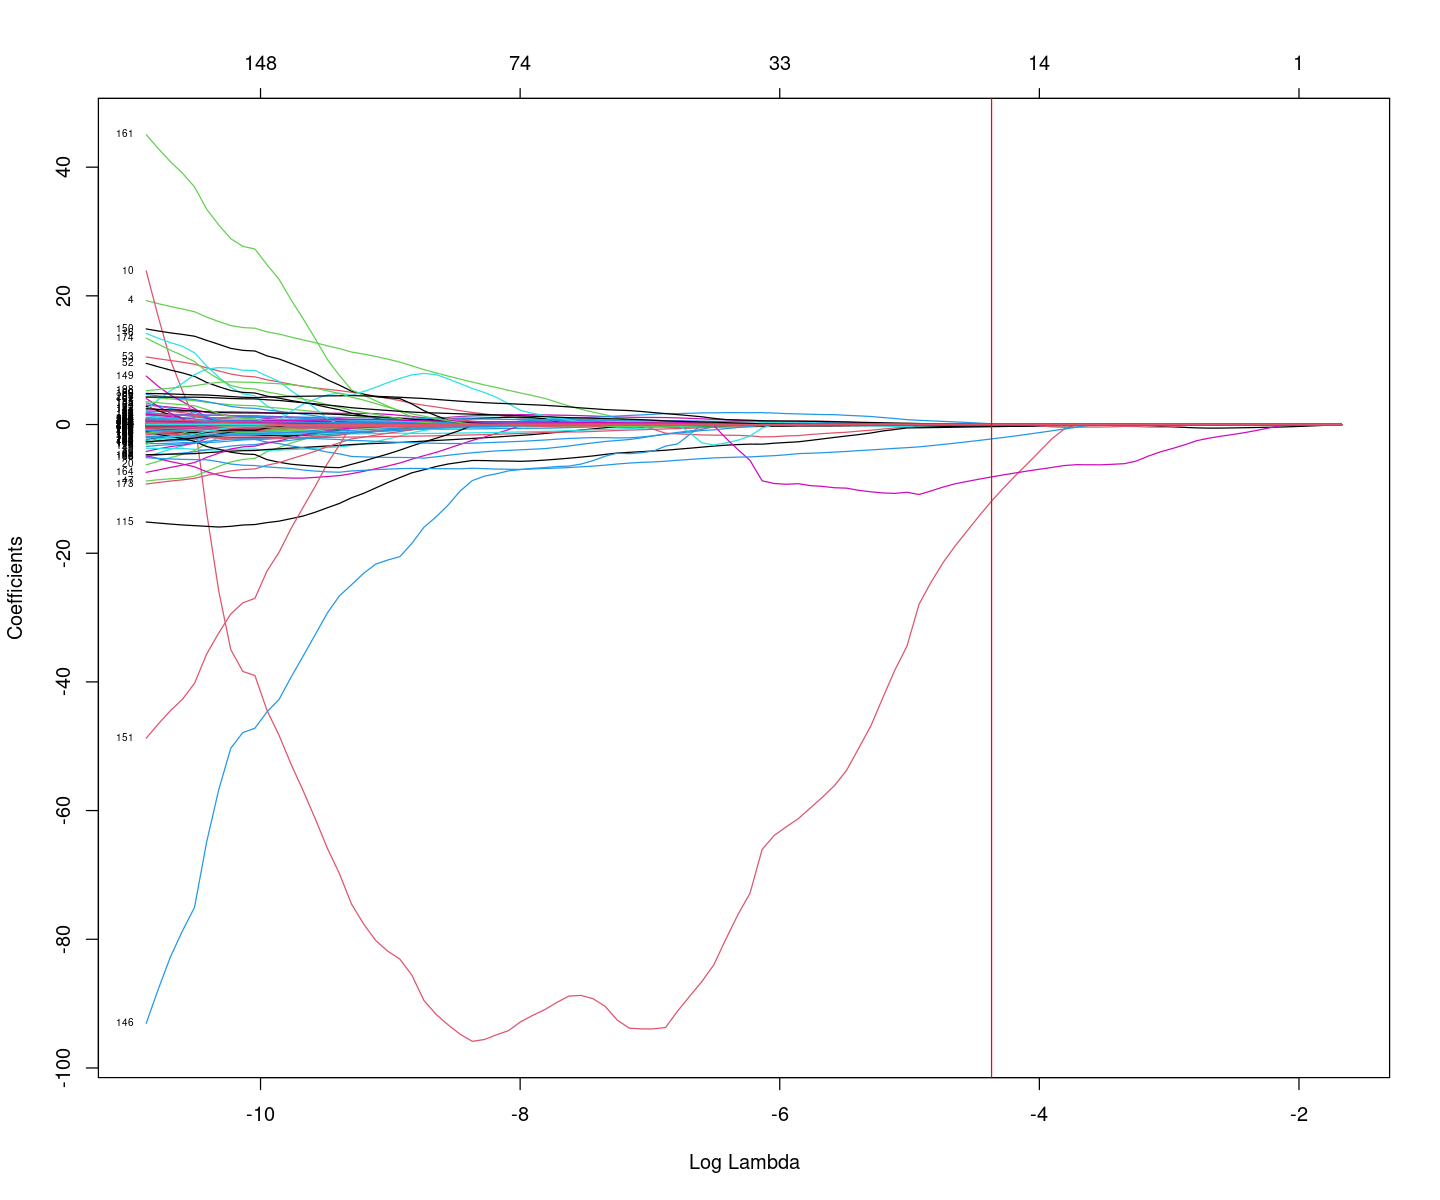

In [55]:
plot(log.lasso, xvar = "lambda", label = TRUE)
abline(v=log(log.lasso.cv$lambda.1se),col="red")

[1] "CV estimate of lambda : 0.0007776314"

212 x 1 sparse Matrix of class "dgCMatrix"
                                  s1
(Intercept)             1.180408e+02
SpMax_L                 .           
J_Dz.e.                 .           
C.                      1.533915e-01
SdssC                   6.573475e-01
HyWi_B.m.               .           
LOC                     .           
SM6_L                   1.134733e+00
F03.C.O.                .           
Me                      .           
Mi                     -9.381668e+01
SpPosA_B.p.             .           
B01.C.Br.0              .           
B01.C.Br.1              .           
B03.C.Cl.1              .           
SpMax_A                 .           
Psi_i_1d                .           
SdO                     .           
TI2_L                   .           
SpMax_B.m.              .           
Psi_i_A                 .           
SM6_B.m.                .           
SpMax_L:J_Dz.e.        -1.951595e-01
SpMax_L:C.              .           
SpMax_L:SdssC           4.694040

ERROR: Error in eval(expr, envir, enclos): objet 'reg.lasso.cv' introuvable


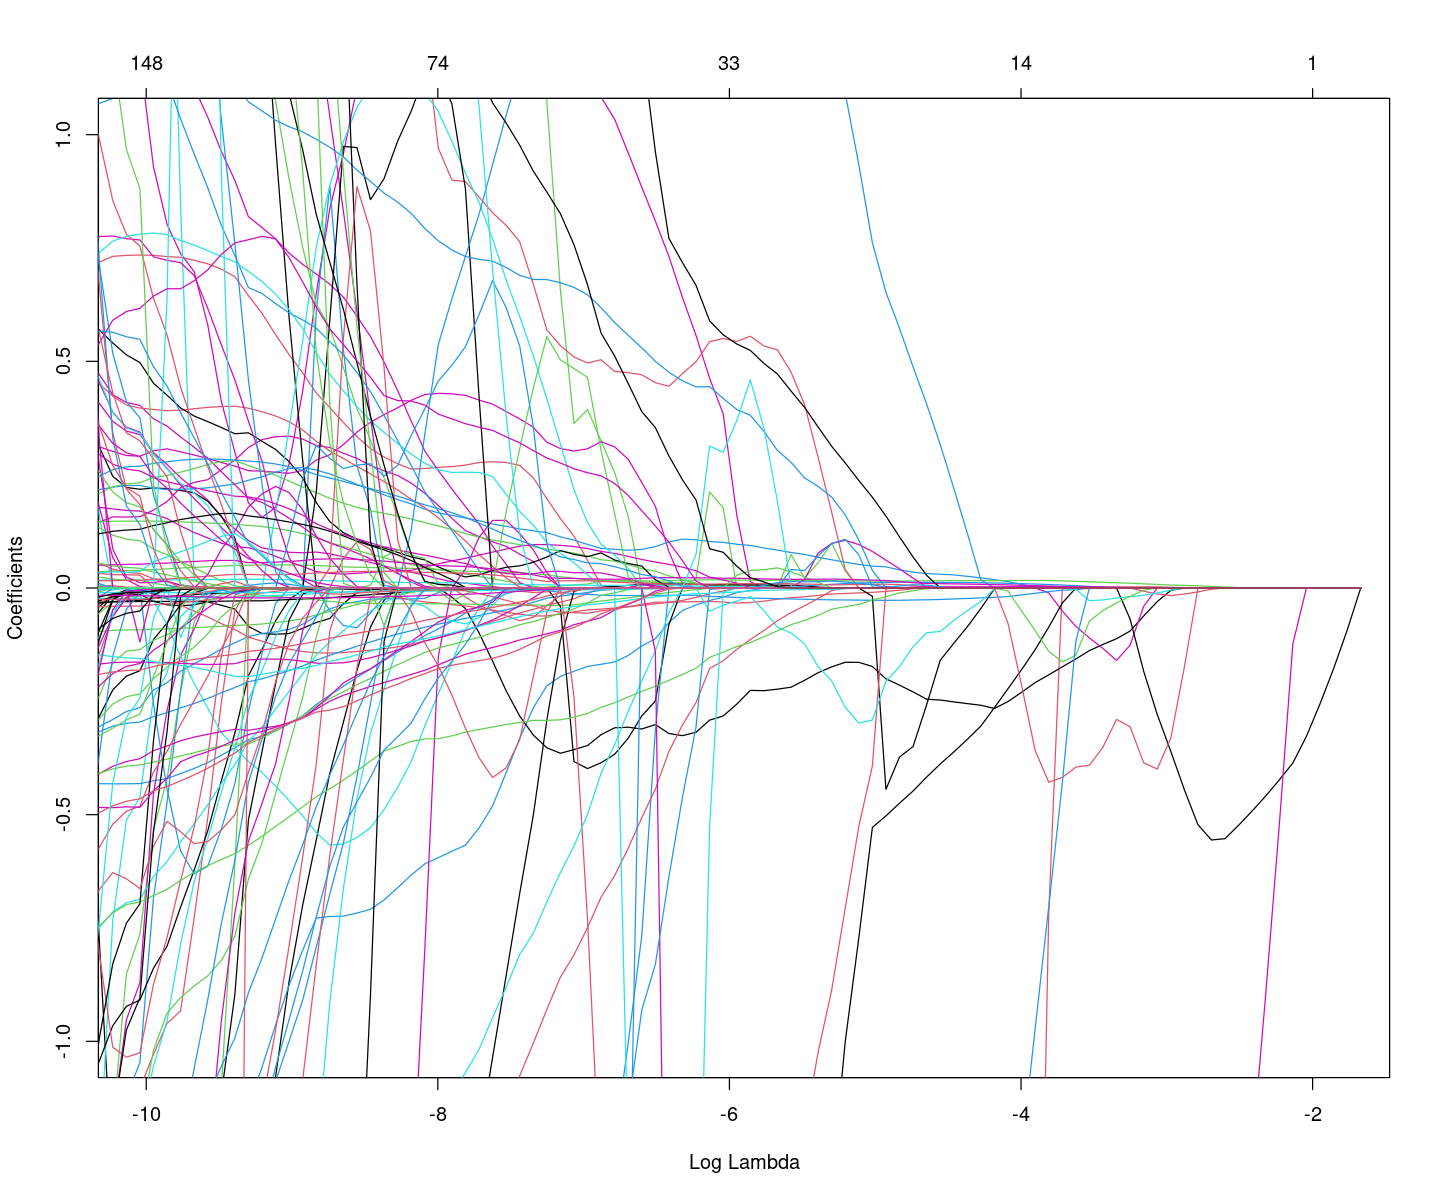

In [56]:
# valeur estimée pour autre lamda
paste("CV estimate of lambda :", round(log.lasso.cv$lambda.min, 10))
# modèle correspondant
coef(log.lasso.cv, s = "lambda.min")

plot(log.lasso, xvar = "lambda", label = TRUE,xlim=c(-10,-1.8),ylim=c(-1,1))
abline(v=log(reg.lasso.cv$lambda.min),col="red")

In [57]:
#Prédiction sur l'échatillon de test
mat.inter2<- model.matrix(Y ~ .^2 - 1, data = datestr)
# Prédiction sur l'ensemble de test, avec lambda.1se
pred.log.lasso.cv.1se <- predict(log.lasso.cv, newx = mat.inter2, s="lambda.1se",type = "response")
# Matrice de confusion pour la prévision 
matconf.lasso.CVlse<-table(pred.log.lasso.cv.1se > 0.5, datestr[,"Y"])
matconf.lasso.CVlse

       
          0   1
  FALSE 141  30
  TRUE   16  24

In [58]:
#Mesure de la performance de cette méthode : 
test_errorlogLASSOCV.lse = Erreur(matconf.lasso.CVlse)
paste("Erreur de généralisation pour le modèle sans interraction et avec sélection de variable : ", test_errorlogLASSOCV.lse, "%")


[1] "Erreur de généralisation pour le modèle sans interraction et avec sélection de variable :  21.8 %"

In [59]:
pred.log.lasso.cv.min <- predict(log.lasso.cv, newx = mat.inter2, s="lambda.min",type = "response")
# Matrice de confusion pour la prévision 
matconf.lasso.CVmin<-table(pred.log.lasso.cv.min > 0.5, datestr[,"Y"])
matconf.lasso.CVmin
test_errorlogLASSOCV.min = Erreur(matconf.lasso.CVmin)
paste("Erreur de généralisation pour le modèle sans interraction et avec sélection de variable : ", test_errorlogLASSOCV.min, "%")

       
          0   1
  FALSE 140  24
  TRUE   17  30

[1] "Erreur de généralisation pour le modèle sans interraction et avec sélection de variable :  19.43 %"

In [60]:
#pred.log.lasso.min <- predict(log.lasso, newx = mat.inter2, s="lambda.min",type = "response")
# Matrice de confusion pour la prévision 
#matconf.lasso.min<-table(pred.log.lasso.cv.min > 0.5, datestr[,"Y"])
#matconf.lasso.min
#test_errorlogLASSO.min = Erreur(matconf.lasso.min)
#paste("Erreur de généralisation pour le modèle sans interraction et avec sélection de variable : ", test_errorlogLASSO.min, "%")

ERROR: Error in lambda[1] - s: argument non numérique pour un opérateur binaire


### Courbes ROC

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(datappr$Y, log.lasso.cv_predmin):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(datappr$Y, log.lasso.cv_predlse):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



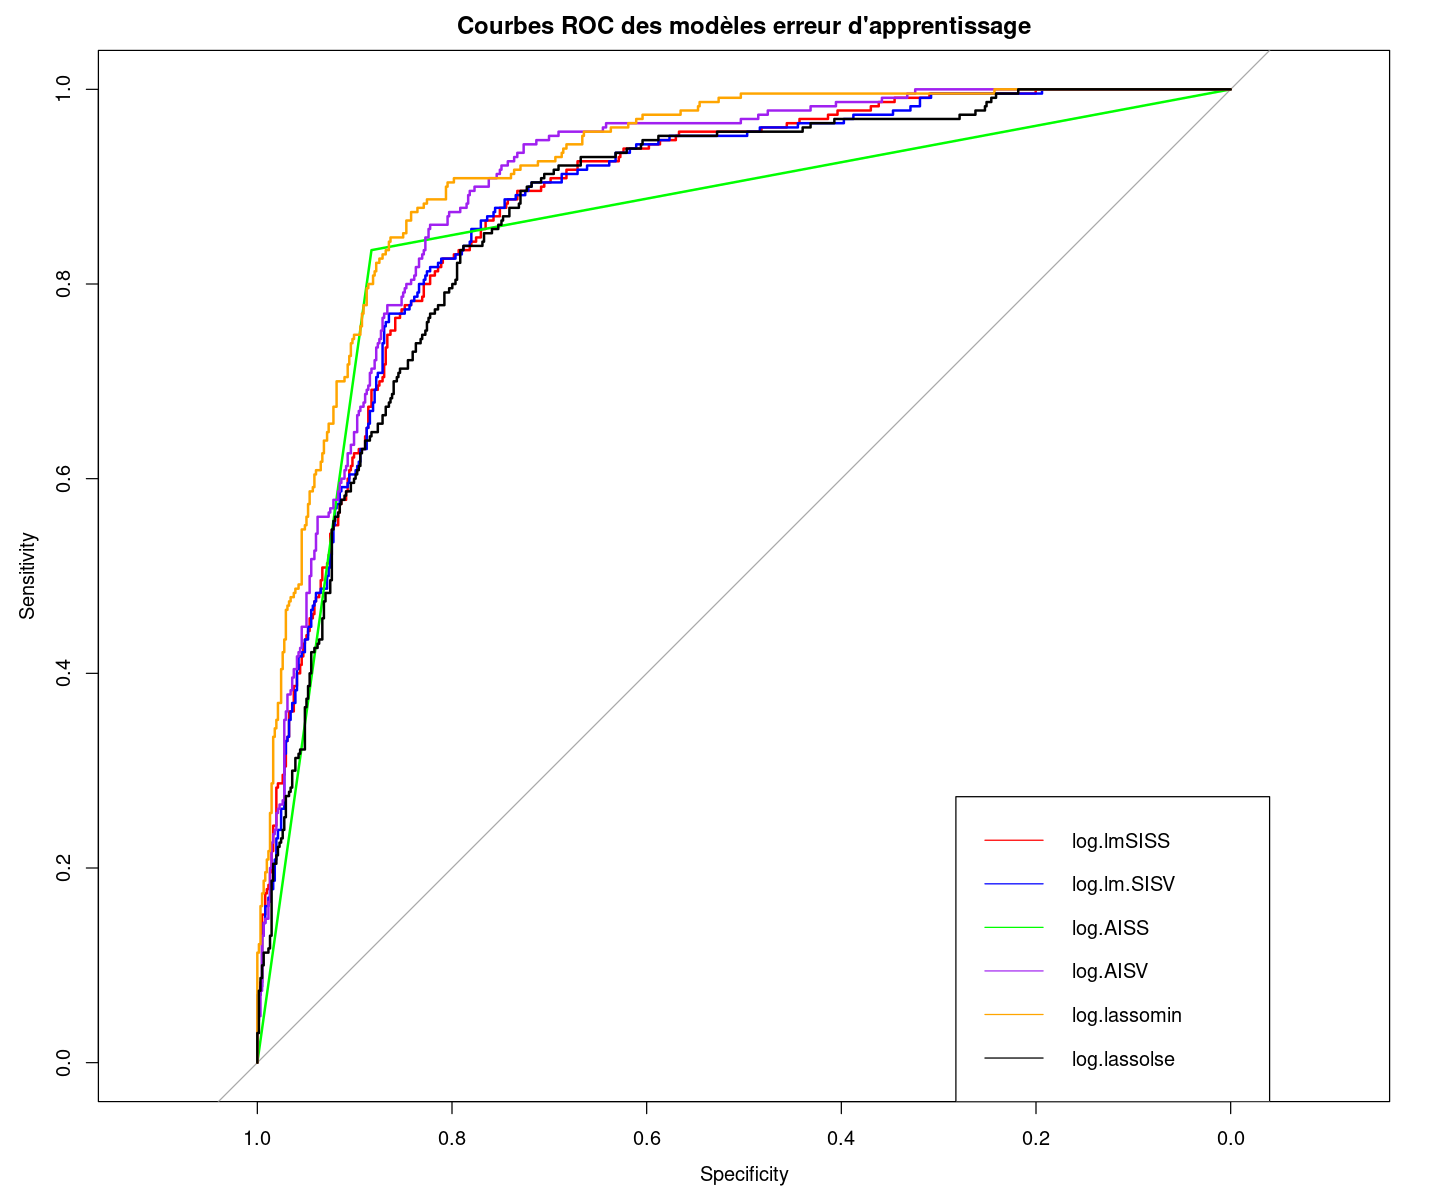

In [61]:
library(pROC)

log.lmSISS_pred <- predict(log.lmSISS, type = "response")
roc_log.lmSISS <- roc(datappr$Y, log.lmSISS_pred)

log.lm.SISV_pred <- predict(log.lm.SISV, type = "response")
roc_log.lm.SISV <- roc(datappr$Y, log.lm.SISV_pred)

log.AISS_pred <- predict(log.AISS, type = "response")
roc_log.AISS <- roc(datappr$Y, log.AISS_pred)

log.AISV_pred <- predict(log.AISV, type = "response")
roc_log.AISV <- roc(datappr$Y, log.AISV_pred)


log.lasso.cv_predmin <- predict(log.lasso.cv, newx = mat.inter, type = "response",s="lambda.min")
roc_log.lasso.cvmin <- roc(datappr$Y, log.lasso.cv_predmin)

log.lasso.cv_predlse <- predict(log.lasso.cv, newx = mat.inter, type = "response",s="lambda.1se")
roc_log.lasso.cvlse <- roc(datappr$Y, log.lasso.cv_predlse)

plot(roc_log.lmSISS, col = "red", main = "Courbes ROC des modèles erreur d'apprentissage")
plot(roc_log.lm.SISV, col = "blue", add = TRUE)
plot(roc_log.AISS, col = "green", add = TRUE)
plot(roc_log.AISV, col = "purple", add = TRUE)
plot(roc_log.lasso.cvmin, col = "orange", add = TRUE)
plot(roc_log.lasso.cvlse, col = "black", add = TRUE)
legend("bottomright", legend = c("log.lmSISS", "log.lm.SISV", "log.AISS", "log.AISV", "log.lassomin", "log.lassolse"),
       col = c("red", "blue", "green", "purple", "orange", "black"), lwd = 1)



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(datestr$Y, pred.log.lasso.cv.min):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(datestr$Y, pred.log.lasso.cv.1se):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



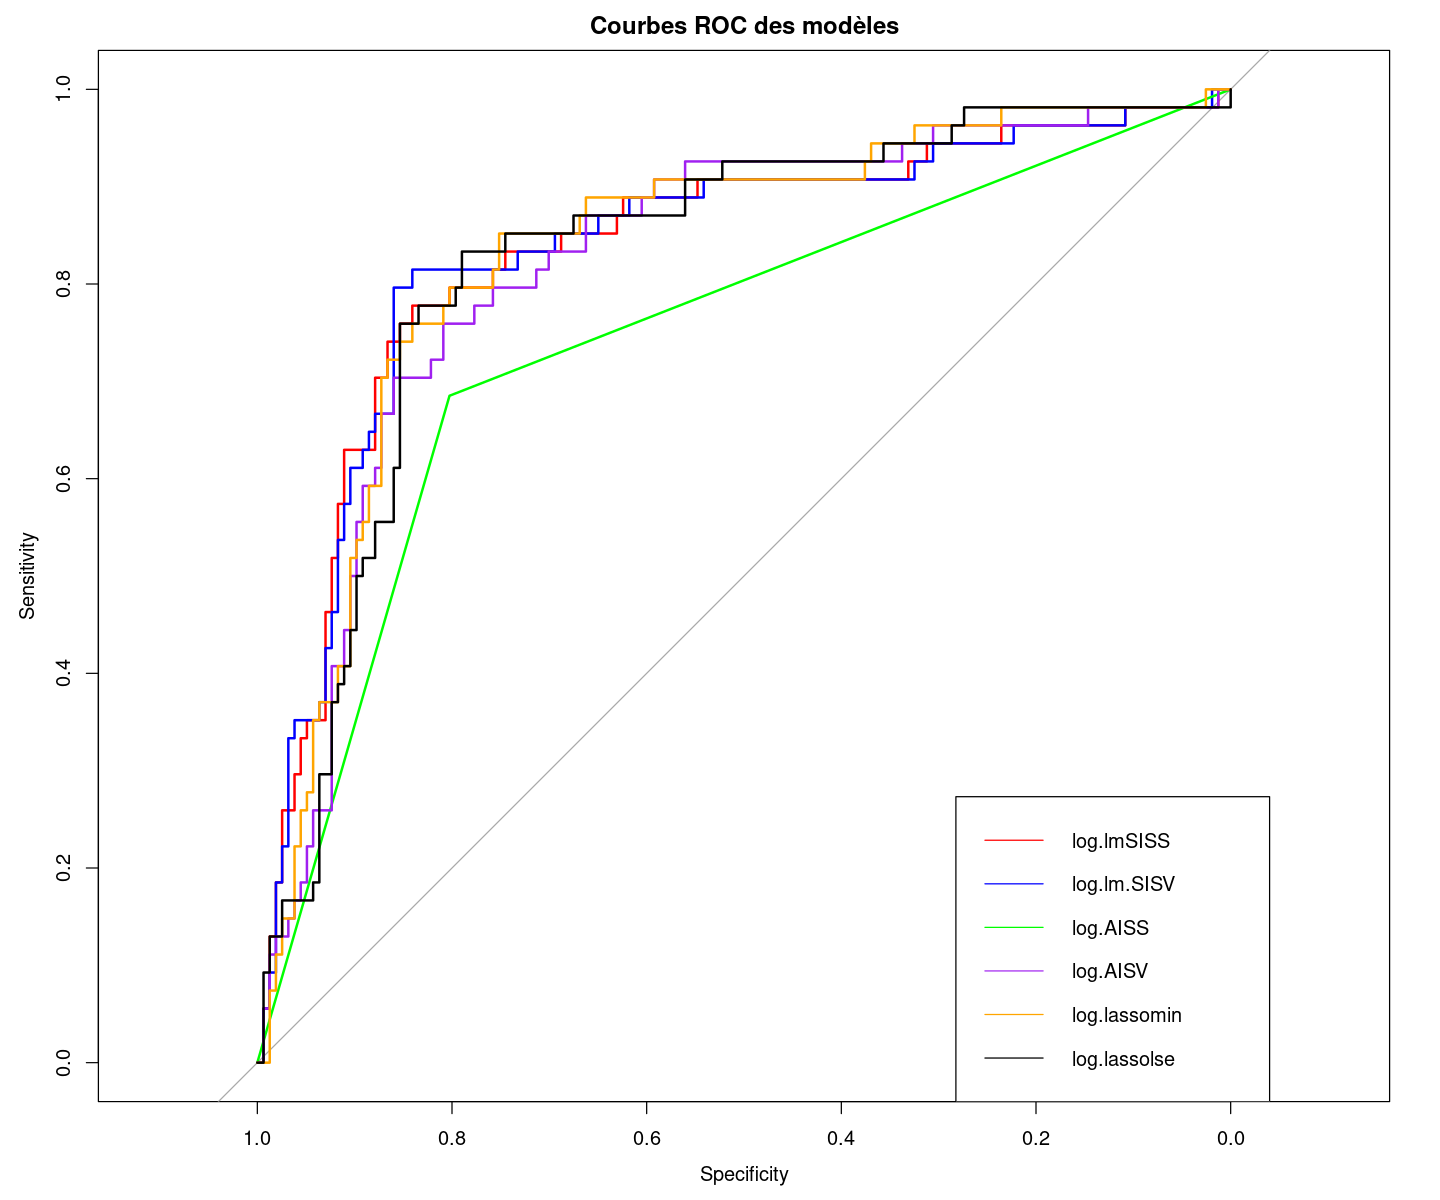

In [62]:
library(pROC)

roc_log.lmSISS <- roc(datestr$Y, pred.log.SISS)

roc_log.lm.SISV <- roc(datestr$Y, pred.log.SISV)

roc_log.AISS <- roc(datestr$Y, pred.log.AISS)

roc_log.AISV <- roc(datestr$Y, pred.log.AISV)


roc_log.lasso.cvmin <- roc(datestr$Y, pred.log.lasso.cv.min)

roc_log.lasso.cvlse <- roc(datestr$Y, pred.log.lasso.cv.1se)

plot(roc_log.lmSISS, col = "red", main = "Courbes ROC des modèles")
plot(roc_log.lm.SISV, col = "blue", add = TRUE)
plot(roc_log.AISS, col = "green", add = TRUE)
plot(roc_log.AISV, col = "purple", add = TRUE)
plot(roc_log.lasso.cvmin, col = "orange", add = TRUE)
plot(roc_log.lasso.cvlse, col = "black", add = TRUE)
legend("bottomright", legend = c("log.lmSISS", "log.lm.SISV", "log.AISS", "log.AISV", "log.lassomin", "log.lassolse"),
       col = c("red", "blue", "green", "purple", "orange", "black"), lwd = 1)



## Support vector machine

### SVM linéaire

In [136]:
library(e1071)

In [137]:
#On calcule le SVM avec 19 folds de cross validation
SVM.lin = svm(Y ~ ., data = datappr, kernel = "lin", cross = 10)
summary(SVM.lin)


Call:
svm(formula = Y ~ ., data = datappr, kernel = "lin", cross = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  365

 ( 179 186 )


Number of Classes:  2 

Levels: 
 0 1

10-fold cross-validation on training data:

Total Accuracy: 81.27962 
Single Accuracies:
 79.7619 82.14286 84.70588 80.95238 81.17647 82.14286 86.90476 82.35294 72.61905 80 




In [138]:
training_errorSVMlin <-100 - SVM.lin$tot.accuracy
paste("Erreur d'apprentissage pour le SVM linéaire : ", training_errorSVMlin, "%")
predictionsSVMlin <- predict(SVM.lin, newdata = datestr)
mat.SVMlin=confusionMatrix(predictionsSVMlin,datestr[,"Y"])$table
colnames(mat.SVMlin)=c("Non biodégradable","Biodégradable")
rownames(mat.SVMlin)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.SVMlin
test_errorSVMlin = Erreur(mat.SVMlin)
paste("Erreur d'e généralisation pour le SVM linéaire : ", test_errorSVMlin, "%")

[1] "Erreur d'apprentissage pour le SVM linéaire :  18.7203791469194 %"

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               143            26
   Prédiction biodégradable                    14            28

[1] "Erreur d'e généralisation pour le SVM linéaire :  18.96 %"

On va essayer d'améliorer nos résultats en modifiant le cost
Le paramètre de coût (cost) contrôle la tolérance du modèle aux erreurs de classification sur les données d'apprentissage. 
Plus la valeur de cost est élevée, plus le modèle SVM tentera de classifier correctement tous les points d'apprentissage, 
ce qui peut conduire à un modèle avec une frontière de décision plus complexe.

In [139]:
SVMlin.tuned = tune.svm(Y ~ ., data = datappr, kernel="lin",cost = c(1, 1.5, 2, 2.5, 3, 3.5,4,5),gamma=seq(0.1,0.3,by=0.02))
summary(SVMlin.tuned)
#Le meilleur cost est 1, on pénalisera donc peu les individus mal classés


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1  3.5

- best performance: 0.1812885 

- Detailed performance results:
   gamma cost     error dispersion
1   0.10  1.0 0.1848459 0.04543699
2   0.12  1.0 0.1848459 0.04543699
3   0.14  1.0 0.1848459 0.04543699
4   0.16  1.0 0.1848459 0.04543699
5   0.18  1.0 0.1848459 0.04543699
6   0.20  1.0 0.1848459 0.04543699
7   0.22  1.0 0.1848459 0.04543699
8   0.24  1.0 0.1848459 0.04543699
9   0.26  1.0 0.1848459 0.04543699
10  0.28  1.0 0.1848459 0.04543699
11  0.30  1.0 0.1848459 0.04543699
12  0.10  1.5 0.1836555 0.04577435
13  0.12  1.5 0.1836555 0.04577435
14  0.14  1.5 0.1836555 0.04577435
15  0.16  1.5 0.1836555 0.04577435
16  0.18  1.5 0.1836555 0.04577435
17  0.20  1.5 0.1836555 0.04577435
18  0.22  1.5 0.1836555 0.04577435
19  0.24  1.5 0.1836555 0.04577435
20  0.26  1.5 0.1836555 0.04577435
21  0.28  1.5 0.1836555 0.04577435
22  0.30  1.5 0.1836555 0.04577435
23  0.10  2.

Warning message in title(...):
“"data" n'est pas un paramètre graphique”


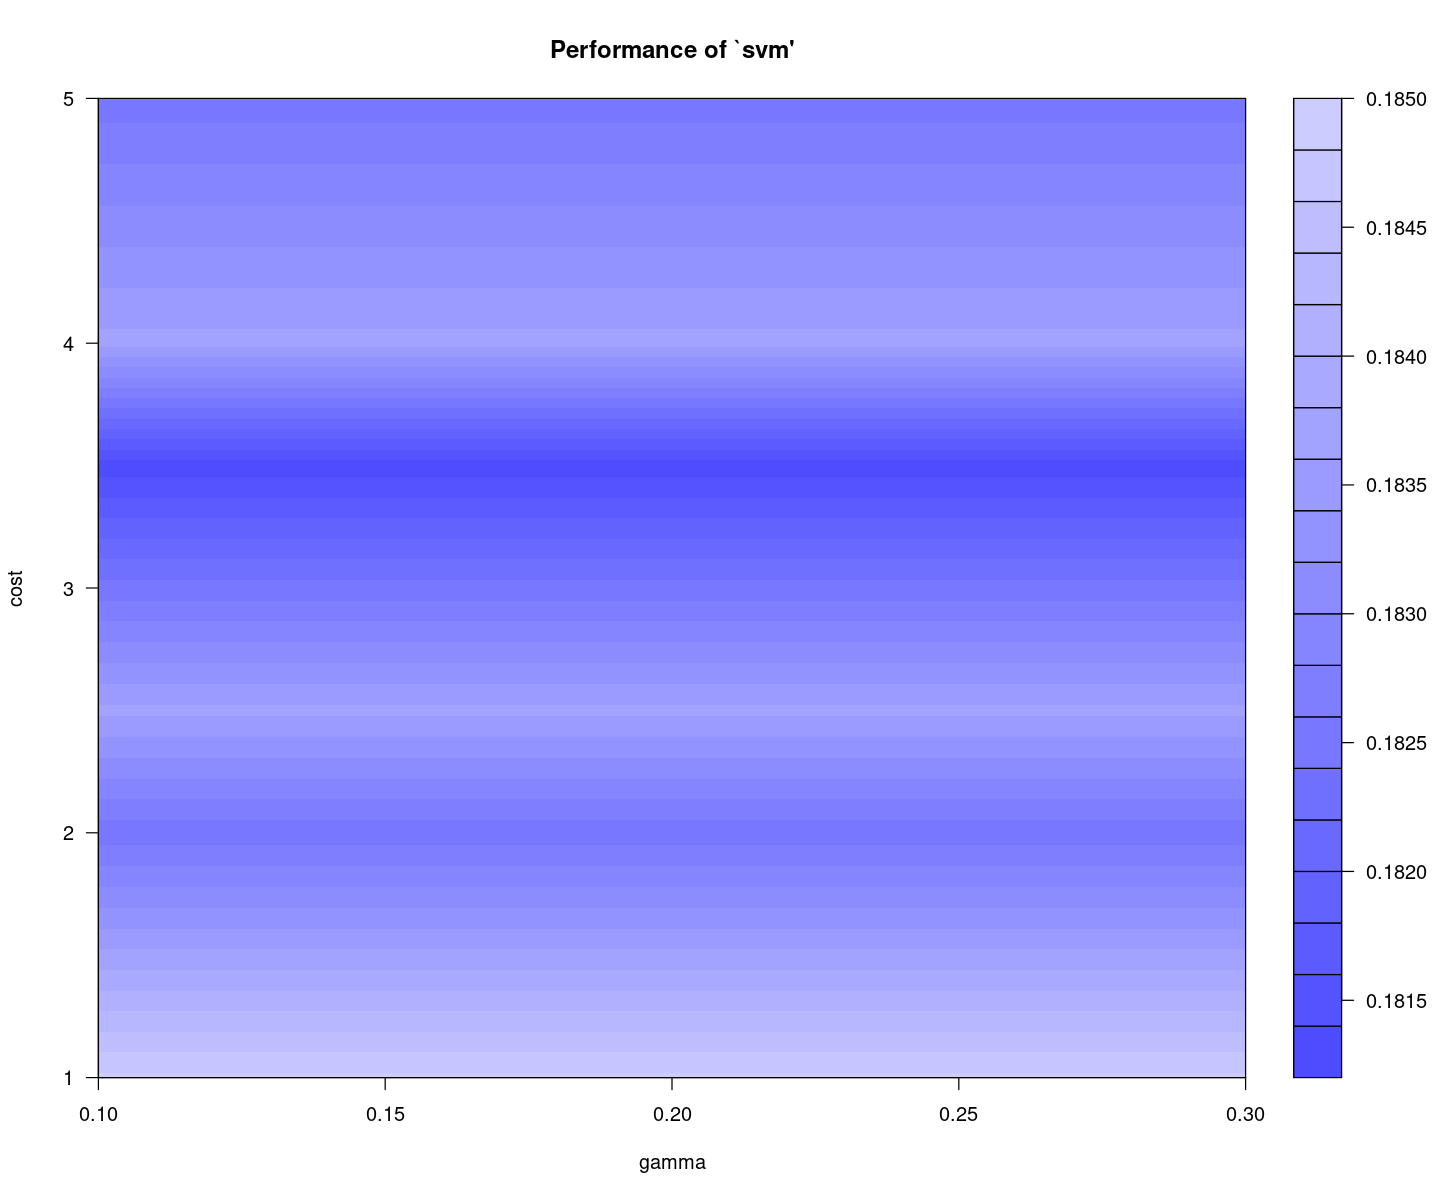

In [140]:
plot(SVMlin.tuned, data = datappr)

In [141]:
bestSVMlin=svm(Y ~ ., data = datappr, kernel = "lin", cross = 10,cost=SVMlin.tuned$best.parameters$cost,gamma=SVMlin.tuned$best.parameters$gamma)


In [142]:
training_errorSVMlinOpt <-100 - bestSVMlin$tot.accuracy
paste("Erreur d'apprentissage pour le SVM linéaire optimisé : ", training_errorSVMlinOpt, "%")
predictionsSVMlinOpt <- predict(bestSVMlin, newdata = datestr)
mat.SVMlinOpt=confusionMatrix(predictionsSVMlinOpt,datestr[,"Y"])$table
colnames(mat.SVMlinOpt)=c("Non biodégradable","Biodégradable")
rownames(mat.SVMlinOpt)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.SVMlinOpt
test_errorSVMlinOpt = Erreur(mat.SVMlinOpt)
paste("Erreur de généralisation pour le SVM linéaire optimisé : ", test_errorSVMlinOpt, "%")

[1] "Erreur d'apprentissage pour le SVM linéaire optimisé :  18.8388625592417 %"

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               143            27
   Prédiction biodégradable                    14            27

[1] "Erreur de généralisation pour le SVM linéaire optimisé :  19.43 %"

L'erreur d'apprentissage entre le modèle de base et le modèle optimisé est très légèrement réduite mais pas l'erreur de généralisation

### SVM à noyau polynomial

In [143]:
#On calcule le SVM à noyau polynomial avec 10 folds de cross validation
SVM.pol = svm(Y ~ ., data = datappr, kernel = "poly", cross = 10)
summary(SVM.pol)


Call:
svm(formula = Y ~ ., data = datappr, kernel = "poly", cross = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  435

 ( 204 231 )


Number of Classes:  2 

Levels: 
 0 1

10-fold cross-validation on training data:

Total Accuracy: 75.94787 
Single Accuracies:
 77.38095 84.52381 76.47059 82.14286 84.70588 67.85714 75 71.76471 75 64.70588 




In [144]:
training_errorSVMpol <-100 - SVM.pol$tot.accuracy
paste("Erreur d'apprentissage pour le SVM polynomial : ", training_errorSVMpol, "%")
predictionsSVMpol <- predict(SVM.pol, newdata = datestr)
mat.SVMpol=confusionMatrix(predictionsSVMpol,datestr[,"Y"])$table
colnames(mat.SVMpol)=c("Non biodégradable","Biodégradable")
rownames(mat.SVMpol)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.SVMpol
test_errorSVMpol = Erreur(mat.SVMpol)
paste("Erreur de généralisation pour le SVM polynomial: ", test_errorSVMpol, "%")

[1] "Erreur d'apprentissage pour le SVM polynomial :  24.0521327014218 %"

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               151            49
   Prédiction biodégradable                     6             5

[1] "Erreur de généralisation pour le SVM polynomial:  26.07 %"

On observe ici de bien moins bon résultats que pour le noyau polynomial, l'erreur de généralisation est de 26% mais notre algo détecte une proportion très faible de vrais positifs

In [145]:
SVMpol.tuned = tune.svm(Y ~ ., data = datappr, kernel="poly",cost = c(1, 1.5, 2, 2.5, 3, 3.5,4,5),gamma=seq(0.1,0.3,by=0.02))
summary(SVMpol.tuned)
#Le meilleur cost est 5, on pénalisera donc peu les individus mal classés


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.12    2

- best performance: 0.2002101 

- Detailed performance results:
   gamma cost     error dispersion
1   0.10  1.0 0.2179692 0.02938256
2   0.12  1.0 0.2132493 0.03295940
3   0.14  1.0 0.2120588 0.02858763
4   0.16  1.0 0.2049020 0.02496963
5   0.18  1.0 0.2108683 0.02762756
6   0.20  1.0 0.2120448 0.02956262
7   0.22  1.0 0.2108543 0.02801364
8   0.24  1.0 0.2108403 0.03109119
9   0.26  1.0 0.2108403 0.02724922
10  0.28  1.0 0.2120308 0.02712538
11  0.30  1.0 0.2132353 0.02645615
12  0.10  1.5 0.2120728 0.02641151
13  0.12  1.5 0.2132493 0.02946309
14  0.14  1.5 0.2060784 0.02677275
15  0.16  1.5 0.2120448 0.02846443
16  0.18  1.5 0.2096779 0.02770699
17  0.20  1.5 0.2132073 0.02742040
18  0.22  1.5 0.2096499 0.03106589
19  0.24  1.5 0.2120308 0.02712538
20  0.26  1.5 0.2132353 0.02645615
21  0.28  1.5 0.2203641 0.02305615
22  0.30  1.5 0.2239356 0.02471630
23  0.10  2.

Warning message in title(...):
“"data" n'est pas un paramètre graphique”


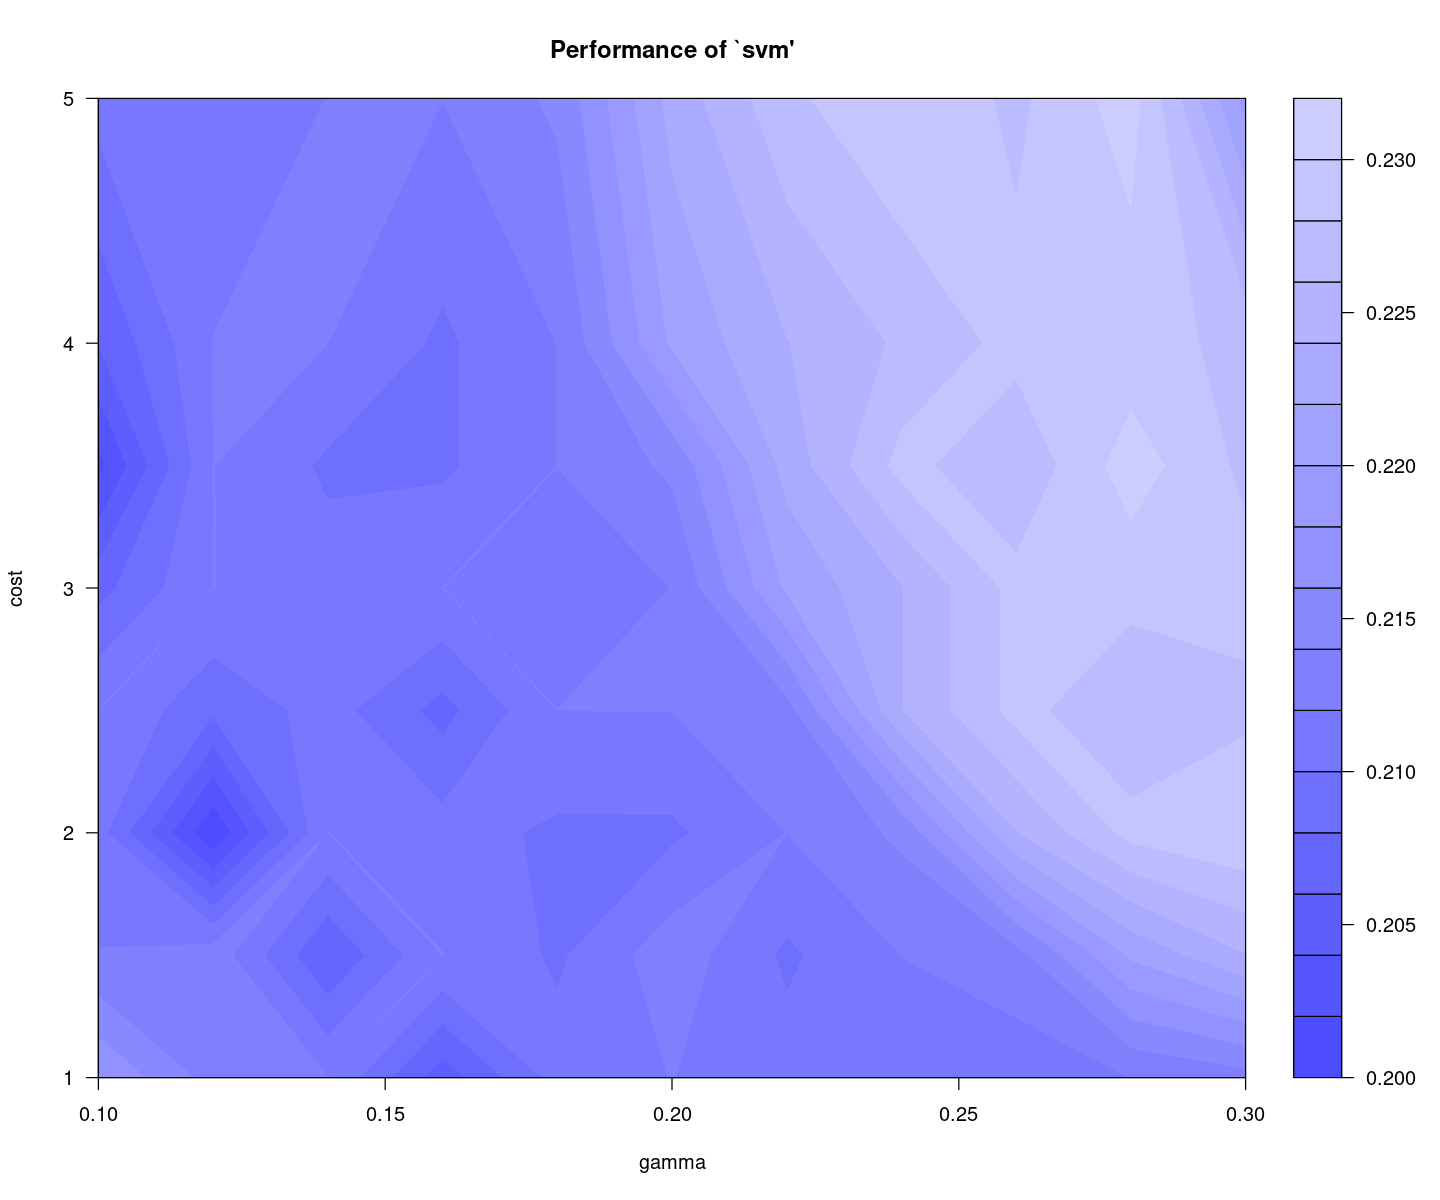

In [146]:
plot(SVMpol.tuned, data = datappr)

In [147]:
bestSVMpol=svm(Y ~ ., data = datappr, kernel = "poly", cross = 10,cost=SVMpol.tuned$best.parameters$cost,gamma=SVMpol.tuned$best.parameters$gamma)


In [148]:
training_errorSVMpolOpt <-100 - bestSVMpol$tot.accuracy
paste("Erreur d'apprentissage pour le SVM polOptynomial : ", training_errorSVMpolOpt, "%")
predictionsSVMpolOpt <- predict(bestSVMpol, newdata = datestr)
mat.SVMpolOpt=confusionMatrix(predictionsSVMpolOpt,datestr[,"Y"])$table
colnames(mat.SVMpolOpt)=c("Non biodégradable","Biodégradable")
rownames(mat.SVMpolOpt)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.SVMpolOpt
test_errorSVMpolOpt = Erreur(mat.SVMpolOpt)
paste("Erreur de généralisation pour le SVM polOptynomial: ", test_errorSVMpolOpt, "%")

[1] "Erreur d'apprentissage pour le SVM polOptynomial :  20.6161137440758 %"

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               139            29
   Prédiction biodégradable                    18            25

[1] "Erreur de généralisation pour le SVM polOptynomial:  22.27 %"

dg

### SVM à noyau gaussien

In [149]:
#On calcule le SVM à noyau radial (gaussien) avec 10 folds de cross validation
SVM.rad = svm(Y ~ ., data = datappr, kernel = "radial", cross = 10)
summary(SVM.rad)


Call:
svm(formula = Y ~ ., data = datappr, kernel = "radial", cross = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  423

 ( 203 220 )


Number of Classes:  2 

Levels: 
 0 1

10-fold cross-validation on training data:

Total Accuracy: 81.3981 
Single Accuracies:
 85.71429 83.33333 78.82353 85.71429 76.47059 84.52381 80.95238 80 77.38095 81.17647 




In [150]:
training_errorSVMrad <-100 - SVM.rad$tot.accuracy
paste("Erreur d'apprentissage pour le SVM radynomial : ", training_errorSVMrad, "%")
predictionsSVMrad <- predict(SVM.rad, newdata = datestr)
mat.SVMrad=confusionMatrix(predictionsSVMrad,datestr[,"Y"])$table
colnames(mat.SVMrad)=c("Non biodégradable","Biodégradable")
rownames(mat.SVMrad)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.SVMrad
test_errorSVMrad = Erreur(mat.SVMrad)
paste("Erreur de généralisation pour le SVM radynomial: ", test_errorSVMrad, "%")

[1] "Erreur d'apprentissage pour le SVM radynomial :  18.6018957345972 %"

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               144            31
   Prédiction biodégradable                    13            23

[1] "Erreur de généralisation pour le SVM radynomial:  20.85 %"

On obtient de moins bons résultats avec le noyau gaussien non optimisé par rapport au noyau polynomial en terme d'erreur de généralisation, cependant l'erreur d'apprentissage est moins élevée. Essayons maintenant de l'optimiser

In [151]:
SVMrad.tuned = tune.svm(Y ~ ., data = datappr, kernel="radial",cost = c(1, 1.5, 2, 2.5, 3, 3.5,4,5),gamma=seq(0.1,0.3,by=0.02))
summary(SVMrad.tuned)
#Le meilleur cost est 3.5, on pénalisera donc peu les individus mal classés


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1  2.5

- best performance: 0.1801821 

- Detailed performance results:
   gamma cost     error dispersion
1   0.10  1.0 0.1814286 0.04212369
2   0.12  1.0 0.1837675 0.03777363
3   0.14  1.0 0.1814146 0.03817560
4   0.16  1.0 0.1825770 0.03731641
5   0.18  1.0 0.1825770 0.03932304
6   0.20  1.0 0.1873249 0.04154299
7   0.22  1.0 0.1861625 0.04248714
8   0.24  1.0 0.1826190 0.04366073
9   0.26  1.0 0.1861905 0.04330947
10  0.28  1.0 0.1897339 0.03991785
11  0.30  1.0 0.1897339 0.03991785
12  0.10  1.5 0.1849440 0.03733364
13  0.12  1.5 0.1825630 0.03969562
14  0.14  1.5 0.1861485 0.04052236
15  0.16  1.5 0.1825770 0.03468160
16  0.18  1.5 0.1825770 0.03598729
17  0.20  1.5 0.1849580 0.04132521
18  0.22  1.5 0.1861345 0.04008931
19  0.24  1.5 0.1885154 0.03870206
20  0.26  1.5 0.1908824 0.04066840
21  0.28  1.5 0.1944538 0.04327503
22  0.30  1.5 0.1968207 0.04433205
23  0.10  2.

Warning message in title(...):
“"data" n'est pas un paramètre graphique”


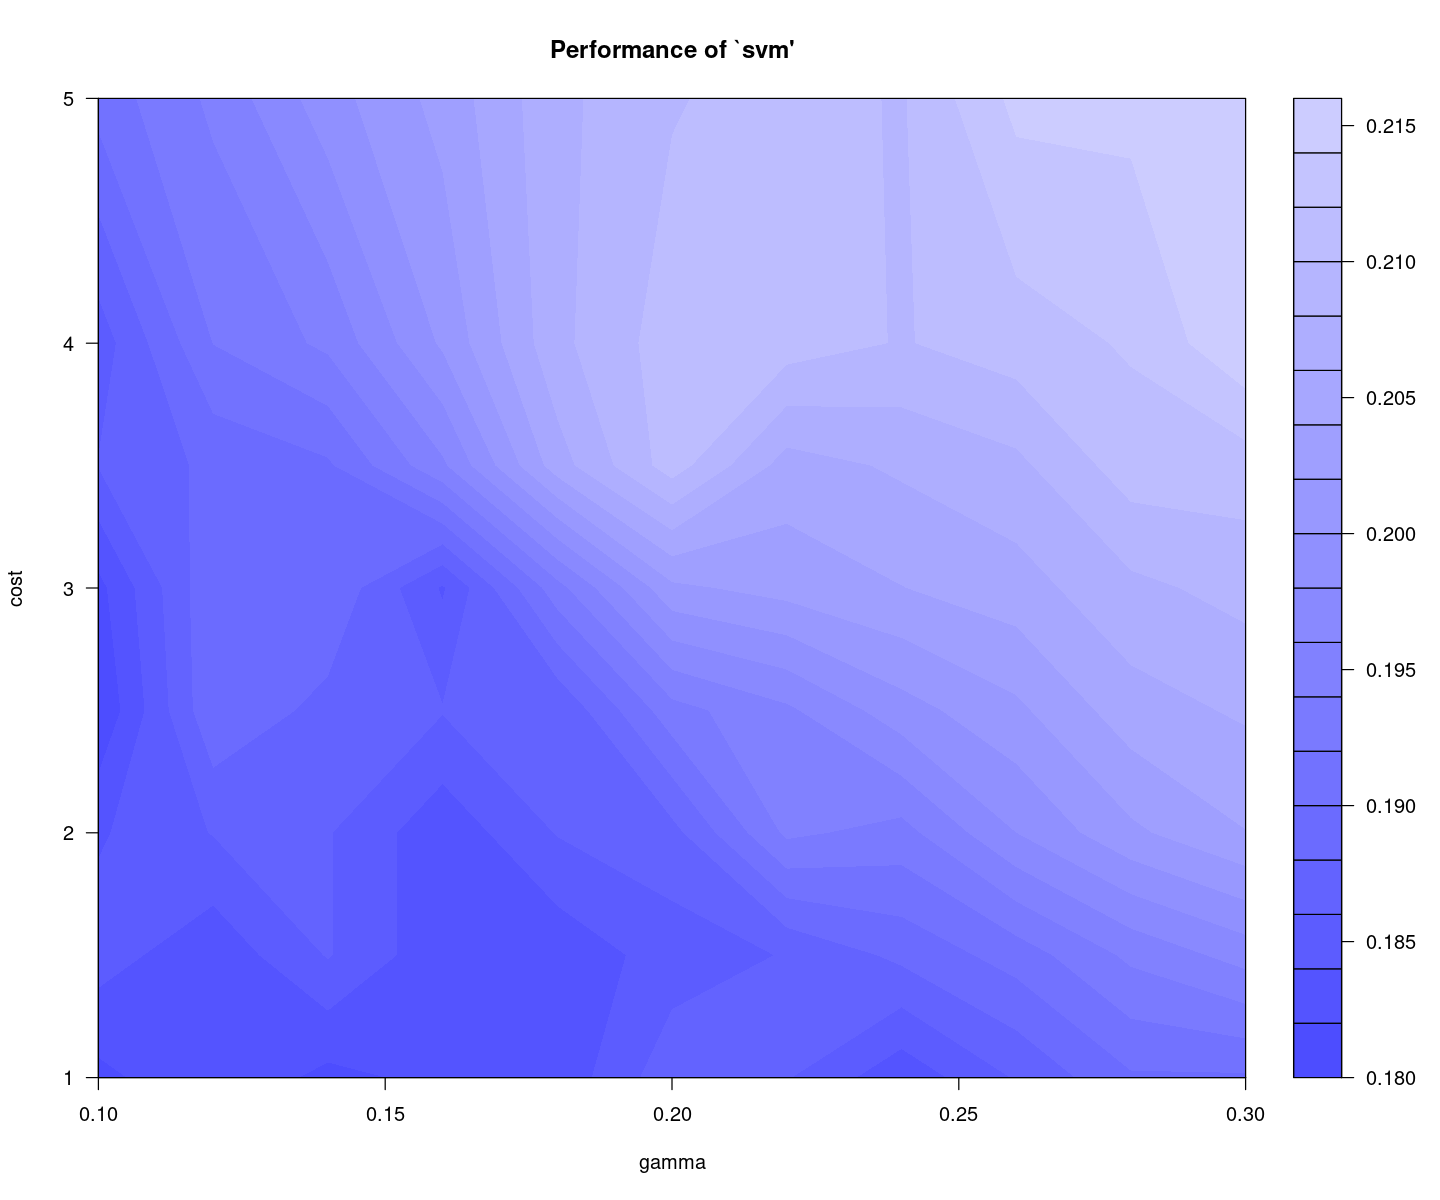

In [152]:
plot(SVMrad.tuned, data = datappr)

In [153]:
bestSVMrad=svm(Y ~ ., data = datappr, kernel = "radial", cross = 10,cost=SVMpol.tuned$best.parameters$cost,gamma=SVMpol.tuned$best.parameters$gamma)


In [154]:
training_errorSVMradOpt <-100 - bestSVMrad$tot.accuracy
paste("Erreur d'apprentissage pour le SVM radOptynomial : ", training_errorSVMradOpt, "%")
predictionsSVMradOpt <- predict(bestSVMrad, newdata = datestr)
mat.SVMradOpt=confusionMatrix(predictionsSVMradOpt,datestr[,"Y"])$table
colnames(mat.SVMradOpt)=c("Non biodégradable","Biodégradable")
rownames(mat.SVMradOpt)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.SVMradOpt
test_errorSVMradOpt = Erreur(mat.SVMradOpt)
paste("Erreur de généralisation pour le SVM radOptynomial: ", test_errorSVMradOpt, "%")

[1] "Erreur d'apprentissage pour le SVM radOptynomial :  18.1279620853081 %"

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               140            23
   Prédiction biodégradable                    17            31

[1] "Erreur de généralisation pour le SVM radOptynomial:  18.96 %"

Les résultats ne sont pas meilleurs avec le modèle optimisé, l'erreur d'apprentissage est plus faible mais l'erreur de généralisation augmente légèrement.

Ainsi le meilleur noyau est le noyau polynomial

### Courbes ROC

In [79]:
?performance

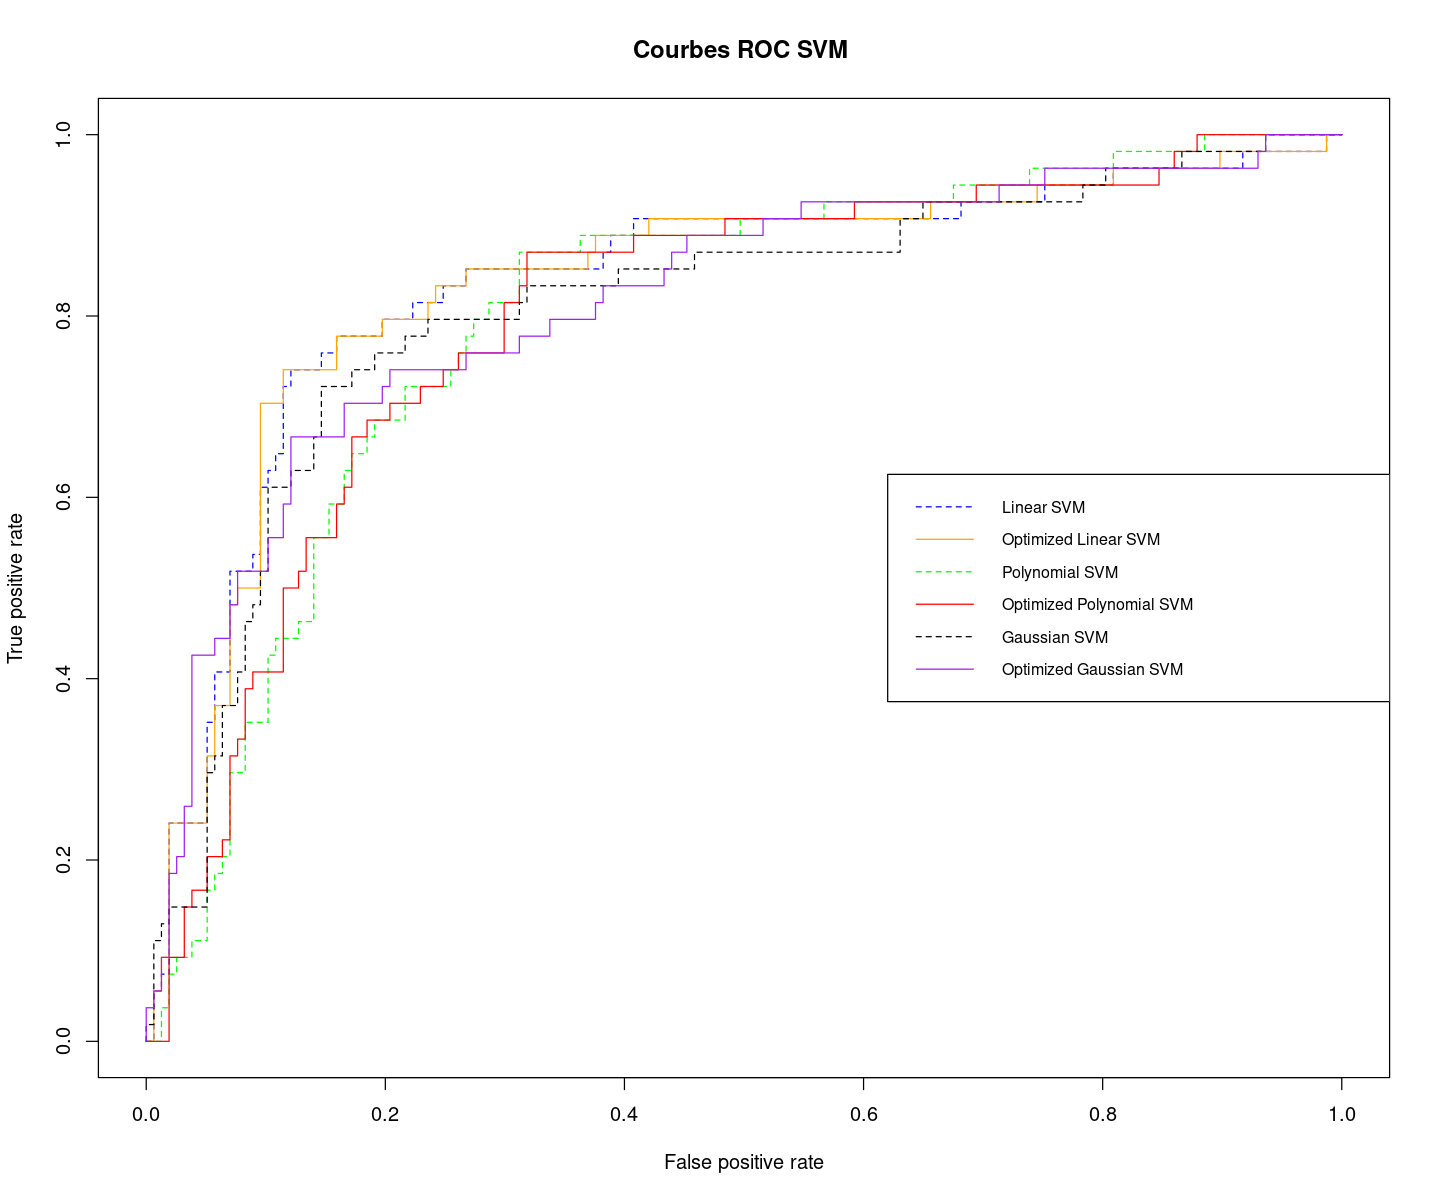

In [155]:
#On refait les modèles mais avec l'argument probability=True pour pouvoir afficher les courbes ROC
SVM.lin2 = svm(Y ~ ., data = datappr, kernel = "lin", cross = 10,probability=TRUE)
predictionsSVMlin2 <- predict(SVM.lin2, newdata = datestr,probability=TRUE)
#On extrait les probabilités d'appartenir à chaque classe grâce à la fonction attributes
rocsvmlin = attributes(predictionsSVMlin2)$probabilities[, 1]
predsvmlin = prediction(rocsvmlin, datestr$Y)
perfsvmlin = performance(predsvmlin, "tpr", "fpr")

bestSVMlin2=svm(Y ~ ., data = datappr, kernel = "lin", cross = 10,cost=SVMlin.tuned$best.parameters$cost,gamma=SVMlin.tuned$best.parameters$gamma,probability=TRUE)
predictionsSVMlinOpt2 <- predict(bestSVMlin2, newdata = datestr,probability=TRUE)
rocsvmlinOpt = attributes(predictionsSVMlinOpt2)$probabilities[, 1]
predsvmlinOpt = prediction(rocsvmlinOpt, datestr$Y)
perfsvmlinOpt = performance(predsvmlinOpt, "tpr", "fpr")

SVM.pol2 = svm(Y ~ ., data = datappr, kernel = "pol", cross = 10,probability=TRUE)
predictionsSVMpol2 <- predict(SVM.pol2, newdata = datestr,probability=TRUE)
rocsvmpol = attributes(predictionsSVMpol2)$probabilities[, 1]
predsvmpol = prediction(rocsvmpol, datestr$Y)
perfsvmpol = performance(predsvmpol, "tpr", "fpr")

bestSVMpol2=svm(Y ~ ., data = datappr, kernel = "pol", cross = 10,cost=SVMpol.tuned$best.parameters$cost,gamma=SVMpol.tuned$best.parameters$gamma,probability=TRUE)
predictionsSVMpolOpt2 <- predict(bestSVMpol2, newdata = datestr,probability=TRUE)
rocsvmpolOpt = attributes(predictionsSVMpolOpt2)$probabilities[, 1]
predsvmpolOpt = prediction(rocsvmpolOpt, datestr$Y)
perfsvmpolOpt = performance(predsvmpolOpt, "tpr", "fpr")

SVM.rad2 = svm(Y ~ ., data = datappr, kernel = "rad", cross = 10,probability=TRUE)
predictionsSVMrad2 <- predict(SVM.rad2, newdata = datestr,probability=TRUE)
rocsvmrad = attributes(predictionsSVMrad2)$probabilities[, 1]
predsvmrad = prediction(rocsvmrad, datestr$Y)
perfsvmrad = performance(predsvmrad, "tpr", "fpr")

bestSVMrad2=svm(Y ~ ., data = datappr, kernel = "rad", cross = 10,cost=SVMrad.tuned$best.parameters$cost,gamma=SVMrad.tuned$best.parameters$gamma,probability=TRUE)
predictionsSVMradOpt2 <- predict(bestSVMrad2, newdata = datestr,probability=TRUE)
rocsvmradOpt = attributes(predictionsSVMradOpt2)$probabilities[, 1]
predsvmradOpt = prediction(rocsvmradOpt, datestr$Y)
perfsvmradOpt = performance(predsvmradOpt, "tpr", "fpr")

plot(perfsvmlin, col = "blue",lty=2, main = "Courbes ROC SVM ")
plot(perfsvmlinOpt,col="orange",lty=1,add=TRUE)
plot(perfsvmpol,col="green",lty=2,add=TRUE) 
plot(perfsvmpolOpt, col = "red",lty=1, add=TRUE)
plot(perfsvmrad,col="black",lty=2,add=TRUE)
plot(perfsvmradOpt,col="purple",lty=1,add=TRUE) 

legend("right", legend=c("Linear SVM", "Optimized Linear SVM", "Polynomial SVM", "Optimized Polynomial SVM","Gaussian SVM", "Optimized Gaussian SVM"),
       col=c("blue","orange","green","red","black","purple"), lty=c(2,1,2,1,2,1), text.font=1,    cex=0.8)


## CART

In [123]:
?rpart

In [81]:
library(rpart)
library(rpart.plot)
library(caret)

Le chargement a nécessité le package : lattice


Attachement du package : ‘caret’


L'objet suivant est masqué depuis ‘package:purrr’:

    lift




### Arbre complet

In [82]:
#On va maintenant calculer des arbres binaires. 
#Nous utiliserons comme mesure d'hétérogénéité Gini concentration
options(repr.plot.width = 12, repr.plot.height = 10)

tree.dis=rpart(Y~.,data=datappr,parms=list(split="information"),cp=0.001)

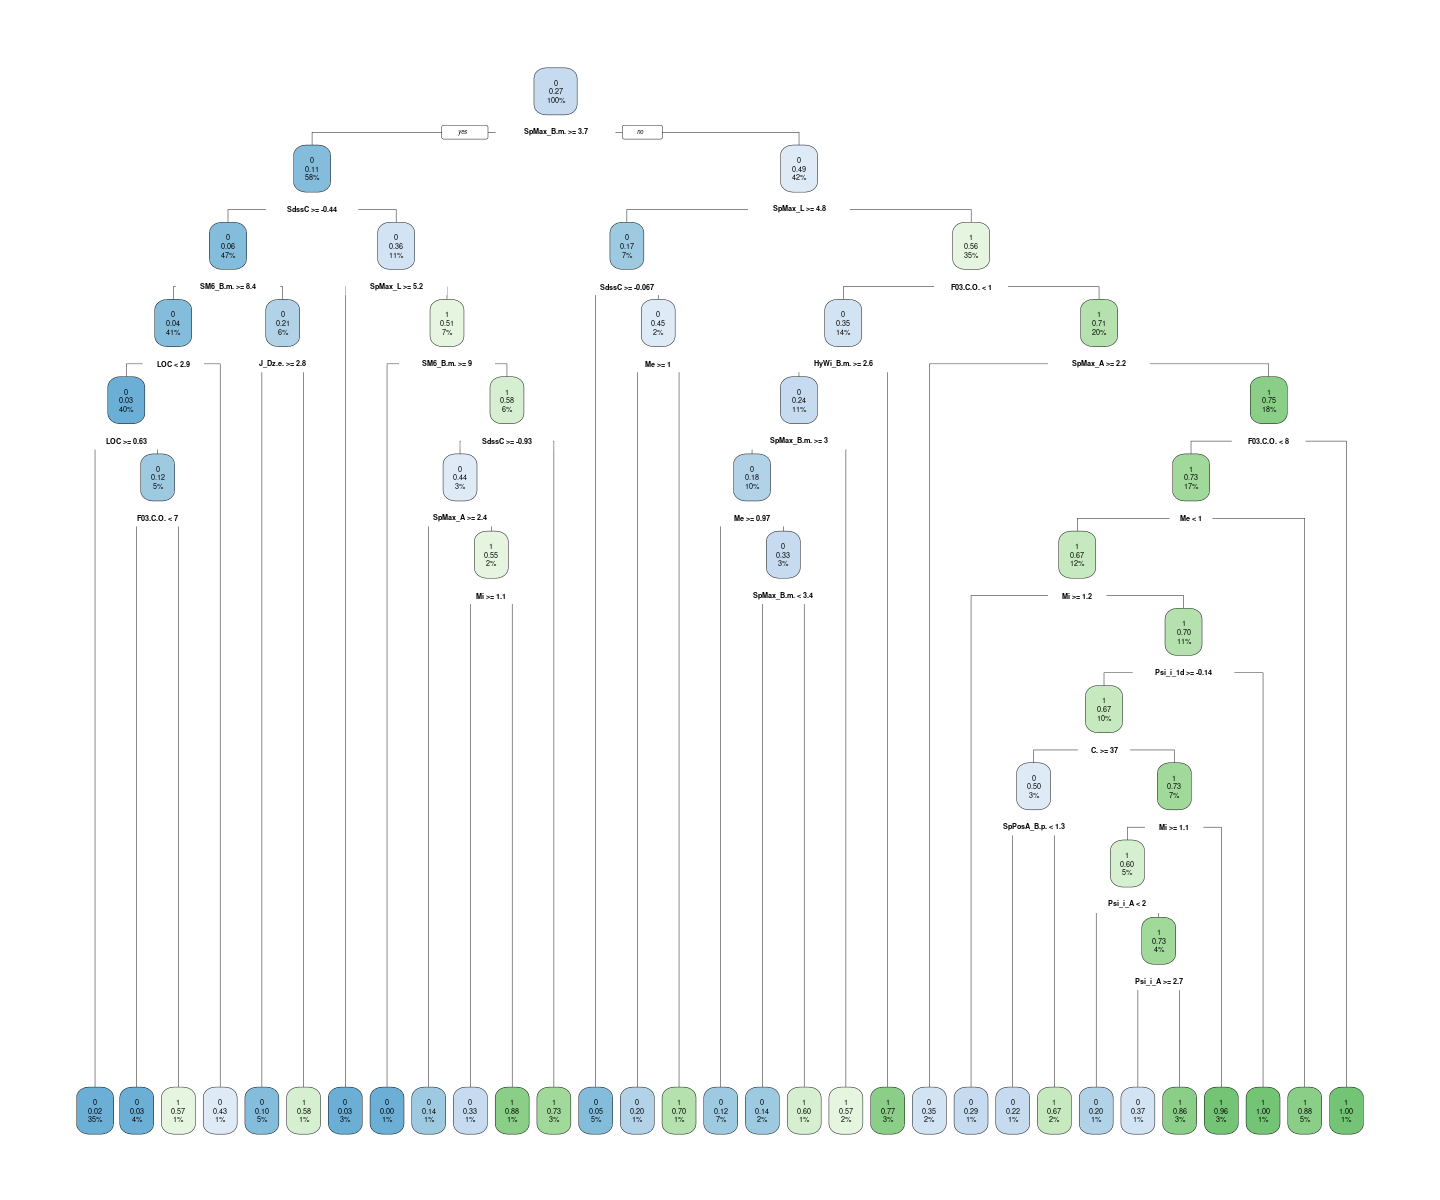

In [83]:
rpart.plot(tree.dis)

### Arbre optimisé

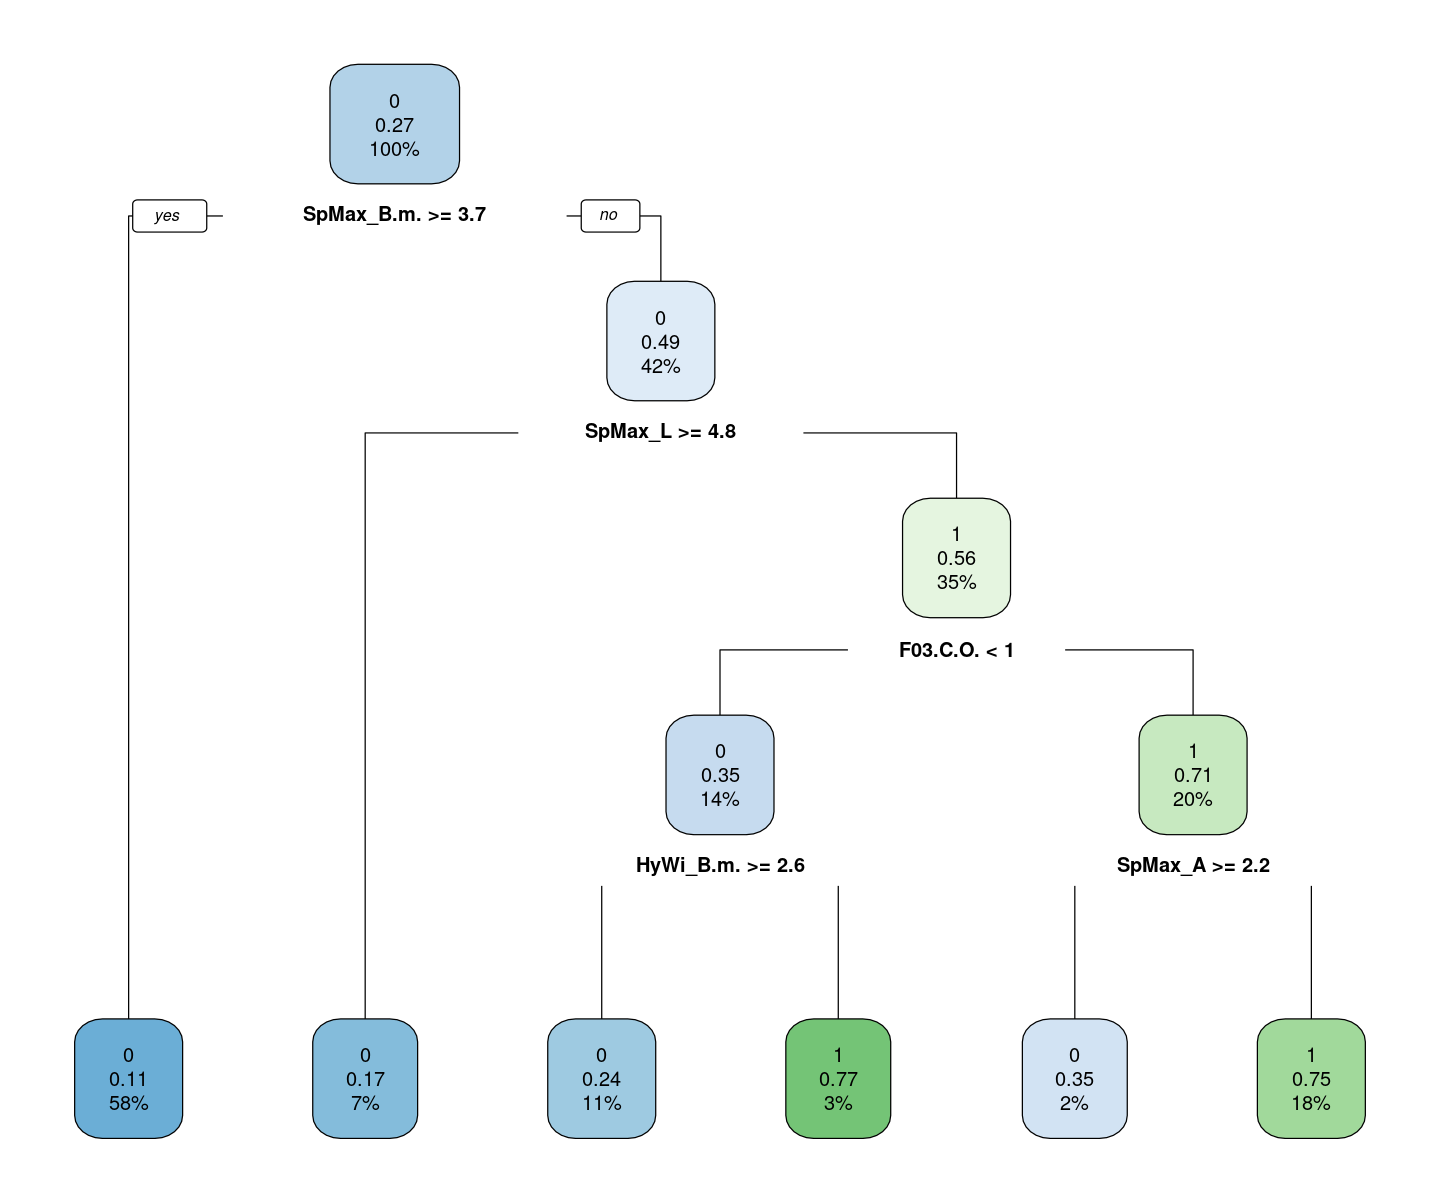

In [84]:
#génère les valeurs prédites par l'arbre de décision sur les données d'apprentissage
xmat = xpred.rpart(tree.dis)-1
# Comparaison des valeurs prédites et observées
xerr=datappr$Y!= (xmat) 
# Estimations des taux d'erreur pour chaque variable prédictive.
CVerr=apply(xerr, 2, sum)/nrow(xerr)
tree.dis.opt<-rpart(Y~.,data=datappr,parms=list(split="information"),cp=as.numeric(attributes(which.min(CVerr))$names))
rpart.plot(tree.dis.opt)

[1] "Valeur de cp retenue = 0.011441647597254"


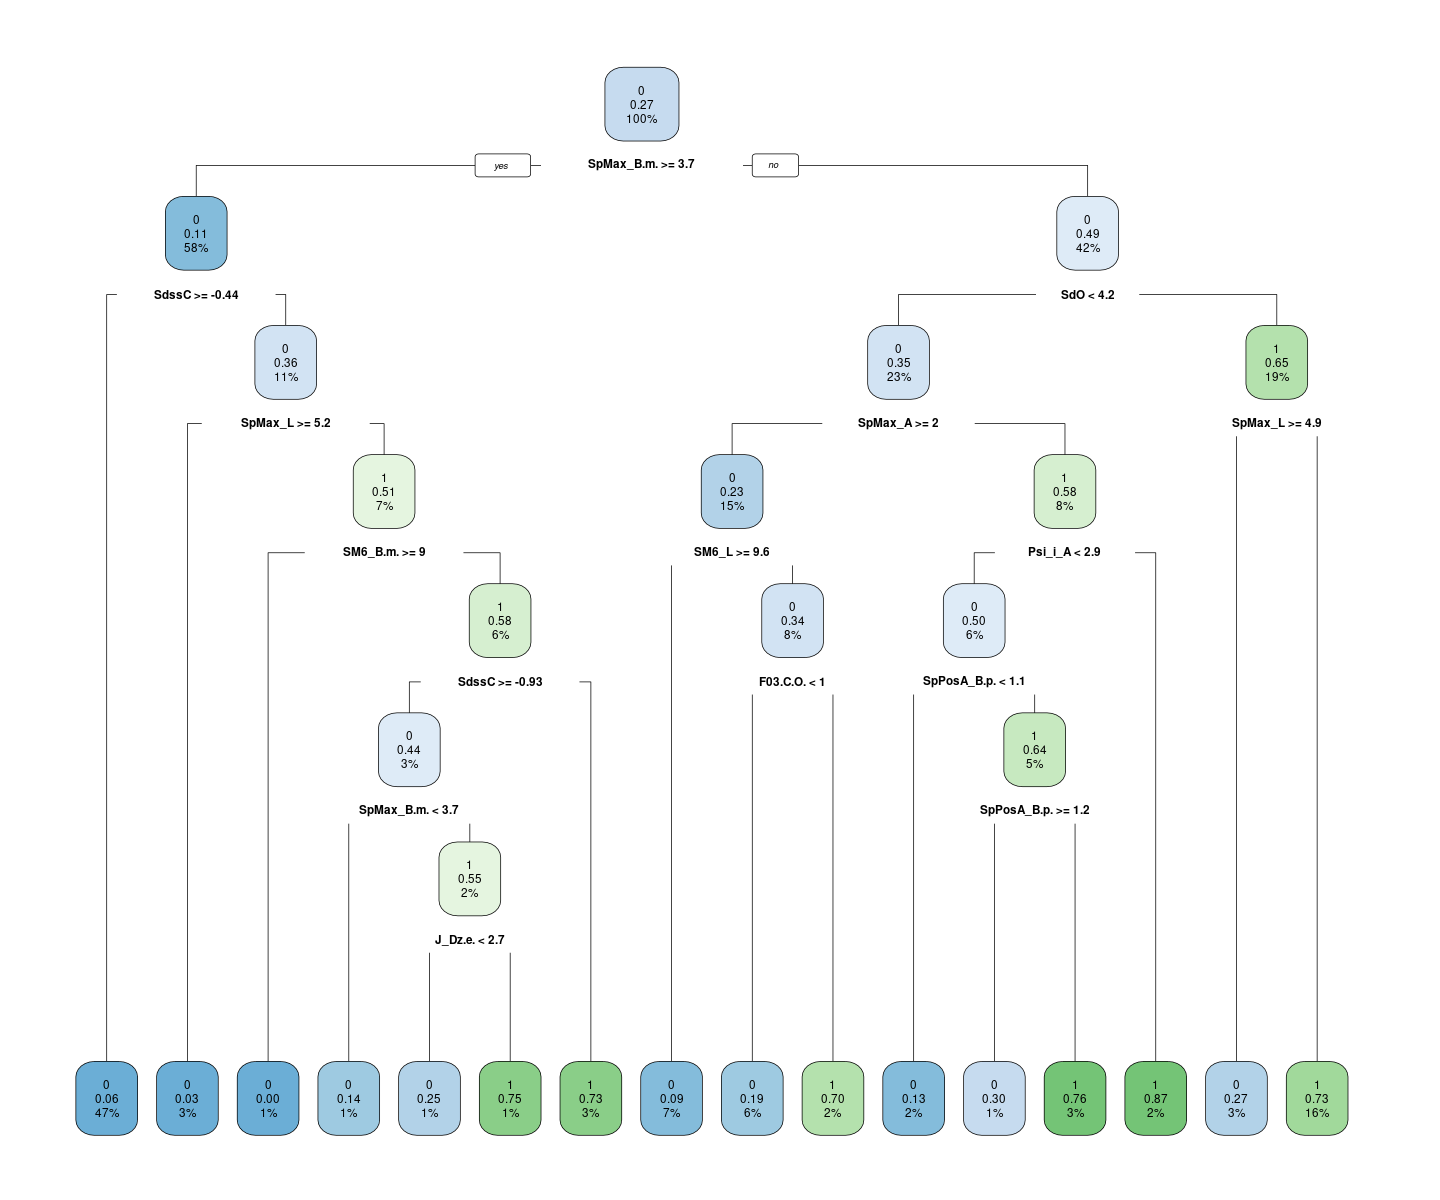

In [85]:
ctrl <- trainControl(method = "cv",number = 10)
treecaret <- train(Y~.,data=datappr,method = "rpart",trControl = ctrl,tuneLength =20,metric="Accuracy")
print(paste("Valeur de cp retenue = ",treecaret$bestTune,sep=""))
rpart.plot(treecaret$finalModel)

### Erreurs de généralisation

In [86]:
pred.tree=predict(tree.dis,newdata=datestr,type="class")
mat.tree=confusionMatrix(pred.tree,datestr[,"Y"])$table
colnames(mat.tree)=c("Non biodégradable","Biodégradable")
rownames(mat.tree)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.tree

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               132            21
   Prédiction biodégradable                    25            33

In [87]:
#Mesure de la performance de cette méthode : 
Erreur=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}
training_errorlogTreeOpt = Erreur(mat.tree)
paste("Erreur d'apprentissage pour CART : ", training_errorlogTreeOpt, "%")

[1] "Erreur d'apprentissage pour CART :  21.8 %"

In [88]:
pred.tree.opt=predict(tree.dis.opt,newdata=datestr,type="class")
mat.tree.opt=confusionMatrix(pred.tree.opt,datestr[,"Y"])$table
colnames(mat.tree.opt)=c("Non biodégradable","Biodégradable")
rownames(mat.tree.opt)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.tree.opt

                               Reference
Prediction                      Non biodégradable Biodégradable
   Prédiction non biodégradable               145            24
   Prédiction biodégradable                    12            30

In [89]:
#Mesure de la performance de cette méthode : 
Erreur=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}
training_errorTreeOpt = Erreur(tab_SISV)
paste("Erreur d'apprentissage pour CART optimisé : ", training_errorTreeOpt, "%")

[1] "Erreur d'apprentissage pour CART optimisé :  17.89 %"

Meilleurs résultats pour l'erreur de généralisation quand on élague le CART, cela implique que l'arbre de base était surajusté 

## Random forest

In [90]:
library(randomForest)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




In [91]:
rf.dis=randomForest(Y~.,data=datappr,xtest=datestr[,-21],ytest=datestr[,
   "Y"],ntree=500,do.trace=50,importance=TRUE)
rf.dis$importance

ntree      OOB      1      2|    Test      1      2
   50:  20.73% 12.70% 42.17%|  18.48% 11.46% 38.89%
  100:  20.62% 12.21% 43.04%|  19.43% 12.10% 40.74%
  150:  20.02% 12.05% 41.30%|  18.48% 11.46% 38.89%
  200:  20.38% 12.21% 42.17%|  17.54% 10.19% 38.89%
  250:  19.79% 11.89% 40.87%|  18.01% 10.83% 38.89%
  300:  19.67% 11.56% 41.30%|  17.54% 10.83% 37.04%
  350:  20.26% 11.89% 42.61%|  17.54% 10.83% 37.04%
  400:  19.79% 11.89% 40.87%|  17.54% 10.83% 37.04%
  450:  19.67% 11.73% 40.87%|  17.54% 10.83% 37.04%
  500:  19.43% 11.07% 41.74%|  17.54% 10.83% 37.04%


0             1             MeanDecreaseAccuracy MeanDecreaseGini
SpMax_L      2.308861e-02  3.804571e-02  0.0270836443        25.6382400      
J_Dz.e.      4.500680e-03  8.840172e-03  0.0056852284        15.4804182      
C.           7.725903e-03  9.567075e-03  0.0082764909        16.3270646      
SdssC        7.914919e-03  2.671210e-02  0.0130503118        20.6886779      
HyWi_B.m.    1.961452e-02  2.133413e-02  0.0200620939        17.7260994      
LOC          4.312424e-03  1.033931e-02  0.0059423014        13.5443083      
SM6_L        1.683835e-02  2.181455e-02  0.0181587634        15.3506550      
F03.C.O.     1.172131e-02  1.366898e-02  0.0122523538        12.1880789      
Me           7.216899e-03  2.549558e-03  0.0059138886        12.1173832      
Mi           1.374043e-02  5.208928e-03  0.0114754615        18.0295399      
SpPosA_B.p.  3.467779e-02  2.579929e-02  0.0321403886        26.8463110      
B01.C.Br.   -3.669788e-05 -4.691358e-05 -0.0000383616         0.1091814      
B03.C.Cl.    2.532049e-04  1.360604e-03  0.0005564066         0.8027366      
SpMax_A      3.085871e-02  1.891696e-02  0.0276021762        23.6517328      
Psi_i_1d     6.834596e-03 -2.356511e-03  0.0043471774        10.3432422      
SdO          1.072547e-02  2.359904e-02  0.0141567908        16.2289834      
TI2_L        5.519556e-03  1.027103e-02  0.0068521180        13.9043996      
SpMax_B.m.   2.893859e-02  4.444636e-02  0.0330164999        33.4838720      
Psi_i_A      1.274470e-02  1.051349e-02  0.0121375491        17.0260228      
SM6_B.m.     3.784482e-02  2.942585e-02  0.0355069320        24.2005992

In [92]:
#Nombre de variables pris
rf.dis$mtry

[1] 4

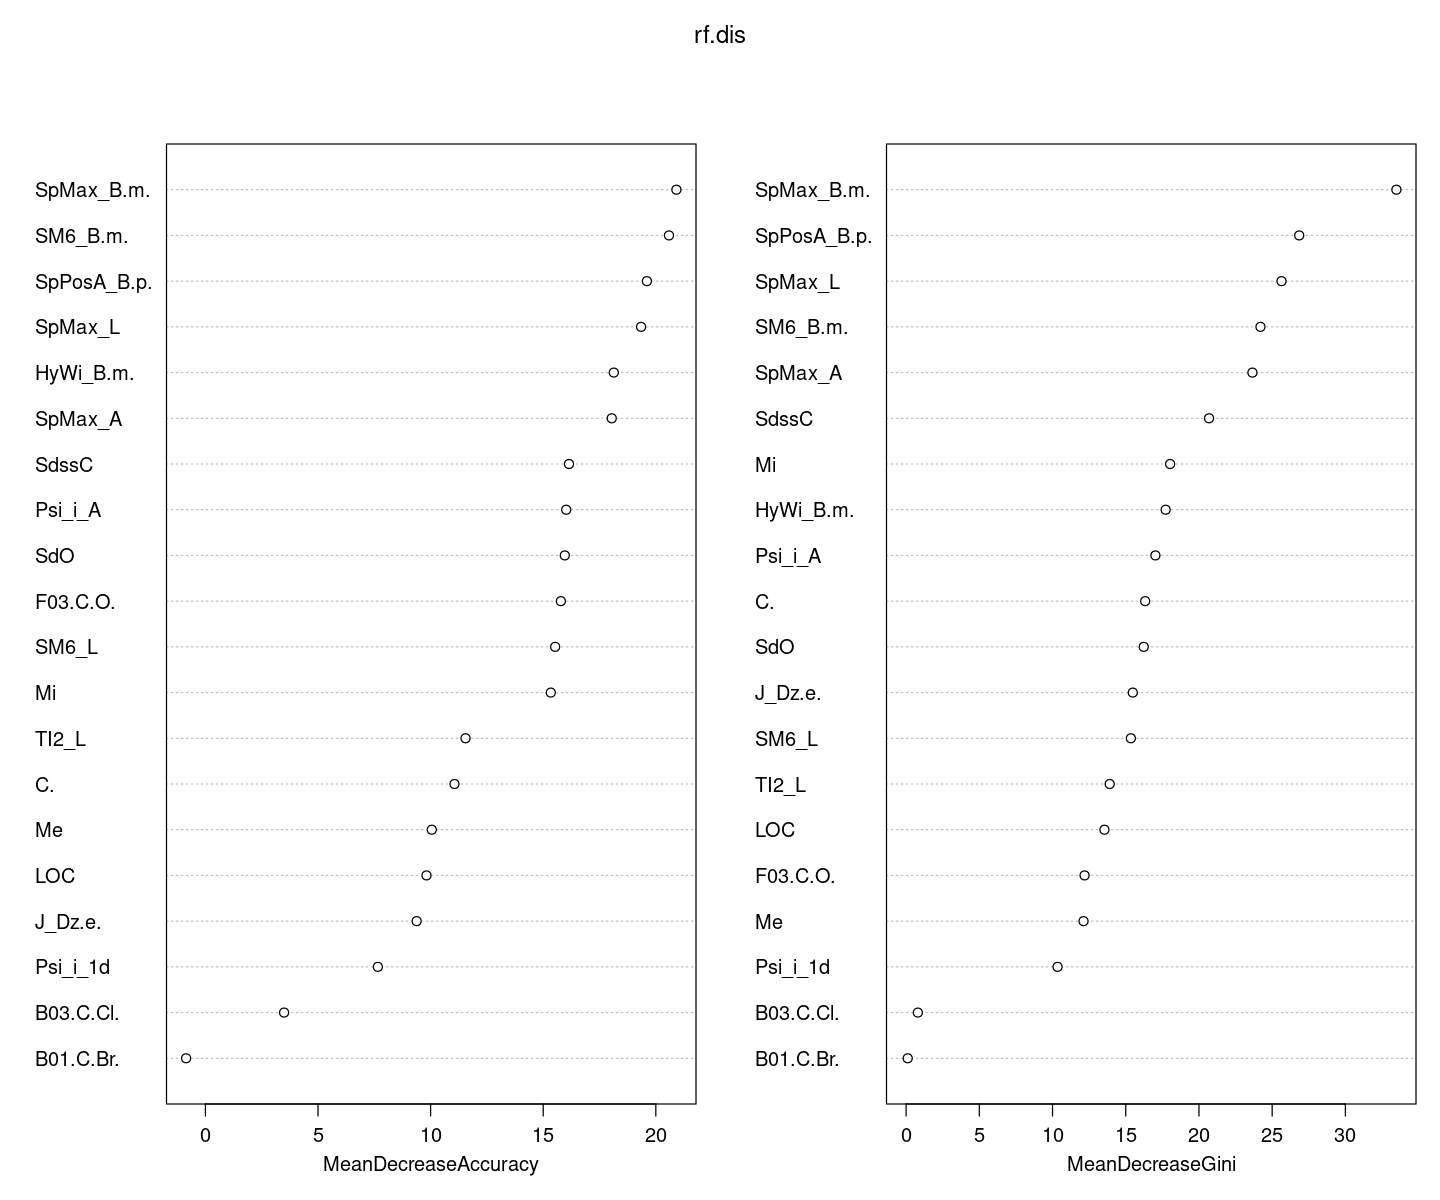

In [93]:
varImpPlot(rf.dis)

In [94]:
pred.randomForest=rf.dis$test$predicted
mat.randomForest=table(pred.randomForest,datestr[,"Y"])
colnames(mat.randomForest)=c("Non biodégradable","Biodégradable")
rownames(mat.randomForest)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.randomForest

                               
pred.randomForest               Non biodégradable Biodégradable
   Prédiction non biodégradable               140            20
   Prédiction biodégradable                    17            34

In [95]:
#Mesure de la performance de cette méthode : 
training_errorRandomForest = Erreur(mat.randomForest)
paste("Erreur d'apprentissage pour Random Forest : ", training_errorRandomForest, "%")

[1] "Erreur d'apprentissage pour Random Forest :  17.54 %"

## Boosting

In [96]:
library(gbm)


Loaded gbm 2.1.8.1



### Adaboost

In [172]:
#On va maintenant essayer le boosting avec comme méthode Adaboost
datapprnum=datappr
datapprnum[,"Y"]=as.numeric(datapprnum[,"Y"])-1
boost.ada=gbm(Y~.,data=datapprnum,distribution="adaboost",n.trees=500, cv.folds=10,
              n.minobsinnode = 5,shrinkage=0.025,verbose=FALSE)
#plot(boost.ada$cv.error,type="l")

Le paramètre shrinkage définit la contribution de chaque arbre individuel à l'ensemble du modèle.
L'objectif du shrinkage est de réduire la contribution de chaque arbre individuel, ce qui peut améliorer la stabilité du modèle et réduire le risque de surajustement. En rétrécissant les prédictions des arbres, le modèle d'ensemble prend en compte une fraction plus petite de la contribution de chaque arbre, ce qui permet normalement une généralisation plus robuste.


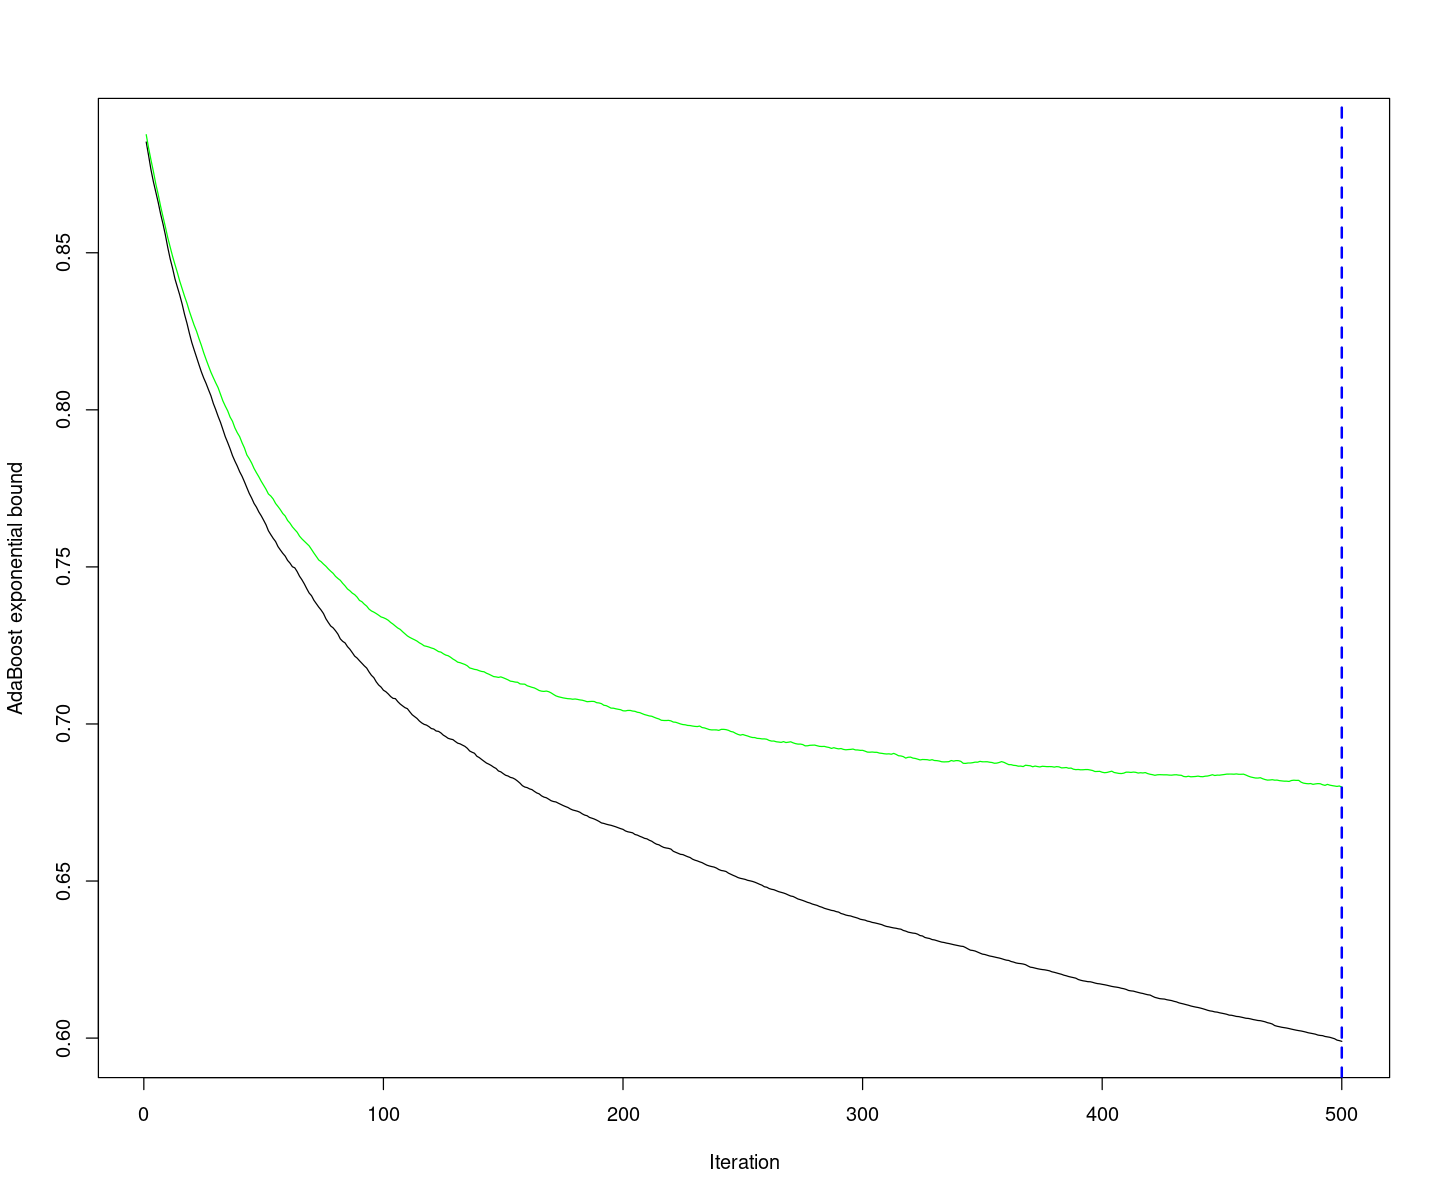

In [173]:
best.ited=gbm.perf(boost.ada,method="cv")

In [174]:
pred.boostAda=predict(boost.ada,newdata=datestr,n.trees=best.ited)
mat.boostAda=table(as.factor((sign(pred.boostAda)+1)/2),datestr[,"Y"])
colnames(mat.boostAda)=c("Non biodégradable","Biodégradable")
rownames(mat.boostAda)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.boostAda

                               
                                Non biodégradable Biodégradable
   Prédiction non biodégradable               143            26
   Prédiction biodégradable                    14            28

In [175]:
#Mesure de la performance de cette méthode : 
training_errorlogBoostAda = Erreur(mat.boostAda)
paste("Erreur d'apprentissage pour Adaboost : ", training_errorlogBoostAda, "%")

[1] "Erreur d'apprentissage pour Adaboost :  18.96 %"

### Gradient Boosting

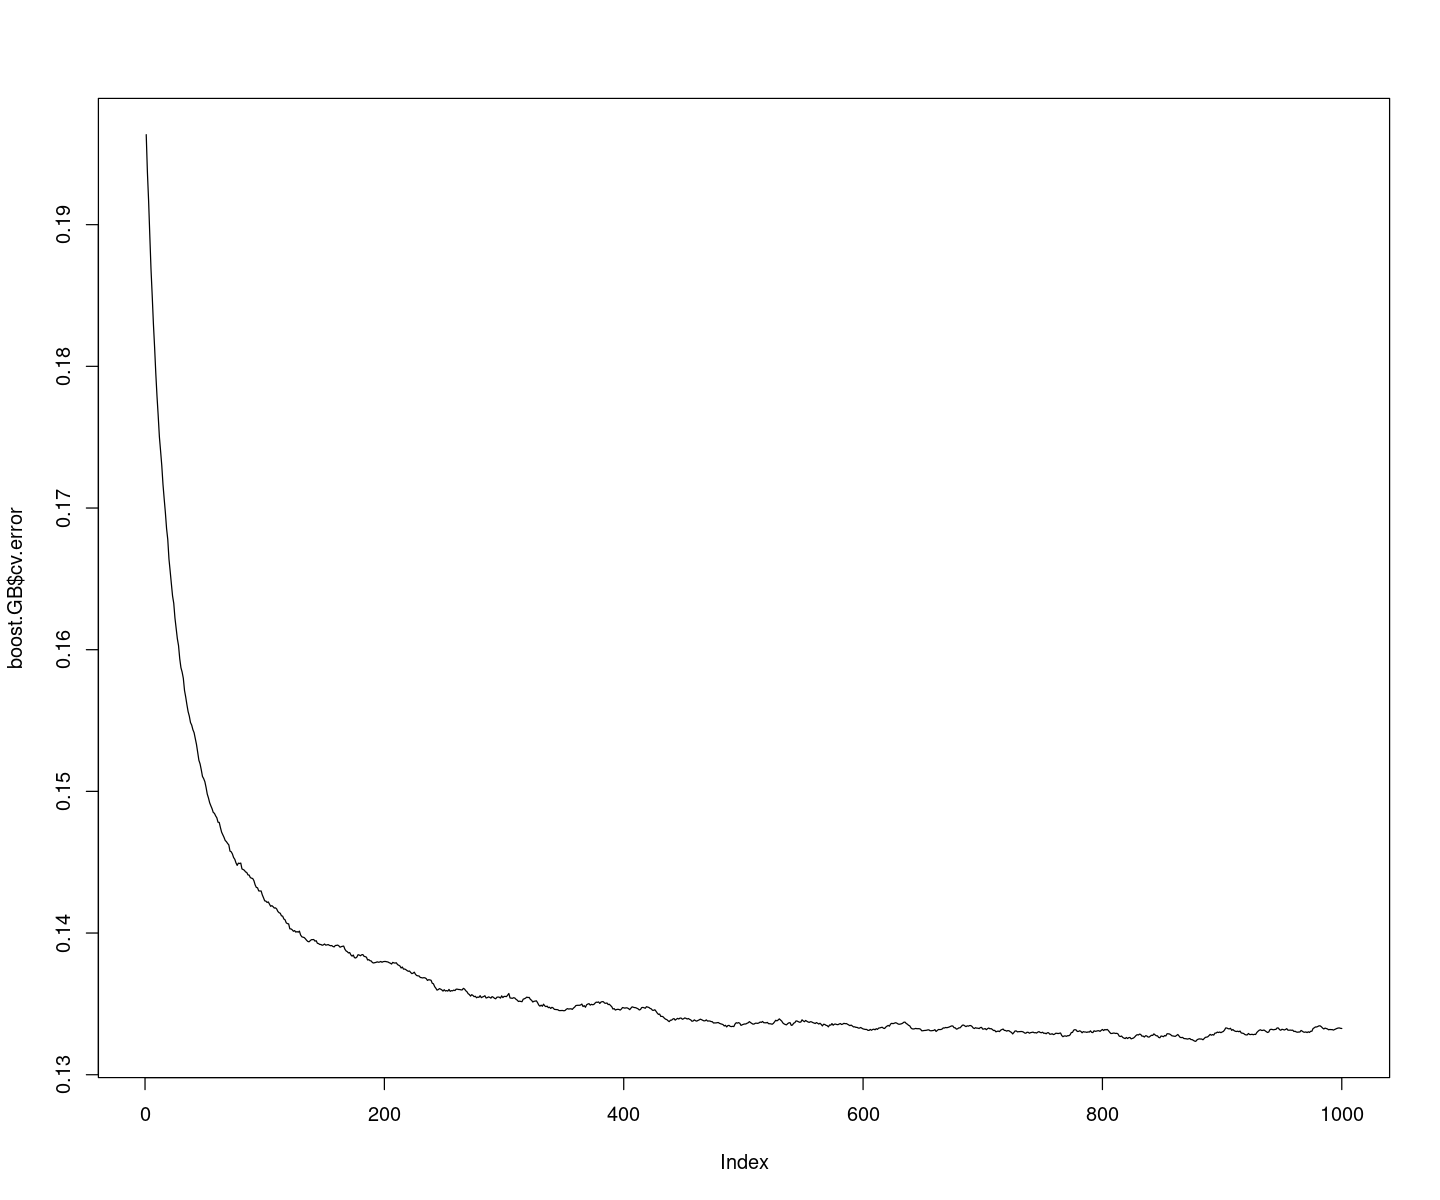

In [195]:
boost.GB=gbm(Y~.,data=datapprnum,distribution="gaussian",n.trees=1000, cv.folds=10,
              n.minobsinnode = 5,shrinkage=0.045,verbose=FALSE)
plot(boost.GB$cv.error,type="l")

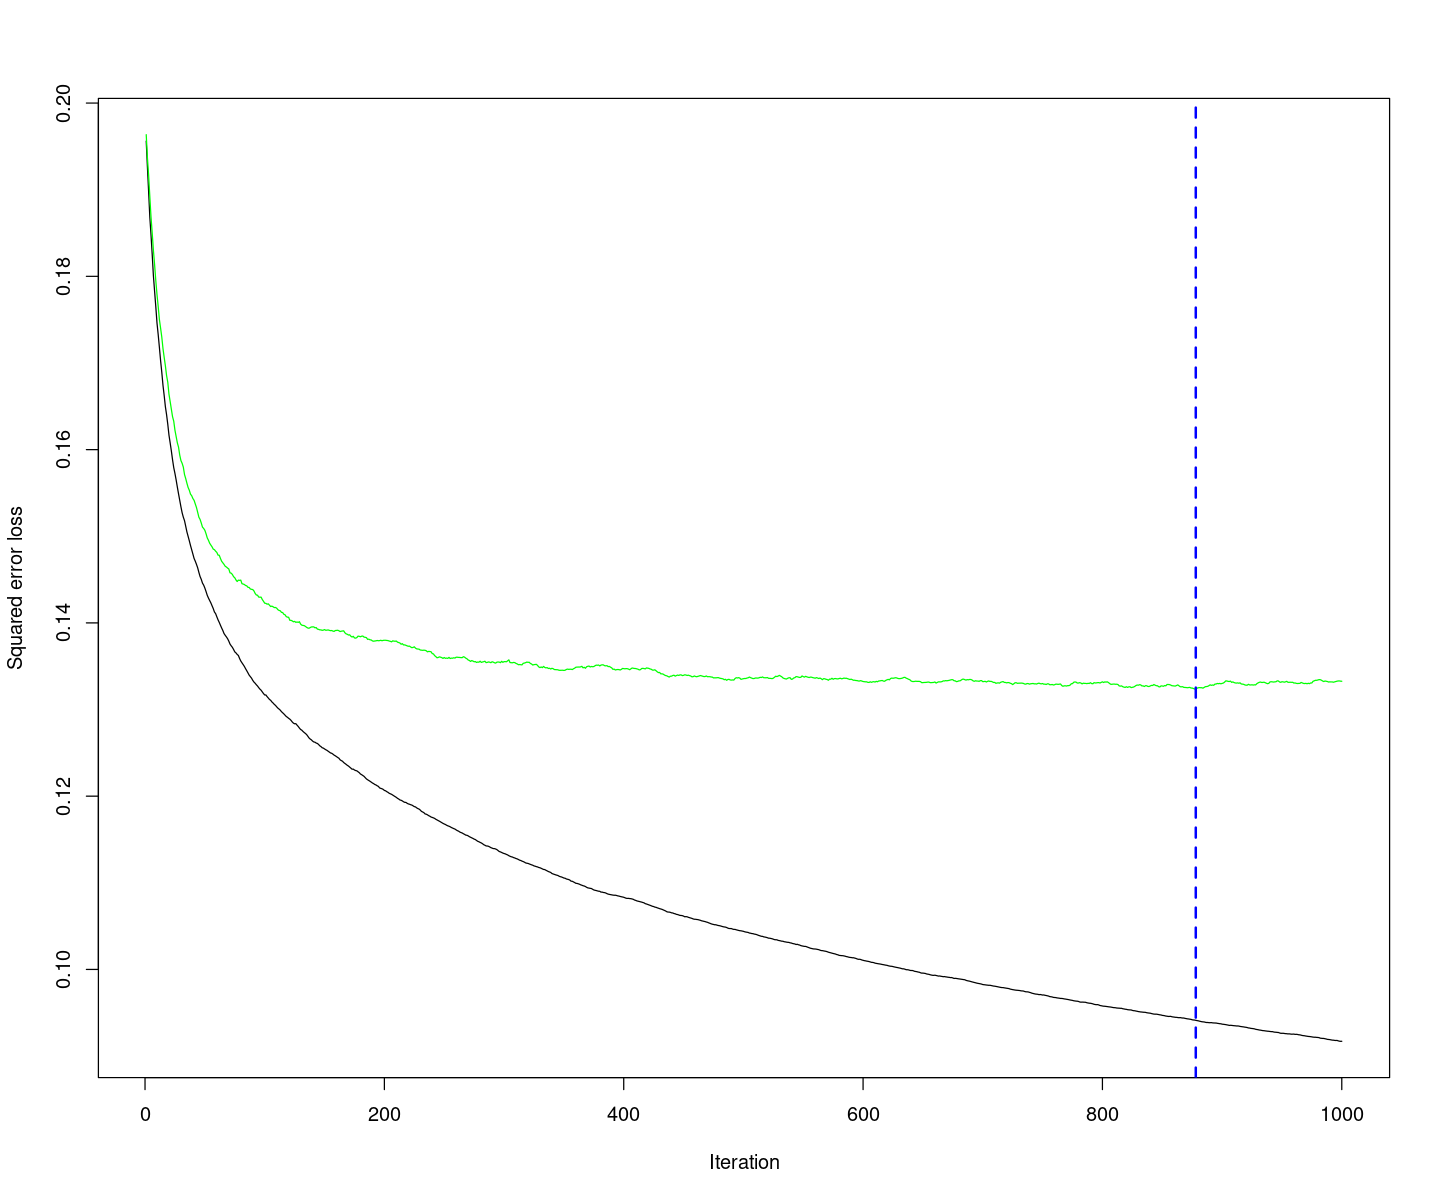

In [196]:
best.ited2=gbm.perf(boost.GB,method="cv")

In [200]:
aa=predict(boost.GB,newdata=datappr,n.trees=best.ited2)
mat.boostGB=table(as.factor((sign(aa)+1)/2),datappr[,"Y"])
colnames(mat.boostGB)=c("Non biodégradable","Biodégradable")
rownames(mat.boostGB)=c("Prédiction non biodégradable"," Prédiction biodégradable")
mat.boostGB

                              
                               Non biodégradable Biodégradable
  Prédiction non biodégradable               136             0
   Prédiction biodégradable                  478           230

In [204]:
pred.boostGB=predict(boost.GB,newdata=datestr,n.trees=best.ited2)
mat.boostGB=table(as.factor((sign(pred.boostGB)+1)/2),datestr[,"Y"])
colnames(mat.boostGB)=c("Non biodégradable","Biodégradable")
rownames(mat.boostGB)=c("Prédiction non biodégradable"," Prédiction biodégradable")
mat.boostGB

                              
                               Non biodégradable Biodégradable
  Prédiction non biodégradable                33             1
   Prédiction biodégradable                  124            53

In [205]:
#Mesure de la performance de cette méthode : 
training_errorlogBoostGB = Erreur(mat.boostGB)
paste("Erreur d'apprentissage pour Adaboost : ", training_errorlogBoostGB, "%")

[1] "Erreur d'apprentissage pour Adaboost :  59.24 %"

## Réseau de neuronnes

In [101]:
library(MASS)
library(nnet)


Attachement du package : ‘MASS’


L'objet suivant est masqué depuis ‘package:plotly’:

    select


L'objet suivant est masqué depuis ‘package:dplyr’:

    select




### NNET de base

In [112]:
NeuralNetwork=nnet(Y~.,data=datappr,size=5,decay=0) 
summary(NeuralNetwork)

# weights:  111
initial  value 588.826148 
iter  10 value 494.299719
iter  20 value 493.632106
iter  30 value 476.234408
iter  40 value 454.557883
iter  50 value 401.615447
iter  60 value 349.265597
iter  70 value 332.926346
iter  80 value 331.671498
iter  90 value 327.833942
iter 100 value 315.888804
final  value 315.888804 
stopped after 100 iterations


a 20-5-1 network with 111 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -9.30    8.85    1.47   -0.60    0.93   14.39   -4.93   -5.18   -0.15   -5.52 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 i15->h1 i16->h1 i17->h1 i18->h1 i19->h1 
  -7.41    8.87   -3.92   -0.31   -5.42    6.90    0.01   -2.63   -4.13   -3.88 
i20->h1 
   5.20 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
  -1.37   -0.89   -0.64    4.84    0.35   -1.15   -0.46   -3.72    1.09   -0.91 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 i15->h2 i16->h2 i17->h2 i18->h2 i19->h2 
  -1.74   -0.35    0.81   -0.72   -0.20   -0.15    5.66   -0.23   -0.66   -2.79 
i20->h2 
  -2.50 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3  i5->h3  i6->h3  i7->h3  i8->h3  i9->h3 
  -3.81   -1.29    2.46    0.15   -2.14    5.02   -1.29   -0.73   -0.79   -1.96 
i10->h3 i11->h3 i12->h3 i13->h3 i14->h3 i15->h3 i16->h3 i17->h3 i18->h3 i19->h3 
  -3.74

Le paramètre size définit la taille du réseau de neuronnes, soit le nombre de couches cachées que possède le réseau.  

Le paramètre decay contrôle la régularisation dans le modèle de réseau de neurones. Il spécifie le terme de pénalité utilisé pour réduire la complexité du modèle et prévenir le surapprentissage. Une valeur de decay plus élevée entraînera une régularisation plus forte.



### NNET optimisé

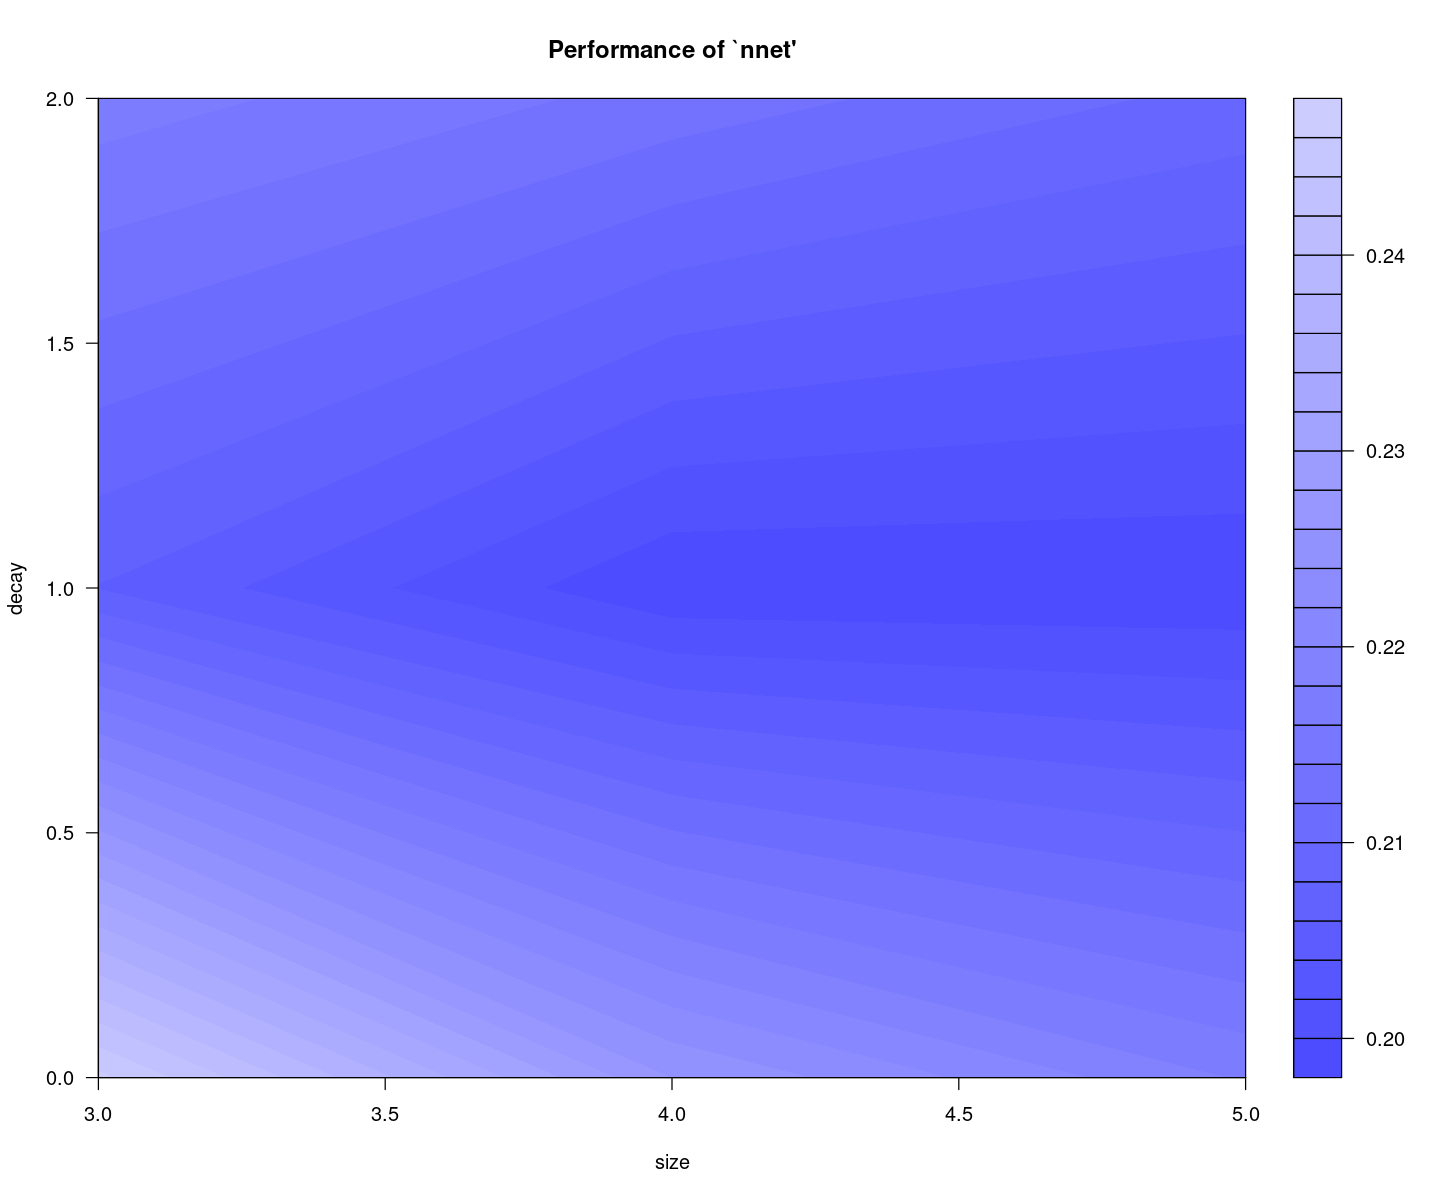

In [113]:
NeuralNetworkTune=tune.nnet(Y~.,data=datappr,size=c(3,4,5),decay=c(0,1,2),maxit=200,linout=FALSE)
plot(NeuralNetworkTune)

In [114]:
NeuralNetworkTune$best.parameters

size decay
5 4    1

L'argument linout spécifie si l'on impose une fonction d'activation de sortie linéaire, on choisit ici de l'imposer pour que notre modèle prédise des valeurs continue 

In [115]:
NeuralNetworkOpt=nnet(Y~.,data=datappr,size=NeuralNetworkTune$best.parameters$size,decay=NeuralNetworkTune$best.parameters$decay) 

# weights:  89
initial  value 857.950162 
iter  10 value 486.287347
iter  20 value 439.712309
iter  30 value 391.856666
iter  40 value 376.411732
iter  50 value 372.409617
iter  60 value 367.332216
iter  70 value 363.982963
iter  80 value 363.298344
iter  90 value 363.101838
iter 100 value 363.027879
final  value 363.027879 
stopped after 100 iterations


### Erreurs de généralisation

In [116]:
pred.NNET=predict(NeuralNetwork,newdata=datestr) 
pred.NNETopt=predict(NeuralNetworkOpt,newdata=datestr) 
mat.NNET = table(pred.NNET>0.5,datestr[,"Y"])
mat.NNETopt = table(pred.NNETopt>0.5,datestr[,"Y"])
colnames(mat.NNET)=c("Non biodégradable","Biodégradable")
rownames(mat.NNET)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
colnames(mat.NNETopt)=c("Non biodégradable","Biodégradable")
rownames(mat.NNETopt)=c(" Prédiction non biodégradable"," Prédiction biodégradable")
mat.NNET
mat.NNETopt

                               
                                Non biodégradable Biodégradable
   Prédiction non biodégradable               131            14
   Prédiction biodégradable                    26            40

                               
                                Non biodégradable Biodégradable
   Prédiction non biodégradable               143            27
   Prédiction biodégradable                    14            27

In [117]:
training_errorlogNNET = Erreur(mat.NNET)
paste("Erreur de test pour le Réseau de neuronnes : ", training_errorlogNNET, "%")
training_errorlogNNETopt = Erreur(mat.NNETopt)
paste("Erreur de test pour le Réseau de neuronnes optimisé : ", training_errorlogNNETopt, "%")

[1] "Erreur de test pour le Réseau de neuronnes :  18.96 %"

[1] "Erreur de test pour le Réseau de neuronnes optimisé :  19.43 %"

### Courbes ROC

Setting levels: control = 0, case = 1

Warning message in roc.default(as.numeric(datestr$Y) - 1, pred.NNET):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(as.numeric(datestr$Y) - 1, pred.NNETopt):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



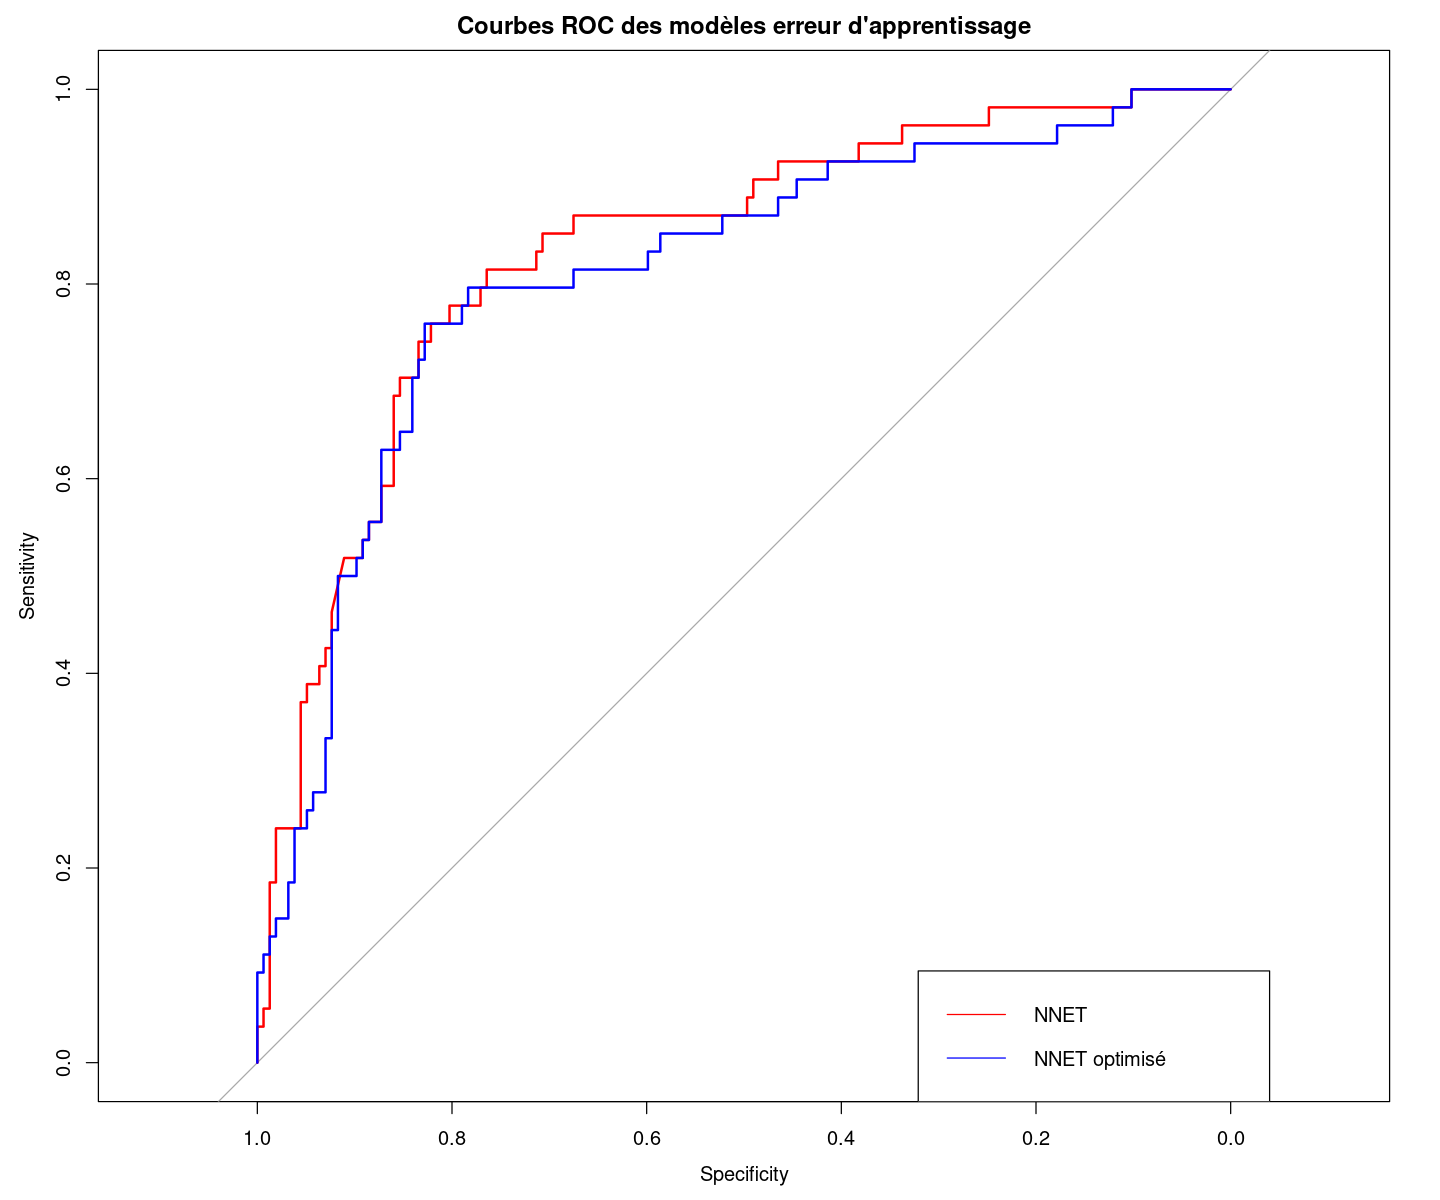

In [119]:
roc_NNET <- roc(as.numeric(datestr$Y)-1, pred.NNET)
roc_NNETopt <- roc(as.numeric(datestr$Y)-1, pred.NNETopt)

plot(roc_NNET, col = "red", main = "Courbes ROC des modèles erreur d'apprentissage")
plot(roc_NNETopt, col = "blue", add = TRUE)
legend("bottomright", legend = c("NNET", "NNET optimisé"),
       col = c("red", "blue"), lwd = 1)